In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
pd.options.display.float_format ='{:,.3f}'.format

In [5]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,"101,348.880",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.860",1,0,1,"112,542.580",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.800",3,1,0,"113,931.570",1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,"93,826.630",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.820",1,1,1,"79,084.100",0
5,6,15574012,Chu,645,Spain,Male,44,8,"113,755.780",2,1,0,"149,756.710",1
6,7,15592531,Bartlett,822,France,Male,50,7,0.000,2,1,1,"10,062.800",0
7,8,15656148,Obinna,376,Germany,Female,29,4,"115,046.740",4,1,0,"119,346.880",1
8,9,15792365,He,501,France,Male,44,4,"142,051.070",2,0,1,"74,940.500",0
9,10,15592389,H?,684,France,Male,27,2,"134,603.880",1,1,1,"71,725.730",0


In [4]:
df.shape

(10000, 14)

In [6]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

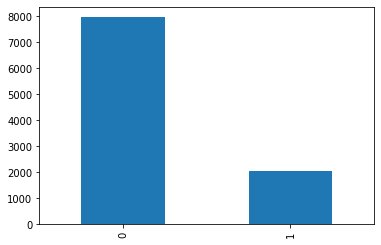

In [7]:
df.Exited.value_counts().plot(kind='bar')
plt.show()

In [8]:
df.drop(['RowNumber','CustomerId','Surname',],axis=1, inplace=True)

In [9]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

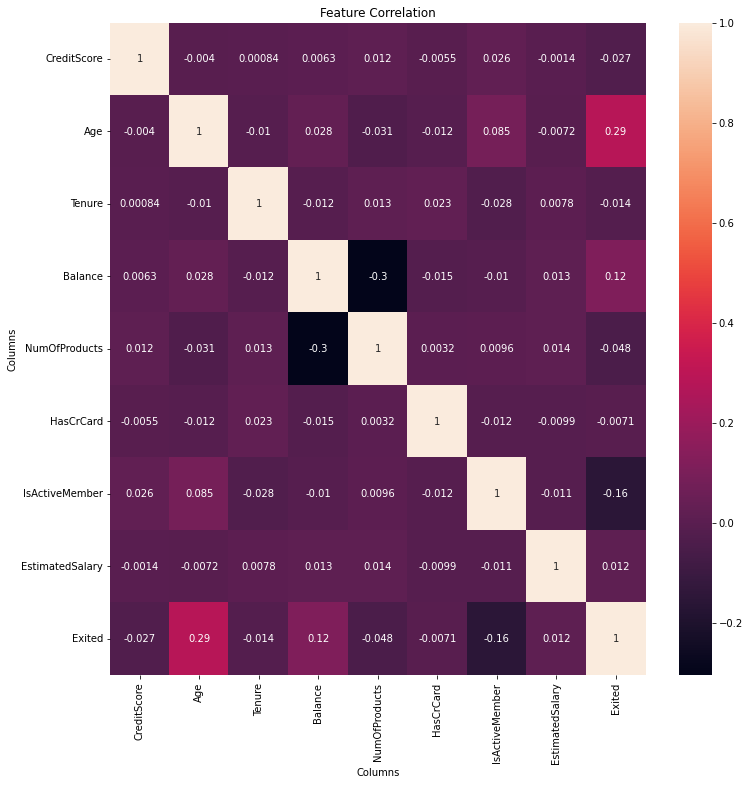

In [10]:
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(df.corr(), annot=True, ax=ax).set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

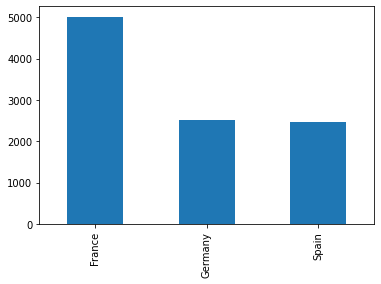

In [11]:
df.Geography.value_counts().plot(kind='bar')
plt.show()

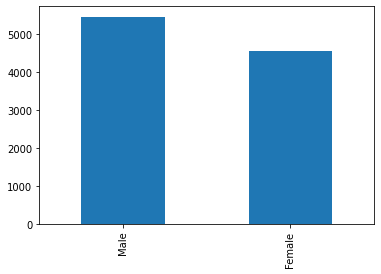

In [12]:
df.Gender.value_counts().plot(kind='bar')
plt.show()

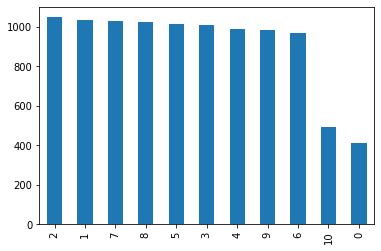

In [13]:
df.Tenure.value_counts().plot(kind='bar')
plt.show()

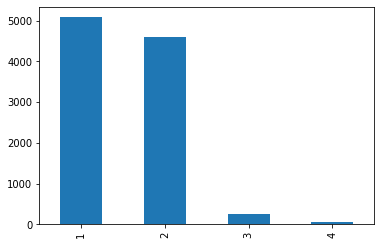

In [14]:
df.NumOfProducts.value_counts().plot(kind='bar')
plt.show()

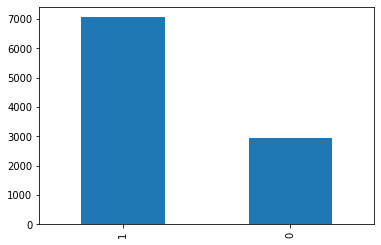

In [15]:
df.HasCrCard.value_counts().plot(kind='bar')
plt.show()

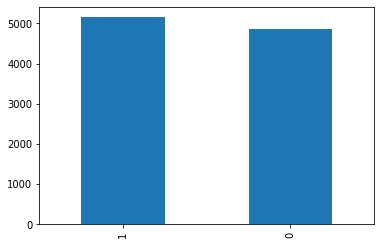

In [16]:
df.IsActiveMember.value_counts().plot(kind='bar')
plt.show()

In [17]:
df = pd.get_dummies(df, columns=['Geography','Gender'])

In [18]:
df.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,"101,348.880",1,1,0,0,1,0
1,608,41,1,"83,807.860",1,0,1,"112,542.580",0,0,0,1,1,0
2,502,42,8,"159,660.800",3,1,0,"113,931.570",1,1,0,0,1,0
3,699,39,1,0.000,2,0,0,"93,826.630",0,1,0,0,1,0
4,850,43,2,"125,510.820",1,1,1,"79,084.100",0,0,0,1,1,0
5,645,44,8,"113,755.780",2,1,0,"149,756.710",1,0,0,1,0,1
6,822,50,7,0.000,2,1,1,"10,062.800",0,1,0,0,0,1
7,376,29,4,"115,046.740",4,1,0,"119,346.880",1,0,1,0,1,0
8,501,44,4,"142,051.070",2,0,1,"74,940.500",0,1,0,0,0,1
9,684,27,2,"134,603.880",1,1,1,"71,725.730",0,1,0,0,0,1


In [19]:
y=df['Exited']
df.drop('Exited',axis=1,inplace=True)

In [20]:
x=df

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
!pip install catboost
from catboost import CatBoostClassifier

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 10.6 MB/s eta 0:00:00


In [23]:
modelCatBoost = CatBoostClassifier(iterations=1000,
                           depth=10,
                           learning_rate=0.1,
                           l2_leaf_reg=3,
                           loss_function='Logloss')

In [24]:
modelCatBoost.fit(x_train,y_train)

0:	learn: 0.6126187	total: 76.5ms	remaining: 1m 16s
1:	learn: 0.5450282	total: 112ms	remaining: 55.8s
2:	learn: 0.4967979	total: 147ms	remaining: 49s
3:	learn: 0.4570645	total: 175ms	remaining: 43.5s
4:	learn: 0.4257730	total: 204ms	remaining: 40.6s
5:	learn: 0.4049288	total: 221ms	remaining: 36.6s
6:	learn: 0.3866601	total: 239ms	remaining: 33.9s
7:	learn: 0.3723422	total: 257ms	remaining: 31.8s
8:	learn: 0.3603641	total: 285ms	remaining: 31.4s
9:	learn: 0.3495898	total: 312ms	remaining: 30.9s
10:	learn: 0.3431641	total: 339ms	remaining: 30.4s
11:	learn: 0.3341787	total: 356ms	remaining: 29.3s
12:	learn: 0.3276057	total: 376ms	remaining: 28.6s
13:	learn: 0.3217205	total: 393ms	remaining: 27.7s
14:	learn: 0.3173037	total: 411ms	remaining: 27s
15:	learn: 0.3136700	total: 428ms	remaining: 26.3s
16:	learn: 0.3126093	total: 431ms	remaining: 24.9s
17:	learn: 0.3088721	total: 444ms	remaining: 24.2s
18:	learn: 0.3068028	total: 463ms	remaining: 23.9s
19:	learn: 0.3023654	total: 488ms	remaining

In [25]:
y_pred = modelCatBoost.predict(x_test)

In [26]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(score*100))

Accuracy: 84.95%


In [27]:
from sklearn.metrics import precision_score,recall_score

precision=precision_score(y_test,y_pred)
print("precision_score: {:.2f}".format(precision))

recall=recall_score(y_test,y_pred)
print("recall_score: {:.2f}".format(recall))

precision_score: 0.70
recall_score: 0.47


In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print("F1-score: {:.2f}".format(f1))

F1-score: 0.56


In [29]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 11.5 MB/s eta 0:00:00


In [30]:
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.2)

In [31]:
import optuna
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'depth': trial.suggest_int('depth', 2, 10),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)
    }

    model = CatBoostClassifier(iterations=100, **params,loss_function='Logloss')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_valid)
    return f1_score(y_valid, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

best_params = study.best_params
best_value = study.best_value

model = CatBoostClassifier(iterations=100, **best_params,loss_function='Logloss')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

[I 2023-02-03 14:21:36,920] A new study created in memory with name: no-name-46460a61-5ffa-4e5a-bb4a-6454c4c36833
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` i

0:	learn: 0.6931568	total: 29.2ms	remaining: 2.89s
1:	learn: 0.6931513	total: 118ms	remaining: 5.77s
2:	learn: 0.6931517	total: 183ms	remaining: 5.93s
3:	learn: 0.6931515	total: 224ms	remaining: 5.38s
4:	learn: 0.6931361	total: 226ms	remaining: 4.29s
5:	learn: 0.6931358	total: 263ms	remaining: 4.11s
6:	learn: 0.6931332	total: 265ms	remaining: 3.52s
7:	learn: 0.6931324	total: 274ms	remaining: 3.15s
8:	learn: 0.6931323	total: 281ms	remaining: 2.85s
9:	learn: 0.6931319	total: 287ms	remaining: 2.58s
10:	learn: 0.6931309	total: 293ms	remaining: 2.37s
11:	learn: 0.6931298	total: 300ms	remaining: 2.2s
12:	learn: 0.6931283	total: 306ms	remaining: 2.05s
13:	learn: 0.6931283	total: 309ms	remaining: 1.9s
14:	learn: 0.6931282	total: 314ms	remaining: 1.78s
15:	learn: 0.6931277	total: 348ms	remaining: 1.83s
16:	learn: 0.6931275	total: 359ms	remaining: 1.75s
17:	learn: 0.6931275	total: 371ms	remaining: 1.69s
18:	learn: 0.6931270	total: 379ms	remaining: 1.61s
19:	learn: 0.6931266	total: 381ms	remainin

[I 2023-02-03 14:21:39,096] Trial 0 finished with value: 0.2710997442455243 and parameters: {'depth': 10, 'learning_rate': 0.4057573810030999, 'l2_leaf_reg': 60109591.40811584, 'subsample': 0.7466685984531007, 'scale_pos_weight': 0.7147658347549917}. Best is trial 0 with value: 0.2710997442455243.


93:	learn: 0.6931222	total: 1.58s	remaining: 101ms
94:	learn: 0.6931222	total: 1.6s	remaining: 84.5ms
95:	learn: 0.6931219	total: 1.61s	remaining: 67.3ms
96:	learn: 0.6931219	total: 1.64s	remaining: 50.8ms
97:	learn: 0.6931217	total: 1.65s	remaining: 33.7ms
98:	learn: 0.6931215	total: 1.68s	remaining: 17ms
99:	learn: 0.6931215	total: 1.7s	remaining: 0us
0:	learn: 0.5452170	total: 900us	remaining: 89.1ms
1:	learn: 0.4516344	total: 3.32ms	remaining: 163ms
2:	learn: 0.4028974	total: 7.9ms	remaining: 256ms
3:	learn: 0.3742140	total: 19.3ms	remaining: 463ms


<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

4:	learn: 0.3488504	total: 21.1ms	remaining: 401ms
5:	learn: 0.3334309	total: 23.4ms	remaining: 367ms
6:	learn: 0.3208687	total: 24.4ms	remaining: 325ms
7:	learn: 0.3129782	total: 25.4ms	remaining: 292ms
8:	learn: 0.3072363	total: 26.4ms	remaining: 267ms
9:	learn: 0.3029047	total: 27.5ms	remaining: 248ms
10:	learn: 0.2999811	total: 31.8ms	remaining: 257ms
11:	learn: 0.2983601	total: 36.2ms	remaining: 265ms
12:	learn: 0.2956183	total: 37.3ms	remaining: 250ms
13:	learn: 0.2930542	total: 38.3ms	remaining: 235ms
14:	learn: 0.2912738	total: 41.6ms	remaining: 236ms
15:	learn: 0.2868950	total: 48.4ms	remaining: 254ms
16:	learn: 0.2857164	total: 54.7ms	remaining: 267ms
17:	learn: 0.2845152	total: 55.7ms	remaining: 254ms
18:	learn: 0.2832158	total: 56.8ms	remaining: 242ms
19:	learn: 0.2815173	total: 57.9ms	remaining: 232ms
20:	learn: 0.2807350	total: 58.9ms	remaining: 222ms
21:	learn: 0.2795454	total: 59.9ms	remaining: 212ms
22:	learn: 0.2785333	total: 61ms	remaining: 204ms
23:	learn: 0.2776983

[I 2023-02-03 14:21:39,374] Trial 1 finished with value: 0.5376782077393075 and parameters: {'depth': 2, 'learning_rate': 0.33194445692373786, 'l2_leaf_reg': 0.0001899115733031107, 'subsample': 0.7960440250928094, 'scale_pos_weight': 0.6338336497335828}. Best is trial 1 with value: 0.5376782077393075.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: sug

0:	learn: 0.4375139	total: 2.04ms	remaining: 202ms
1:	learn: 0.3741928	total: 12.3ms	remaining: 601ms
2:	learn: 0.3363826	total: 14.5ms	remaining: 470ms
3:	learn: 0.3261435	total: 20.1ms	remaining: 482ms
4:	learn: 0.3159971	total: 21.6ms	remaining: 410ms
5:	learn: 0.3118639	total: 22.8ms	remaining: 356ms
6:	learn: 0.3059468	total: 23.9ms	remaining: 317ms
7:	learn: 0.3023722	total: 25.4ms	remaining: 293ms
8:	learn: 0.2984945	total: 26.8ms	remaining: 271ms
9:	learn: 0.2955968	total: 28.8ms	remaining: 259ms
10:	learn: 0.2914734	total: 30.6ms	remaining: 248ms
11:	learn: 0.2882146	total: 32.5ms	remaining: 238ms
12:	learn: 0.2860008	total: 33.7ms	remaining: 225ms
13:	learn: 0.2834941	total: 35.2ms	remaining: 216ms
14:	learn: 0.2808207	total: 37ms	remaining: 210ms
15:	learn: 0.2790050	total: 38.5ms	remaining: 202ms
16:	learn: 0.2770290	total: 40.2ms	remaining: 196ms
17:	learn: 0.2742030	total: 41.6ms	remaining: 190ms
18:	learn: 0.2725463	total: 42.9ms	remaining: 183ms
19:	learn: 0.2706804	tot

[I 2023-02-03 14:21:39,877] Trial 2 finished with value: 0.5448275862068965 and parameters: {'depth': 5, 'learning_rate': 0.6381754946608074, 'l2_leaf_reg': 2.390412644355636e-08, 'subsample': 0.591951094539493, 'scale_pos_weight': 0.8460767106894496}. Best is trial 2 with value: 0.5448275862068965.


0:	learn: 0.4423434	total: 26.4ms	remaining: 2.61s
1:	learn: 0.3581815	total: 46.4ms	remaining: 2.28s
2:	learn: 0.3164031	total: 64.4ms	remaining: 2.08s
3:	learn: 0.3059028	total: 70.9ms	remaining: 1.7s
4:	learn: 0.2876425	total: 104ms	remaining: 1.97s
5:	learn: 0.2740873	total: 128ms	remaining: 2s


<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

6:	learn: 0.2646008	total: 153ms	remaining: 2.03s
7:	learn: 0.2581937	total: 177ms	remaining: 2.04s
8:	learn: 0.2428089	total: 200ms	remaining: 2.03s
9:	learn: 0.2379065	total: 215ms	remaining: 1.93s
10:	learn: 0.2321088	total: 233ms	remaining: 1.89s
11:	learn: 0.2270650	total: 265ms	remaining: 1.95s
12:	learn: 0.2118528	total: 298ms	remaining: 2s
13:	learn: 0.2026810	total: 343ms	remaining: 2.1s
14:	learn: 0.1944700	total: 369ms	remaining: 2.09s
15:	learn: 0.1895364	total: 397ms	remaining: 2.08s
16:	learn: 0.1838810	total: 421ms	remaining: 2.05s
17:	learn: 0.1771165	total: 458ms	remaining: 2.09s
18:	learn: 0.1713016	total: 494ms	remaining: 2.1s
19:	learn: 0.1634848	total: 521ms	remaining: 2.08s
20:	learn: 0.1610777	total: 550ms	remaining: 2.07s
21:	learn: 0.1535808	total: 578ms	remaining: 2.05s
22:	learn: 0.1498728	total: 614ms	remaining: 2.05s
23:	learn: 0.1448517	total: 634ms	remaining: 2.01s
24:	learn: 0.1411629	total: 664ms	remaining: 1.99s
25:	learn: 0.1365070	total: 676ms	remain

[I 2023-02-03 14:21:41,953] Trial 3 finished with value: 0.5392491467576792 and parameters: {'depth': 10, 'learning_rate': 0.6230872079625756, 'l2_leaf_reg': 0.2586528397920804, 'subsample': 0.9461703104350337, 'scale_pos_weight': 0.9138463724749875}. Best is trial 2 with value: 0.5448275862068965.


86:	learn: 0.0284971	total: 1.83s	remaining: 273ms
87:	learn: 0.0279130	total: 1.84s	remaining: 251ms
88:	learn: 0.0273742	total: 1.85s	remaining: 229ms
89:	learn: 0.0269306	total: 1.86s	remaining: 207ms
90:	learn: 0.0261810	total: 1.87s	remaining: 185ms
91:	learn: 0.0256255	total: 1.88s	remaining: 164ms
92:	learn: 0.0249979	total: 1.89s	remaining: 143ms
93:	learn: 0.0244744	total: 1.9s	remaining: 122ms
94:	learn: 0.0241694	total: 1.92s	remaining: 101ms
95:	learn: 0.0239712	total: 1.93s	remaining: 80.4ms
96:	learn: 0.0234430	total: 1.94s	remaining: 60ms
97:	learn: 0.0230078	total: 1.95s	remaining: 39.8ms
98:	learn: 0.0227842	total: 1.96s	remaining: 19.8ms
99:	learn: 0.0225717	total: 1.97s	remaining: 0us


<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6709115	total: 13.4ms	remaining: 1.33s
1:	learn: 0.6500581	total: 24ms	remaining: 1.18s
2:	learn: 0.6312929	total: 34.5ms	remaining: 1.12s
3:	learn: 0.6138987	total: 44.6ms	remaining: 1.07s
4:	learn: 0.5981758	total: 46.7ms	remaining: 887ms
5:	learn: 0.5814896	total: 57.3ms	remaining: 897ms
6:	learn: 0.5657742	total: 67.7ms	remaining: 899ms
7:	learn: 0.5520029	total: 77.9ms	remaining: 895ms
8:	learn: 0.5381978	total: 88.5ms	remaining: 895ms
9:	learn: 0.5254547	total: 99ms	remaining: 891ms
10:	learn: 0.5143383	total: 102ms	remaining: 822ms
11:	learn: 0.5041171	total: 112ms	remaining: 821ms
12:	learn: 0.4937351	total: 118ms	remaining: 791ms
13:	learn: 0.4838002	total: 129ms	remaining: 790ms
14:	learn: 0.4734730	total: 139ms	remaining: 788ms
15:	learn: 0.4637224	total: 150ms	remaining: 787ms
16:	learn: 0.4545217	total: 167ms	remaining: 814ms
17:	learn: 0.4466183	total: 177ms	remaining: 807ms
18:	learn: 0.4387271	total: 191ms	remaining: 813ms
19:	learn: 0.4310793	total: 201ms	r

[I 2023-02-03 14:21:42,988] Trial 4 finished with value: 0.5686653771760155 and parameters: {'depth': 10, 'learning_rate': 0.03751157589186928, 'l2_leaf_reg': 3.6672076297933334e-08, 'subsample': 0.8850429806433189, 'scale_pos_weight': 0.8514437486209008}. Best is trial 4 with value: 0.5686653771760155.


83:	learn: 0.2577606	total: 833ms	remaining: 159ms
84:	learn: 0.2576041	total: 834ms	remaining: 147ms
85:	learn: 0.2565021	total: 845ms	remaining: 137ms
86:	learn: 0.2553370	total: 855ms	remaining: 128ms
87:	learn: 0.2545628	total: 865ms	remaining: 118ms
88:	learn: 0.2543539	total: 866ms	remaining: 107ms
89:	learn: 0.2531679	total: 877ms	remaining: 97.4ms
90:	learn: 0.2518031	total: 887ms	remaining: 87.8ms
91:	learn: 0.2503599	total: 898ms	remaining: 78.1ms
92:	learn: 0.2492308	total: 908ms	remaining: 68.3ms
93:	learn: 0.2482141	total: 918ms	remaining: 58.6ms
94:	learn: 0.2466121	total: 929ms	remaining: 48.9ms
95:	learn: 0.2456454	total: 940ms	remaining: 39.2ms
96:	learn: 0.2446627	total: 950ms	remaining: 29.4ms
97:	learn: 0.2439809	total: 960ms	remaining: 19.6ms
98:	learn: 0.2431170	total: 971ms	remaining: 9.8ms
99:	learn: 0.2425266	total: 981ms	remaining: 0us


<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.4836202	total: 11.4ms	remaining: 1.13s
1:	learn: 0.3896765	total: 22.9ms	remaining: 1.12s
2:	learn: 0.3498590	total: 25.6ms	remaining: 827ms
3:	learn: 0.3195653	total: 35.7ms	remaining: 857ms
4:	learn: 0.2922740	total: 46ms	remaining: 874ms
5:	learn: 0.2762850	total: 56.3ms	remaining: 883ms
6:	learn: 0.2593987	total: 66.8ms	remaining: 887ms
7:	learn: 0.2494410	total: 77.4ms	remaining: 890ms
8:	learn: 0.2302824	total: 88ms	remaining: 890ms
9:	learn: 0.2222733	total: 98.6ms	remaining: 888ms
10:	learn: 0.2175182	total: 109ms	remaining: 882ms
11:	learn: 0.2115911	total: 120ms	remaining: 883ms
12:	learn: 0.2045060	total: 131ms	remaining: 874ms
13:	learn: 0.2005482	total: 141ms	remaining: 867ms
14:	learn: 0.1902910	total: 151ms	remaining: 858ms
15:	learn: 0.1830331	total: 162ms	remaining: 848ms
16:	learn: 0.1729160	total: 172ms	remaining: 839ms
17:	learn: 0.1703260	total: 182ms	remaining: 830ms
18:	learn: 0.1662177	total: 196ms	remaining: 835ms
19:	learn: 0.1572726	total: 206ms	r

[I 2023-02-03 14:21:44,141] Trial 5 finished with value: 0.5663716814159292 and parameters: {'depth': 10, 'learning_rate': 0.45755901547669103, 'l2_leaf_reg': 2.0784575718226626e-07, 'subsample': 0.9512404363780733, 'scale_pos_weight': 0.9038230059383643}. Best is trial 4 with value: 0.5686653771760155.


96:	learn: 0.0117694	total: 1.06s	remaining: 32.9ms
97:	learn: 0.0115140	total: 1.07s	remaining: 21.9ms
98:	learn: 0.0109793	total: 1.08s	remaining: 11ms
99:	learn: 0.0106102	total: 1.1s	remaining: 0us
0:	learn: 0.3772732	total: 2.44ms	remaining: 241ms
1:	learn: 0.3192252	total: 5.08ms	remaining: 249ms
2:	learn: 0.3028712	total: 7.6ms	remaining: 246ms
3:	learn: 0.2918503	total: 10.1ms	remaining: 243ms
4:	learn: 0.2817585	total: 12.8ms	remaining: 243ms
5:	learn: 0.2772512	total: 15.4ms	remaining: 241ms
6:	learn: 0.2706908	total: 18ms	remaining: 239ms
7:	learn: 0.2637968	total: 20.6ms	remaining: 237ms
8:	learn: 0.2578973	total: 23.1ms	remaining: 234ms
9:	learn: 0.2525759	total: 25.7ms	remaining: 231ms
10:	learn: 0.2492214	total: 28.1ms	remaining: 228ms
11:	learn: 0.2455793	total: 30.8ms	remaining: 226ms
12:	learn: 0.2418008	total: 33.4ms	remaining: 224ms
13:	learn: 0.2378773	total: 36.1ms	remaining: 222ms
14:	learn: 0.2344080	total: 38.9ms	remaining: 221ms
15:	learn: 0.2333727	total: 41.

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

47:	learn: 0.1243733	total: 124ms	remaining: 135ms
48:	learn: 0.1221150	total: 132ms	remaining: 138ms
49:	learn: 0.1235863	total: 137ms	remaining: 137ms
50:	learn: 0.1205766	total: 141ms	remaining: 135ms
51:	learn: 0.1156916	total: 148ms	remaining: 136ms
52:	learn: 0.1142515	total: 150ms	remaining: 133ms
53:	learn: 0.1116607	total: 153ms	remaining: 130ms
54:	learn: 0.1071993	total: 156ms	remaining: 127ms
55:	learn: 0.1049067	total: 158ms	remaining: 124ms
56:	learn: 0.1021818	total: 161ms	remaining: 122ms
57:	learn: 0.1005678	total: 164ms	remaining: 119ms
58:	learn: 0.0981730	total: 166ms	remaining: 116ms
59:	learn: 0.0949358	total: 169ms	remaining: 113ms
60:	learn: 0.0923575	total: 171ms	remaining: 110ms
61:	learn: 0.0904213	total: 174ms	remaining: 107ms
62:	learn: 0.0893853	total: 177ms	remaining: 104ms
63:	learn: 0.0858030	total: 179ms	remaining: 101ms
64:	learn: 0.0841049	total: 185ms	remaining: 99.6ms
65:	learn: 0.0818029	total: 188ms	remaining: 96.6ms
66:	learn: 0.0808404	total: 1

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6931499	total: 6.3ms	remaining: 624ms
1:	learn: 0.6931490	total: 14.5ms	remaining: 710ms
2:	learn: 0.6931395	total: 19ms	remaining: 615ms
3:	learn: 0.6931330	total: 20.5ms	remaining: 492ms
4:	learn: 0.6931330	total: 23.1ms	remaining: 439ms
5:	learn: 0.6931330	total: 25.7ms	remaining: 403ms
6:	learn: 0.6931311	total: 27.3ms	remaining: 363ms
7:	learn: 0.6931296	total: 28.8ms	remaining: 331ms
8:	learn: 0.6931293	total: 30.4ms	remaining: 307ms
9:	learn: 0.6931294	total: 33ms	remaining: 297ms
10:	learn: 0.6931291	total: 35ms	remaining: 283ms
11:	learn: 0.6931288	total: 37.5ms	remaining: 275ms
12:	learn: 0.6931288	total: 40.2ms	remaining: 269ms
13:	learn: 0.6931264	total: 41.4ms	remaining: 254ms
14:	learn: 0.6931260	total: 43.9ms	remaining: 249ms
15:	learn: 0.6931249	total: 45.2ms	remaining: 237ms
16:	learn: 0.6931238	total: 47.7ms	remaining: 233ms
17:	learn: 0.6931241	total: 50.3ms	remaining: 229ms
18:	learn: 0.6931243	total: 53.1ms	remaining: 226ms
19:	learn: 0.6931245	total: 5

[I 2023-02-03 14:21:44,808] Trial 7 finished with value: 0.5443548387096774 and parameters: {'depth': 7, 'learning_rate': 0.5925373437949314, 'l2_leaf_reg': 115735112.72587027, 'subsample': 0.9210982638967764, 'scale_pos_weight': 0.8758013774397417}. Best is trial 4 with value: 0.5686653771760155.


68:	learn: 0.6931219	total: 200ms	remaining: 89.9ms
69:	learn: 0.6931218	total: 205ms	remaining: 88ms
70:	learn: 0.6931216	total: 208ms	remaining: 84.9ms
71:	learn: 0.6931216	total: 210ms	remaining: 81.8ms
72:	learn: 0.6931216	total: 213ms	remaining: 78.7ms
73:	learn: 0.6931215	total: 215ms	remaining: 75.6ms
74:	learn: 0.6931214	total: 218ms	remaining: 72.5ms
75:	learn: 0.6931214	total: 220ms	remaining: 69.5ms
76:	learn: 0.6931214	total: 222ms	remaining: 66.4ms
77:	learn: 0.6931216	total: 225ms	remaining: 63.4ms
78:	learn: 0.6931216	total: 227ms	remaining: 60.5ms
79:	learn: 0.6931214	total: 230ms	remaining: 57.5ms
80:	learn: 0.6931211	total: 233ms	remaining: 54.5ms
81:	learn: 0.6931211	total: 235ms	remaining: 51.6ms
82:	learn: 0.6931210	total: 238ms	remaining: 48.7ms
83:	learn: 0.6931209	total: 240ms	remaining: 45.8ms
84:	learn: 0.6931208	total: 243ms	remaining: 42.9ms
85:	learn: 0.6931208	total: 246ms	remaining: 40ms
86:	learn: 0.6931208	total: 248ms	remaining: 37.1ms
87:	learn: 0.693

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

40:	learn: 0.6931322	total: 82.7ms	remaining: 119ms
41:	learn: 0.6931321	total: 86.1ms	remaining: 119ms
42:	learn: 0.6931320	total: 88.8ms	remaining: 118ms
43:	learn: 0.6931318	total: 90.7ms	remaining: 115ms
44:	learn: 0.6931316	total: 92.4ms	remaining: 113ms
45:	learn: 0.6931313	total: 94.2ms	remaining: 111ms
46:	learn: 0.6931310	total: 95.8ms	remaining: 108ms
47:	learn: 0.6931309	total: 97.7ms	remaining: 106ms
48:	learn: 0.6931309	total: 99.8ms	remaining: 104ms
49:	learn: 0.6931308	total: 102ms	remaining: 102ms
50:	learn: 0.6931307	total: 103ms	remaining: 99.4ms
51:	learn: 0.6931306	total: 105ms	remaining: 97.1ms
52:	learn: 0.6931306	total: 107ms	remaining: 95ms
53:	learn: 0.6931306	total: 109ms	remaining: 92.9ms
54:	learn: 0.6931306	total: 111ms	remaining: 90.7ms
55:	learn: 0.6931305	total: 113ms	remaining: 88.6ms
56:	learn: 0.6931305	total: 115ms	remaining: 86.7ms
57:	learn: 0.6931305	total: 117ms	remaining: 84.7ms
58:	learn: 0.6931306	total: 119ms	remaining: 82.6ms
59:	learn: 0.69

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

29:	learn: 0.2574877	total: 41.5ms	remaining: 96.9ms
30:	learn: 0.2565937	total: 43.3ms	remaining: 96.4ms
31:	learn: 0.2546783	total: 47.3ms	remaining: 101ms
32:	learn: 0.2529083	total: 48.4ms	remaining: 98.4ms
33:	learn: 0.2496100	total: 49.8ms	remaining: 96.6ms
34:	learn: 0.2484614	total: 51.2ms	remaining: 95.1ms
35:	learn: 0.2456949	total: 52.5ms	remaining: 93.4ms
36:	learn: 0.2437772	total: 53.9ms	remaining: 91.7ms
37:	learn: 0.2407231	total: 55.1ms	remaining: 89.9ms
38:	learn: 0.2388876	total: 56.4ms	remaining: 88.2ms
39:	learn: 0.2374811	total: 57.7ms	remaining: 86.5ms
40:	learn: 0.2363464	total: 59.2ms	remaining: 85.3ms
41:	learn: 0.2348318	total: 60.5ms	remaining: 83.5ms
42:	learn: 0.2349188	total: 61.9ms	remaining: 82.1ms
43:	learn: 0.2326981	total: 63.3ms	remaining: 80.6ms
44:	learn: 0.2308874	total: 64.7ms	remaining: 79.1ms
45:	learn: 0.2298565	total: 66.2ms	remaining: 77.7ms
46:	learn: 0.2269762	total: 67.4ms	remaining: 76ms
47:	learn: 0.2243702	total: 68.9ms	remaining: 74.

<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)


10:	learn: 0.6226853	total: 41.3ms	remaining: 334ms
11:	learn: 0.6170264	total: 44.2ms	remaining: 324ms
12:	learn: 0.6112907	total: 47.7ms	remaining: 319ms
13:	learn: 0.6060534	total: 51.5ms	remaining: 316ms
14:	learn: 0.6011101	total: 52.7ms	remaining: 299ms
15:	learn: 0.5956643	total: 56.6ms	remaining: 297ms
16:	learn: 0.5902777	total: 60.3ms	remaining: 294ms
17:	learn: 0.5851401	total: 64.2ms	remaining: 292ms
18:	learn: 0.5800014	total: 68ms	remaining: 290ms
19:	learn: 0.5749275	total: 72ms	remaining: 288ms
20:	learn: 0.5704341	total: 73.3ms	remaining: 276ms
21:	learn: 0.5658103	total: 75.8ms	remaining: 269ms
22:	learn: 0.5612285	total: 77.7ms	remaining: 260ms
23:	learn: 0.5567126	total: 79.5ms	remaining: 252ms
24:	learn: 0.5524671	total: 80.8ms	remaining: 242ms
25:	learn: 0.5477509	total: 84.6ms	remaining: 241ms
26:	learn: 0.5435300	total: 88.3ms	remaining: 239ms
27:	learn: 0.5391052	total: 92.2ms	remaining: 237ms
28:	learn: 0.5351813	total: 95.9ms	remaining: 235ms
29:	learn: 0.530

[I 2023-02-03 14:21:45,691] Trial 10 finished with value: 0.4559819413092552 and parameters: {'depth': 8, 'learning_rate': 0.010967077357194346, 'l2_leaf_reg': 2.8400326807037043e-10, 'subsample': 0.8043091365385362, 'scale_pos_weight': 0.593773067947662}. Best is trial 4 with value: 0.5686653771760155.


62:	learn: 0.4267563	total: 239ms	remaining: 140ms
63:	learn: 0.4245503	total: 241ms	remaining: 136ms
64:	learn: 0.4220414	total: 245ms	remaining: 132ms
65:	learn: 0.4196519	total: 249ms	remaining: 128ms
66:	learn: 0.4171177	total: 253ms	remaining: 125ms
67:	learn: 0.4148714	total: 257ms	remaining: 121ms
68:	learn: 0.4128084	total: 261ms	remaining: 117ms
69:	learn: 0.4105157	total: 265ms	remaining: 113ms
70:	learn: 0.4084231	total: 269ms	remaining: 110ms
71:	learn: 0.4062408	total: 272ms	remaining: 106ms
72:	learn: 0.4039678	total: 276ms	remaining: 102ms
73:	learn: 0.4020842	total: 280ms	remaining: 98.4ms
74:	learn: 0.4003734	total: 281ms	remaining: 93.7ms
75:	learn: 0.3983709	total: 285ms	remaining: 90ms
76:	learn: 0.3963025	total: 289ms	remaining: 86.2ms
77:	learn: 0.3943452	total: 292ms	remaining: 82.4ms
78:	learn: 0.3927416	total: 294ms	remaining: 78.1ms
79:	learn: 0.3907950	total: 298ms	remaining: 74.4ms
80:	learn: 0.3887173	total: 301ms	remaining: 70.7ms
81:	learn: 0.3866355	tota

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

1:	learn: 0.5790201	total: 17.9ms	remaining: 876ms
2:	learn: 0.5352927	total: 27.4ms	remaining: 886ms
3:	learn: 0.4963988	total: 33.5ms	remaining: 804ms
4:	learn: 0.4668082	total: 35.1ms	remaining: 666ms
5:	learn: 0.4371861	total: 41.4ms	remaining: 648ms
6:	learn: 0.4145931	total: 43.3ms	remaining: 576ms
7:	learn: 0.3923693	total: 49.5ms	remaining: 569ms
8:	learn: 0.3731170	total: 55.9ms	remaining: 565ms
9:	learn: 0.3550392	total: 62ms	remaining: 558ms
10:	learn: 0.3396584	total: 68.1ms	remaining: 551ms
11:	learn: 0.3260023	total: 74.5ms	remaining: 547ms
12:	learn: 0.3170552	total: 75.8ms	remaining: 507ms
13:	learn: 0.3052282	total: 82.6ms	remaining: 507ms
14:	learn: 0.2961080	total: 89ms	remaining: 504ms
15:	learn: 0.2893504	total: 90.9ms	remaining: 477ms
16:	learn: 0.2817284	total: 97ms	remaining: 474ms
17:	learn: 0.2745921	total: 103ms	remaining: 469ms
18:	learn: 0.2679610	total: 109ms	remaining: 465ms
19:	learn: 0.2648018	total: 110ms	remaining: 440ms
20:	learn: 0.2595834	total: 11

[I 2023-02-03 14:21:46,394] Trial 11 finished with value: 0.5537848605577689 and parameters: {'depth': 9, 'learning_rate': 0.09795571793080703, 'l2_leaf_reg': 8.800113297459958e-10, 'subsample': 0.9857709987717448, 'scale_pos_weight': 0.5081890712775545}. Best is trial 4 with value: 0.5686653771760155.


98:	learn: 0.1456877	total: 625ms	remaining: 6.31ms
99:	learn: 0.1447280	total: 631ms	remaining: 0us
0:	learn: 0.5924586	total: 16.1ms	remaining: 1.59s
1:	learn: 0.5178489	total: 26.3ms	remaining: 1.29s
2:	learn: 0.4663481	total: 36.5ms	remaining: 1.18s
3:	learn: 0.4273979	total: 46.8ms	remaining: 1.12s
4:	learn: 0.4000699	total: 48.7ms	remaining: 925ms
5:	learn: 0.3725931	total: 59ms	remaining: 925ms
6:	learn: 0.3522871	total: 69.7ms	remaining: 926ms
7:	learn: 0.3351579	total: 80ms	remaining: 920ms
8:	learn: 0.3178373	total: 100ms	remaining: 1.01s
9:	learn: 0.3105571	total: 103ms	remaining: 927ms
10:	learn: 0.3009261	total: 115ms	remaining: 929ms
11:	learn: 0.2908128	total: 127ms	remaining: 929ms


<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

12:	learn: 0.2796525	total: 142ms	remaining: 948ms
13:	learn: 0.2714254	total: 155ms	remaining: 954ms
14:	learn: 0.2661635	total: 174ms	remaining: 987ms
15:	learn: 0.2636485	total: 177ms	remaining: 927ms
16:	learn: 0.2531646	total: 188ms	remaining: 919ms
17:	learn: 0.2499440	total: 200ms	remaining: 909ms
18:	learn: 0.2447069	total: 210ms	remaining: 897ms
19:	learn: 0.2406060	total: 221ms	remaining: 885ms
20:	learn: 0.2351092	total: 232ms	remaining: 873ms
21:	learn: 0.2326912	total: 243ms	remaining: 862ms
22:	learn: 0.2300909	total: 254ms	remaining: 850ms
23:	learn: 0.2248167	total: 265ms	remaining: 838ms
24:	learn: 0.2217888	total: 276ms	remaining: 827ms
25:	learn: 0.2203161	total: 286ms	remaining: 815ms
26:	learn: 0.2174646	total: 297ms	remaining: 803ms
27:	learn: 0.2140654	total: 307ms	remaining: 791ms
28:	learn: 0.2110640	total: 318ms	remaining: 778ms
29:	learn: 0.2095310	total: 328ms	remaining: 765ms
30:	learn: 0.2064289	total: 338ms	remaining: 752ms
31:	learn: 0.2036060	total: 351

[I 2023-02-03 14:21:47,548] Trial 12 finished with value: 0.5611510791366907 and parameters: {'depth': 10, 'learning_rate': 0.17907878217509005, 'l2_leaf_reg': 2.452745680758175e-06, 'subsample': 0.8486374593024881, 'scale_pos_weight': 0.8006796799897167}. Best is trial 4 with value: 0.5686653771760155.


90:	learn: 0.0851626	total: 973ms	remaining: 96.2ms
91:	learn: 0.0834885	total: 983ms	remaining: 85.5ms
92:	learn: 0.0824711	total: 996ms	remaining: 74.9ms
93:	learn: 0.0807164	total: 1.01s	remaining: 64.6ms
94:	learn: 0.0798859	total: 1.02s	remaining: 53.9ms
95:	learn: 0.0789130	total: 1.03s	remaining: 43.1ms
96:	learn: 0.0778910	total: 1.04s	remaining: 32.3ms
97:	learn: 0.0773677	total: 1.05s	remaining: 21.5ms
98:	learn: 0.0763465	total: 1.07s	remaining: 10.8ms
99:	learn: 0.0757238	total: 1.08s	remaining: 0us
0:	learn: 0.5674382	total: 3.69ms	remaining: 366ms
1:	learn: 0.4956083	total: 7.26ms	remaining: 356ms
2:	learn: 0.4449127	total: 11ms	remaining: 355ms
3:	learn: 0.4034833	total: 14.9ms	remaining: 357ms
4:	learn: 0.3793708	total: 18.6ms	remaining: 354ms
5:	learn: 0.3588303	total: 22.2ms	remaining: 348ms
6:	learn: 0.3445461	total: 26ms	remaining: 345ms
7:	learn: 0.3334977	total: 29.8ms	remaining: 343ms


<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

8:	learn: 0.3235398	total: 38.2ms	remaining: 386ms
9:	learn: 0.3157268	total: 42.1ms	remaining: 379ms
10:	learn: 0.3097092	total: 45.7ms	remaining: 370ms
11:	learn: 0.3043618	total: 49.4ms	remaining: 362ms
12:	learn: 0.2973935	total: 53.2ms	remaining: 356ms
13:	learn: 0.2933386	total: 56.8ms	remaining: 349ms
14:	learn: 0.2892304	total: 60.6ms	remaining: 343ms
15:	learn: 0.2853185	total: 64.4ms	remaining: 338ms
16:	learn: 0.2830595	total: 68.3ms	remaining: 333ms
17:	learn: 0.2799434	total: 72.1ms	remaining: 328ms
18:	learn: 0.2761203	total: 75.5ms	remaining: 322ms
19:	learn: 0.2743299	total: 79.1ms	remaining: 316ms
20:	learn: 0.2719882	total: 82.8ms	remaining: 312ms
21:	learn: 0.2690711	total: 86.4ms	remaining: 306ms
22:	learn: 0.2664578	total: 90.2ms	remaining: 302ms
23:	learn: 0.2653687	total: 93.7ms	remaining: 297ms
24:	learn: 0.2620382	total: 97.4ms	remaining: 292ms
25:	learn: 0.2579862	total: 101ms	remaining: 288ms
26:	learn: 0.2541524	total: 105ms	remaining: 284ms
27:	learn: 0.252

[I 2023-02-03 14:21:48,248] Trial 13 finished with value: 0.5754884547069271 and parameters: {'depth': 8, 'learning_rate': 0.25314742113918154, 'l2_leaf_reg': 3.7417520288377666e-05, 'subsample': 0.9990921371827899, 'scale_pos_weight': 0.9508555189474454}. Best is trial 13 with value: 0.5754884547069271.


83:	learn: 0.1347542	total: 444ms	remaining: 84.6ms
84:	learn: 0.1337388	total: 455ms	remaining: 80.3ms
85:	learn: 0.1328839	total: 465ms	remaining: 75.7ms
86:	learn: 0.1312590	total: 485ms	remaining: 72.4ms
87:	learn: 0.1305798	total: 498ms	remaining: 67.9ms
88:	learn: 0.1296244	total: 509ms	remaining: 62.9ms
89:	learn: 0.1282567	total: 520ms	remaining: 57.7ms
90:	learn: 0.1262195	total: 528ms	remaining: 52.2ms
91:	learn: 0.1248058	total: 535ms	remaining: 46.5ms
92:	learn: 0.1232628	total: 541ms	remaining: 40.7ms
93:	learn: 0.1222024	total: 548ms	remaining: 35ms
94:	learn: 0.1213867	total: 554ms	remaining: 29.2ms
95:	learn: 0.1197263	total: 561ms	remaining: 23.4ms
96:	learn: 0.1189936	total: 567ms	remaining: 17.5ms
97:	learn: 0.1173392	total: 573ms	remaining: 11.7ms
98:	learn: 0.1161809	total: 580ms	remaining: 5.86ms
99:	learn: 0.1150123	total: 586ms	remaining: 0us


<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.5810667	total: 12.3ms	remaining: 1.22s
1:	learn: 0.5103234	total: 30.6ms	remaining: 1.5s
2:	learn: 0.4697921	total: 32.7ms	remaining: 1.06s
3:	learn: 0.4274162	total: 42ms	remaining: 1.01s
4:	learn: 0.3996657	total: 51.1ms	remaining: 971ms
5:	learn: 0.3801899	total: 61.6ms	remaining: 965ms
6:	learn: 0.3701364	total: 64.3ms	remaining: 855ms
7:	learn: 0.3583179	total: 75.1ms	remaining: 864ms
8:	learn: 0.3471953	total: 84ms	remaining: 850ms
9:	learn: 0.3391435	total: 95.5ms	remaining: 859ms
10:	learn: 0.3349937	total: 103ms	remaining: 833ms
11:	learn: 0.3286692	total: 116ms	remaining: 849ms
12:	learn: 0.3225148	total: 124ms	remaining: 832ms
13:	learn: 0.3175599	total: 130ms	remaining: 797ms
14:	learn: 0.3119584	total: 135ms	remaining: 766ms
15:	learn: 0.3087068	total: 140ms	remaining: 736ms
16:	learn: 0.3051212	total: 144ms	remaining: 705ms
17:	learn: 0.3010884	total: 151ms	remaining: 688ms
18:	learn: 0.2965230	total: 155ms	remaining: 661ms
19:	learn: 0.2938200	total: 159ms	re

[I 2023-02-03 14:21:48,921] Trial 14 finished with value: 0.5884476534296029 and parameters: {'depth': 8, 'learning_rate': 0.22706644024337, 'l2_leaf_reg': 0.13074630484619865, 'subsample': 0.9997826046049704, 'scale_pos_weight': 0.9911580742780504}. Best is trial 14 with value: 0.5884476534296029.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: sugges

0:	learn: 0.5799730	total: 2.46ms	remaining: 244ms
1:	learn: 0.5124502	total: 6.55ms	remaining: 321ms
2:	learn: 0.4667735	total: 10.4ms	remaining: 337ms
3:	learn: 0.4360380	total: 11.5ms	remaining: 276ms
4:	learn: 0.4084230	total: 15.3ms	remaining: 291ms
5:	learn: 0.3913553	total: 19.2ms	remaining: 300ms
6:	learn: 0.3779675	total: 22.9ms	remaining: 305ms
7:	learn: 0.3699163	total: 26.9ms	remaining: 309ms
8:	learn: 0.3594616	total: 30.7ms	remaining: 310ms
9:	learn: 0.3512813	total: 34.4ms	remaining: 310ms
10:	learn: 0.3462735	total: 38.3ms	remaining: 310ms
11:	learn: 0.3417402	total: 39.8ms	remaining: 292ms
12:	learn: 0.3383281	total: 43.5ms	remaining: 291ms
13:	learn: 0.3357593	total: 47.4ms	remaining: 291ms
14:	learn: 0.3329216	total: 51.3ms	remaining: 291ms
15:	learn: 0.3297073	total: 55.2ms	remaining: 290ms
16:	learn: 0.3266298	total: 59.1ms	remaining: 288ms
17:	learn: 0.3241832	total: 63ms	remaining: 287ms
18:	learn: 0.3227451	total: 66.9ms	remaining: 285ms
19:	learn: 0.3200186	tot

[I 2023-02-03 14:21:49,384] Trial 15 finished with value: 0.6082289803220037 and parameters: {'depth': 8, 'learning_rate': 0.2524305025631191, 'l2_leaf_reg': 5.927148102834325, 'subsample': 0.9906898652459006, 'scale_pos_weight': 0.9995401498993414}. Best is trial 15 with value: 0.6082289803220037.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: sugges

0:	learn: 0.6121260	total: 996us	remaining: 98.7ms
1:	learn: 0.5561943	total: 2.14ms	remaining: 105ms
2:	learn: 0.5211358	total: 3.37ms	remaining: 109ms
3:	learn: 0.4955450	total: 4.51ms	remaining: 108ms
4:	learn: 0.4745737	total: 5.68ms	remaining: 108ms
5:	learn: 0.4555704	total: 6.78ms	remaining: 106ms
6:	learn: 0.4415081	total: 7.96ms	remaining: 106ms
7:	learn: 0.4290022	total: 9.1ms	remaining: 105ms
8:	learn: 0.4202282	total: 10.4ms	remaining: 105ms
9:	learn: 0.4130747	total: 11.5ms	remaining: 104ms
10:	learn: 0.4074930	total: 12.7ms	remaining: 103ms
11:	learn: 0.4015141	total: 13.8ms	remaining: 101ms
12:	learn: 0.3966681	total: 14.9ms	remaining: 99.8ms
13:	learn: 0.3941716	total: 16ms	remaining: 98.1ms
14:	learn: 0.3897644	total: 17.1ms	remaining: 96.7ms
15:	learn: 0.3863457	total: 18.3ms	remaining: 95.9ms
16:	learn: 0.3835408	total: 19.4ms	remaining: 94.5ms
17:	learn: 0.3809164	total: 20.6ms	remaining: 93.7ms
18:	learn: 0.3786524	total: 21.7ms	remaining: 92.3ms
19:	learn: 0.37667

[I 2023-02-03 14:21:50,015] Trial 17 finished with value: 0.5970695970695971 and parameters: {'depth': 8, 'learning_rate': 0.17654766974058178, 'l2_leaf_reg': 5.83531342996296, 'subsample': 0.9919457473612213, 'scale_pos_weight': 0.9507729378888414}. Best is trial 15 with value: 0.6082289803220037.


56:	learn: 0.2928194	total: 217ms	remaining: 164ms
57:	learn: 0.2923944	total: 221ms	remaining: 160ms
58:	learn: 0.2922271	total: 225ms	remaining: 156ms
59:	learn: 0.2917451	total: 229ms	remaining: 152ms
60:	learn: 0.2914360	total: 232ms	remaining: 148ms
61:	learn: 0.2907833	total: 236ms	remaining: 144ms
62:	learn: 0.2902092	total: 239ms	remaining: 140ms
63:	learn: 0.2896703	total: 243ms	remaining: 137ms
64:	learn: 0.2892281	total: 246ms	remaining: 133ms
65:	learn: 0.2888094	total: 250ms	remaining: 129ms
66:	learn: 0.2878482	total: 254ms	remaining: 125ms
67:	learn: 0.2875048	total: 257ms	remaining: 121ms
68:	learn: 0.2871590	total: 261ms	remaining: 117ms
69:	learn: 0.2868049	total: 265ms	remaining: 113ms
70:	learn: 0.2864139	total: 268ms	remaining: 110ms
71:	learn: 0.2862810	total: 272ms	remaining: 106ms
72:	learn: 0.2855227	total: 275ms	remaining: 102ms
73:	learn: 0.2851755	total: 279ms	remaining: 98.1ms
74:	learn: 0.2849996	total: 283ms	remaining: 94.2ms
75:	learn: 0.2846491	total: 2

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6737911	total: 2.38ms	remaining: 236ms
1:	learn: 0.6578053	total: 5.14ms	remaining: 252ms
2:	learn: 0.6456529	total: 7.65ms	remaining: 247ms
3:	learn: 0.6186568	total: 9.37ms	remaining: 225ms
4:	learn: 0.6076545	total: 11.9ms	remaining: 227ms
5:	learn: 0.5915768	total: 14.5ms	remaining: 227ms
6:	learn: 0.5737277	total: 16.1ms	remaining: 214ms
7:	learn: 0.5604198	total: 17.8ms	remaining: 205ms
8:	learn: 0.5477113	total: 19.4ms	remaining: 197ms
9:	learn: 0.5392913	total: 21.4ms	remaining: 193ms
10:	learn: 0.5344282	total: 24.3ms	remaining: 197ms
11:	learn: 0.5294891	total: 27ms	remaining: 198ms
12:	learn: 0.5242460	total: 29.6ms	remaining: 198ms
13:	learn: 0.5094162	total: 30.9ms	remaining: 190ms
14:	learn: 0.5071251	total: 36.1ms	remaining: 205ms
15:	learn: 0.5007763	total: 40.9ms	remaining: 214ms
16:	learn: 0.4917666	total: 44.6ms	remaining: 218ms
17:	learn: 0.4868408	total: 47.3ms	remaining: 216ms
18:	learn: 0.4831435	total: 50.1ms	remaining: 214ms
19:	learn: 0.4766551	tot

[I 2023-02-03 14:21:50,350] Trial 18 finished with value: 0.5402061855670103 and parameters: {'depth': 7, 'learning_rate': 0.1310329899680437, 'l2_leaf_reg': 385.11417715978223, 'subsample': 0.945260903042384, 'scale_pos_weight': 0.9433146207900357}. Best is trial 15 with value: 0.6082289803220037.


75:	learn: 0.3720224	total: 194ms	remaining: 61.2ms
76:	learn: 0.3715581	total: 199ms	remaining: 59.5ms
77:	learn: 0.3708678	total: 203ms	remaining: 57.1ms
78:	learn: 0.3703382	total: 205ms	remaining: 54.5ms
79:	learn: 0.3696277	total: 208ms	remaining: 51.9ms
80:	learn: 0.3690749	total: 210ms	remaining: 49.3ms
81:	learn: 0.3680689	total: 213ms	remaining: 46.7ms
82:	learn: 0.3675404	total: 216ms	remaining: 44.1ms
83:	learn: 0.3669520	total: 218ms	remaining: 41.5ms
84:	learn: 0.3663958	total: 221ms	remaining: 38.9ms
85:	learn: 0.3658554	total: 223ms	remaining: 36.4ms
86:	learn: 0.3650406	total: 226ms	remaining: 33.7ms
87:	learn: 0.3645518	total: 228ms	remaining: 31.1ms
88:	learn: 0.3639948	total: 231ms	remaining: 28.6ms
89:	learn: 0.3635861	total: 234ms	remaining: 26ms
90:	learn: 0.3632362	total: 236ms	remaining: 23.4ms
91:	learn: 0.3628443	total: 239ms	remaining: 20.8ms
92:	learn: 0.3624636	total: 242ms	remaining: 18.2ms
93:	learn: 0.3621339	total: 245ms	remaining: 15.6ms
94:	learn: 0.3

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

48:	learn: 0.4266584	total: 74.4ms	remaining: 77.4ms
49:	learn: 0.4249236	total: 76.4ms	remaining: 76.4ms
50:	learn: 0.4227596	total: 78.5ms	remaining: 75.4ms
51:	learn: 0.4213476	total: 80.7ms	remaining: 74.5ms
52:	learn: 0.4193832	total: 88.2ms	remaining: 78.2ms
53:	learn: 0.4181080	total: 90.5ms	remaining: 77.1ms
54:	learn: 0.4161968	total: 92.5ms	remaining: 75.7ms
55:	learn: 0.4149384	total: 93.9ms	remaining: 73.7ms
56:	learn: 0.4137150	total: 95.3ms	remaining: 71.9ms
57:	learn: 0.4125330	total: 96.5ms	remaining: 69.9ms
58:	learn: 0.4112952	total: 97.9ms	remaining: 68.1ms
59:	learn: 0.4096703	total: 100ms	remaining: 66.9ms
60:	learn: 0.4081001	total: 102ms	remaining: 65.1ms
61:	learn: 0.4070293	total: 103ms	remaining: 63.3ms
62:	learn: 0.4059872	total: 105ms	remaining: 61.6ms
63:	learn: 0.4047291	total: 106ms	remaining: 59.8ms
64:	learn: 0.4037457	total: 108ms	remaining: 58ms
65:	learn: 0.4029719	total: 109ms	remaining: 56.4ms
66:	learn: 0.4018096	total: 111ms	remaining: 54.6ms
67:

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

11:	learn: 0.6917603	total: 61.9ms	remaining: 454ms
12:	learn: 0.6917440	total: 68.5ms	remaining: 458ms
13:	learn: 0.6916495	total: 72.3ms	remaining: 444ms
14:	learn: 0.6915568	total: 76.3ms	remaining: 432ms
15:	learn: 0.6914890	total: 82.4ms	remaining: 433ms
16:	learn: 0.6913980	total: 84.4ms	remaining: 412ms
17:	learn: 0.6910604	total: 86.2ms	remaining: 393ms
18:	learn: 0.6910156	total: 92.2ms	remaining: 393ms
19:	learn: 0.6909282	total: 94.8ms	remaining: 379ms
20:	learn: 0.6905778	total: 96.1ms	remaining: 361ms
21:	learn: 0.6903534	total: 97.6ms	remaining: 346ms
22:	learn: 0.6903165	total: 102ms	remaining: 340ms
23:	learn: 0.6902629	total: 108ms	remaining: 341ms
24:	learn: 0.6900659	total: 110ms	remaining: 329ms
25:	learn: 0.6900445	total: 116ms	remaining: 330ms
26:	learn: 0.6896967	total: 118ms	remaining: 320ms
27:	learn: 0.6896246	total: 124ms	remaining: 320ms
28:	learn: 0.6895999	total: 130ms	remaining: 319ms
29:	learn: 0.6895773	total: 137ms	remaining: 319ms
30:	learn: 0.6893924

[I 2023-02-03 14:21:51,171] Trial 20 finished with value: 0.44897959183673475 and parameters: {'depth': 9, 'learning_rate': 0.1347457474298624, 'l2_leaf_reg': 113941.59408171773, 'subsample': 0.8923838596242727, 'scale_pos_weight': 0.8326906439296983}. Best is trial 15 with value: 0.6082289803220037.


93:	learn: 0.6853983	total: 470ms	remaining: 30ms
94:	learn: 0.6853753	total: 477ms	remaining: 25.1ms
95:	learn: 0.6853273	total: 484ms	remaining: 20.2ms
96:	learn: 0.6853028	total: 491ms	remaining: 15.2ms
97:	learn: 0.6852794	total: 498ms	remaining: 10.2ms
98:	learn: 0.6852565	total: 505ms	remaining: 5.1ms
99:	learn: 0.6852330	total: 512ms	remaining: 0us
0:	learn: 0.5786557	total: 4.15ms	remaining: 410ms
1:	learn: 0.5069859	total: 8.28ms	remaining: 406ms
2:	learn: 0.4664737	total: 9.74ms	remaining: 315ms
3:	learn: 0.4239621	total: 13.8ms	remaining: 332ms
4:	learn: 0.3963369	total: 18.1ms	remaining: 344ms
5:	learn: 0.3772349	total: 22.1ms	remaining: 346ms
6:	learn: 0.3675781	total: 23.7ms	remaining: 315ms
7:	learn: 0.3559771	total: 27.7ms	remaining: 319ms
8:	learn: 0.3449621	total: 32.1ms	remaining: 324ms
9:	learn: 0.3370308	total: 36.2ms	remaining: 326ms
10:	learn: 0.3304628	total: 40.2ms	remaining: 325ms
11:	learn: 0.3225004	total: 44.1ms	remaining: 323ms
12:	learn: 0.3177464	total: 

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

25:	learn: 0.2758928	total: 103ms	remaining: 293ms
26:	learn: 0.2739690	total: 107ms	remaining: 289ms
27:	learn: 0.2723413	total: 111ms	remaining: 285ms
28:	learn: 0.2707077	total: 115ms	remaining: 281ms
29:	learn: 0.2692323	total: 119ms	remaining: 277ms
30:	learn: 0.2674374	total: 123ms	remaining: 273ms
31:	learn: 0.2644395	total: 127ms	remaining: 269ms
32:	learn: 0.2614332	total: 131ms	remaining: 266ms
33:	learn: 0.2597767	total: 135ms	remaining: 262ms
34:	learn: 0.2561216	total: 139ms	remaining: 258ms
35:	learn: 0.2540749	total: 143ms	remaining: 254ms
36:	learn: 0.2521002	total: 147ms	remaining: 250ms
37:	learn: 0.2508186	total: 151ms	remaining: 246ms
38:	learn: 0.2489386	total: 155ms	remaining: 243ms
39:	learn: 0.2450133	total: 159ms	remaining: 239ms
40:	learn: 0.2433247	total: 168ms	remaining: 242ms
41:	learn: 0.2416197	total: 175ms	remaining: 241ms
42:	learn: 0.2392127	total: 181ms	remaining: 240ms
43:	learn: 0.2373047	total: 189ms	remaining: 241ms
44:	learn: 0.2359167	total: 193

[I 2023-02-03 14:21:51,678] Trial 21 finished with value: 0.5905096660808437 and parameters: {'depth': 8, 'learning_rate': 0.23368831134876644, 'l2_leaf_reg': 0.10526607635821997, 'subsample': 0.9859740922286764, 'scale_pos_weight': 0.9917941247015396}. Best is trial 15 with value: 0.6082289803220037.


69:	learn: 0.1920612	total: 304ms	remaining: 130ms
70:	learn: 0.1908333	total: 309ms	remaining: 126ms
71:	learn: 0.1896578	total: 312ms	remaining: 122ms
72:	learn: 0.1879357	total: 316ms	remaining: 117ms
73:	learn: 0.1861372	total: 320ms	remaining: 113ms
74:	learn: 0.1850555	total: 325ms	remaining: 108ms
75:	learn: 0.1829653	total: 329ms	remaining: 104ms
76:	learn: 0.1820975	total: 332ms	remaining: 99.3ms
77:	learn: 0.1808679	total: 336ms	remaining: 94.9ms
78:	learn: 0.1791625	total: 340ms	remaining: 90.5ms
79:	learn: 0.1780183	total: 344ms	remaining: 86.1ms
80:	learn: 0.1766084	total: 348ms	remaining: 81.7ms
81:	learn: 0.1753665	total: 352ms	remaining: 77.3ms
82:	learn: 0.1734243	total: 356ms	remaining: 73ms
83:	learn: 0.1722879	total: 360ms	remaining: 68.7ms
84:	learn: 0.1713648	total: 364ms	remaining: 64.3ms
85:	learn: 0.1701115	total: 369ms	remaining: 60ms
86:	learn: 0.1677738	total: 373ms	remaining: 55.8ms
87:	learn: 0.1668058	total: 377ms	remaining: 51.4ms
88:	learn: 0.1659175	to

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

1:	learn: 0.4555564	total: 17.9ms	remaining: 879ms
2:	learn: 0.4071662	total: 24.7ms	remaining: 798ms
3:	learn: 0.3722602	total: 31.1ms	remaining: 747ms
4:	learn: 0.3456602	total: 39.7ms	remaining: 754ms
5:	learn: 0.3298653	total: 46.2ms	remaining: 725ms
6:	learn: 0.3124095	total: 53ms	remaining: 704ms
7:	learn: 0.3021004	total: 59.5ms	remaining: 685ms
8:	learn: 0.2916429	total: 66.2ms	remaining: 669ms
9:	learn: 0.2850811	total: 72.6ms	remaining: 653ms
10:	learn: 0.2799116	total: 79.1ms	remaining: 640ms
11:	learn: 0.2749197	total: 85.9ms	remaining: 630ms
12:	learn: 0.2717547	total: 92.7ms	remaining: 620ms
13:	learn: 0.2590738	total: 99.5ms	remaining: 611ms
14:	learn: 0.2534114	total: 106ms	remaining: 601ms
15:	learn: 0.2506644	total: 114ms	remaining: 599ms
16:	learn: 0.2474304	total: 125ms	remaining: 611ms
17:	learn: 0.2437183	total: 132ms	remaining: 600ms
18:	learn: 0.2399649	total: 138ms	remaining: 590ms
19:	learn: 0.2361425	total: 145ms	remaining: 580ms
20:	learn: 0.2306934	total: 1

[I 2023-02-03 14:21:52,449] Trial 22 finished with value: 0.5909090909090908 and parameters: {'depth': 9, 'learning_rate': 0.3201810850576842, 'l2_leaf_reg': 0.0078099126217222505, 'subsample': 0.9654399937503775, 'scale_pos_weight': 0.9608654669570023}. Best is trial 15 with value: 0.6082289803220037.


89:	learn: 0.0673336	total: 627ms	remaining: 69.7ms
90:	learn: 0.0664400	total: 634ms	remaining: 62.7ms
91:	learn: 0.0658595	total: 640ms	remaining: 55.6ms
92:	learn: 0.0648402	total: 654ms	remaining: 49.2ms
93:	learn: 0.0641815	total: 660ms	remaining: 42.1ms
94:	learn: 0.0631619	total: 666ms	remaining: 35.1ms
95:	learn: 0.0625108	total: 673ms	remaining: 28ms
96:	learn: 0.0611052	total: 679ms	remaining: 21ms
97:	learn: 0.0598424	total: 686ms	remaining: 14ms
98:	learn: 0.0589889	total: 692ms	remaining: 6.99ms
99:	learn: 0.0581968	total: 698ms	remaining: 0us
0:	learn: 0.5329965	total: 6ms	remaining: 594ms
1:	learn: 0.4467768	total: 13.4ms	remaining: 657ms
2:	learn: 0.3988926	total: 22.8ms	remaining: 737ms
3:	learn: 0.3652723	total: 29ms	remaining: 696ms
4:	learn: 0.3401891	total: 35.1ms	remaining: 667ms
5:	learn: 0.3234014	total: 41.9ms	remaining: 657ms
6:	learn: 0.3053863	total: 48.5ms	remaining: 644ms
7:	learn: 0.2943440	total: 54.8ms	remaining: 631ms
8:	learn: 0.2867263	total: 61.1ms	

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

10:	learn: 0.2708436	total: 78.3ms	remaining: 634ms
11:	learn: 0.2647326	total: 84.9ms	remaining: 623ms
12:	learn: 0.2603639	total: 91.2ms	remaining: 610ms
13:	learn: 0.2529010	total: 97.5ms	remaining: 599ms
14:	learn: 0.2478282	total: 104ms	remaining: 587ms
15:	learn: 0.2454286	total: 110ms	remaining: 576ms
16:	learn: 0.2424791	total: 116ms	remaining: 565ms
17:	learn: 0.2386829	total: 122ms	remaining: 554ms
18:	learn: 0.2346957	total: 131ms	remaining: 557ms
19:	learn: 0.2312913	total: 137ms	remaining: 546ms
20:	learn: 0.2263977	total: 143ms	remaining: 537ms
21:	learn: 0.2209128	total: 151ms	remaining: 535ms
22:	learn: 0.2150801	total: 160ms	remaining: 536ms
23:	learn: 0.2111707	total: 176ms	remaining: 557ms
24:	learn: 0.2050184	total: 187ms	remaining: 561ms
25:	learn: 0.2007500	total: 194ms	remaining: 551ms
26:	learn: 0.1955753	total: 200ms	remaining: 540ms
27:	learn: 0.1902502	total: 206ms	remaining: 530ms
28:	learn: 0.1882275	total: 212ms	remaining: 520ms
29:	learn: 0.1860053	total:

[I 2023-02-03 14:21:53,203] Trial 23 finished with value: 0.5530434782608696 and parameters: {'depth': 9, 'learning_rate': 0.33747255361774964, 'l2_leaf_reg': 0.006445731159818717, 'subsample': 0.9511748826123732, 'scale_pos_weight': 0.9513341887051847}. Best is trial 15 with value: 0.6082289803220037.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: su

0:	learn: 0.6103104	total: 1.83ms	remaining: 181ms
1:	learn: 0.5563429	total: 3.97ms	remaining: 195ms
2:	learn: 0.5086471	total: 6.11ms	remaining: 198ms
3:	learn: 0.4723971	total: 8.08ms	remaining: 194ms
4:	learn: 0.4439774	total: 10ms	remaining: 190ms
5:	learn: 0.4226663	total: 11.9ms	remaining: 187ms
6:	learn: 0.4061717	total: 13.8ms	remaining: 183ms
7:	learn: 0.3900608	total: 15.7ms	remaining: 180ms
8:	learn: 0.3783560	total: 17.5ms	remaining: 177ms
9:	learn: 0.3681739	total: 19.6ms	remaining: 177ms
10:	learn: 0.3611393	total: 21.6ms	remaining: 175ms
11:	learn: 0.3549639	total: 23.8ms	remaining: 175ms
12:	learn: 0.3484274	total: 26ms	remaining: 174ms
13:	learn: 0.3440476	total: 27.8ms	remaining: 171ms
14:	learn: 0.3387293	total: 29.7ms	remaining: 168ms
15:	learn: 0.3351289	total: 31.8ms	remaining: 167ms
16:	learn: 0.3318549	total: 33.9ms	remaining: 165ms
17:	learn: 0.3299264	total: 35.8ms	remaining: 163ms
18:	learn: 0.3283415	total: 37.7ms	remaining: 161ms
19:	learn: 0.3262809	total

[I 2023-02-03 14:21:53,469] Trial 24 finished with value: 0.5985130111524164 and parameters: {'depth': 6, 'learning_rate': 0.16444324907955082, 'l2_leaf_reg': 4.373571252010808, 'subsample': 0.9003795191167033, 'scale_pos_weight': 0.8817984660936565}. Best is trial 15 with value: 0.6082289803220037.


97:	learn: 0.2784990	total: 192ms	remaining: 3.93ms
98:	learn: 0.2781489	total: 195ms	remaining: 1.97ms
99:	learn: 0.2778965	total: 198ms	remaining: 0us
0:	learn: 0.6533334	total: 4.18ms	remaining: 414ms
1:	learn: 0.6221608	total: 9.73ms	remaining: 477ms
2:	learn: 0.5924938	total: 12.1ms	remaining: 390ms
3:	learn: 0.5653621	total: 14.2ms	remaining: 341ms
4:	learn: 0.5421144	total: 16.2ms	remaining: 307ms
5:	learn: 0.5222304	total: 18.4ms	remaining: 289ms
6:	learn: 0.5044564	total: 20.6ms	remaining: 274ms
7:	learn: 0.4873028	total: 22.6ms	remaining: 260ms
8:	learn: 0.4718842	total: 24.6ms	remaining: 249ms
9:	learn: 0.4581147	total: 26.7ms	remaining: 240ms
10:	learn: 0.4452169	total: 28.6ms	remaining: 231ms
11:	learn: 0.4351046	total: 30.6ms	remaining: 224ms
12:	learn: 0.4254542	total: 32.5ms	remaining: 218ms
13:	learn: 0.4162305	total: 34.5ms	remaining: 212ms
14:	learn: 0.4083590	total: 36.7ms	remaining: 208ms
15:	learn: 0.4009978	total: 38.8ms	remaining: 204ms
16:	learn: 0.3945137	tota

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

61:	learn: 0.3144708	total: 140ms	remaining: 85.8ms
62:	learn: 0.3138256	total: 144ms	remaining: 84.6ms
63:	learn: 0.3134073	total: 146ms	remaining: 82.1ms
64:	learn: 0.3132690	total: 148ms	remaining: 79.6ms
65:	learn: 0.3126428	total: 150ms	remaining: 77.1ms
66:	learn: 0.3124181	total: 152ms	remaining: 74.8ms
67:	learn: 0.3121240	total: 154ms	remaining: 72.3ms
68:	learn: 0.3115762	total: 156ms	remaining: 69.9ms
69:	learn: 0.3110624	total: 164ms	remaining: 70.3ms
70:	learn: 0.3106311	total: 168ms	remaining: 68.6ms
71:	learn: 0.3103048	total: 171ms	remaining: 66.5ms
72:	learn: 0.3098666	total: 175ms	remaining: 64.7ms
73:	learn: 0.3097638	total: 177ms	remaining: 62.3ms
74:	learn: 0.3093255	total: 179ms	remaining: 59.6ms
75:	learn: 0.3091223	total: 181ms	remaining: 57ms
76:	learn: 0.3088816	total: 182ms	remaining: 54.4ms
77:	learn: 0.3085943	total: 184ms	remaining: 51.9ms
78:	learn: 0.3081952	total: 186ms	remaining: 49.4ms
79:	learn: 0.3079365	total: 188ms	remaining: 46.9ms
80:	learn: 0.3

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

25:	learn: 0.3260734	total: 57.9ms	remaining: 165ms
26:	learn: 0.3251061	total: 60.1ms	remaining: 163ms
27:	learn: 0.3241307	total: 62.3ms	remaining: 160ms
28:	learn: 0.3233360	total: 64.1ms	remaining: 157ms
29:	learn: 0.3220129	total: 66ms	remaining: 154ms
30:	learn: 0.3202485	total: 68.1ms	remaining: 152ms
31:	learn: 0.3190438	total: 70ms	remaining: 149ms
32:	learn: 0.3179850	total: 71.9ms	remaining: 146ms
33:	learn: 0.3171509	total: 73.9ms	remaining: 143ms
34:	learn: 0.3167126	total: 75.8ms	remaining: 141ms
35:	learn: 0.3154871	total: 77.8ms	remaining: 138ms
36:	learn: 0.3147492	total: 79.8ms	remaining: 136ms
37:	learn: 0.3135538	total: 81.7ms	remaining: 133ms
38:	learn: 0.3129945	total: 83.7ms	remaining: 131ms
39:	learn: 0.3123773	total: 86.5ms	remaining: 130ms
40:	learn: 0.3114816	total: 89.4ms	remaining: 129ms
41:	learn: 0.3109139	total: 92.5ms	remaining: 128ms
42:	learn: 0.3104669	total: 95.6ms	remaining: 127ms
43:	learn: 0.3098780	total: 97.3ms	remaining: 124ms
44:	learn: 0.308

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6535295	total: 1.11ms	remaining: 110ms
1:	learn: 0.6207163	total: 2.54ms	remaining: 125ms
2:	learn: 0.5923172	total: 3.71ms	remaining: 120ms
3:	learn: 0.5674387	total: 4.84ms	remaining: 116ms
4:	learn: 0.5450414	total: 6.05ms	remaining: 115ms
5:	learn: 0.5243910	total: 7.33ms	remaining: 115ms
6:	learn: 0.5061360	total: 8.59ms	remaining: 114ms
7:	learn: 0.4903912	total: 9.91ms	remaining: 114ms
8:	learn: 0.4771618	total: 11.3ms	remaining: 114ms
9:	learn: 0.4641391	total: 12.5ms	remaining: 112ms
10:	learn: 0.4526658	total: 13.7ms	remaining: 111ms
11:	learn: 0.4419714	total: 15ms	remaining: 110ms
12:	learn: 0.4325180	total: 16.5ms	remaining: 111ms
13:	learn: 0.4238615	total: 17.8ms	remaining: 109ms
14:	learn: 0.4162384	total: 19.1ms	remaining: 108ms
15:	learn: 0.4093279	total: 20.4ms	remaining: 107ms
16:	learn: 0.4033772	total: 21.6ms	remaining: 105ms
17:	learn: 0.3982882	total: 22.8ms	remaining: 104ms
18:	learn: 0.3929927	total: 24.1ms	remaining: 103ms
19:	learn: 0.3884833	tot

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6921620	total: 2.01ms	remaining: 199ms
1:	learn: 0.6912197	total: 3.6ms	remaining: 177ms
2:	learn: 0.6896735	total: 5.02ms	remaining: 162ms
3:	learn: 0.6887245	total: 8.1ms	remaining: 194ms
4:	learn: 0.6880342	total: 9.9ms	remaining: 188ms
5:	learn: 0.6870948	total: 11.2ms	remaining: 176ms
6:	learn: 0.6849280	total: 12.3ms	remaining: 163ms
7:	learn: 0.6840571	total: 13.6ms	remaining: 156ms
8:	learn: 0.6823832	total: 15ms	remaining: 152ms
9:	learn: 0.6814857	total: 16.2ms	remaining: 146ms
10:	learn: 0.6805392	total: 17.5ms	remaining: 141ms
11:	learn: 0.6784286	total: 18.7ms	remaining: 137ms
12:	learn: 0.6780168	total: 19.8ms	remaining: 133ms
13:	learn: 0.6773992	total: 21.1ms	remaining: 129ms
14:	learn: 0.6758805	total: 22.2ms	remaining: 126ms
15:	learn: 0.6752243	total: 23.5ms	remaining: 123ms
16:	learn: 0.6743484	total: 24.7ms	remaining: 121ms
17:	learn: 0.6736966	total: 26ms	remaining: 118ms
18:	learn: 0.6722952	total: 27.3ms	remaining: 116ms
19:	learn: 0.6715454	total: 2

<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)


2:	learn: 0.6931579	total: 8.59ms	remaining: 278ms
3:	learn: 0.6931587	total: 12.4ms	remaining: 297ms
4:	learn: 0.6931557	total: 14.5ms	remaining: 276ms
5:	learn: 0.6931434	total: 16.6ms	remaining: 261ms
6:	learn: 0.6931397	total: 18.5ms	remaining: 246ms
7:	learn: 0.6931395	total: 20.5ms	remaining: 236ms
8:	learn: 0.6931373	total: 25.4ms	remaining: 257ms
9:	learn: 0.6931357	total: 29.5ms	remaining: 266ms
10:	learn: 0.6931350	total: 31.3ms	remaining: 253ms
11:	learn: 0.6931345	total: 33ms	remaining: 242ms
12:	learn: 0.6931340	total: 34.6ms	remaining: 232ms
13:	learn: 0.6931339	total: 36.3ms	remaining: 223ms
14:	learn: 0.6931339	total: 38ms	remaining: 215ms
15:	learn: 0.6931340	total: 39.6ms	remaining: 208ms
16:	learn: 0.6931334	total: 40.4ms	remaining: 197ms
17:	learn: 0.6931331	total: 41.9ms	remaining: 191ms
18:	learn: 0.6931305	total: 43.2ms	remaining: 184ms
19:	learn: 0.6931314	total: 44.9ms	remaining: 179ms
20:	learn: 0.6931306	total: 46.2ms	remaining: 174ms
21:	learn: 0.6931303	tot

[I 2023-02-03 14:21:54,737] Trial 29 finished with value: 0.12464589235127478 and parameters: {'depth': 6, 'learning_rate': 0.015520479279936994, 'l2_leaf_reg': 4078189.0832205396, 'subsample': 0.8667900065830263, 'scale_pos_weight': 0.7292781033987716}. Best is trial 15 with value: 0.6082289803220037.


98:	learn: 0.6931025	total: 201ms	remaining: 2.03ms
99:	learn: 0.6931021	total: 205ms	remaining: 0us
0:	learn: 0.6482641	total: 2.56ms	remaining: 254ms
1:	learn: 0.6090417	total: 5.39ms	remaining: 264ms
2:	learn: 0.5813592	total: 8.12ms	remaining: 262ms
3:	learn: 0.5529005	total: 9.7ms	remaining: 233ms
4:	learn: 0.5283743	total: 12.3ms	remaining: 233ms
5:	learn: 0.5070935	total: 14.9ms	remaining: 233ms
6:	learn: 0.4866750	total: 16.8ms	remaining: 224ms
7:	learn: 0.4692630	total: 19.3ms	remaining: 222ms
8:	learn: 0.4555538	total: 22.1ms	remaining: 223ms
9:	learn: 0.4425173	total: 24.7ms	remaining: 222ms
10:	learn: 0.4301645	total: 27.5ms	remaining: 223ms
11:	learn: 0.4179744	total: 30.3ms	remaining: 222ms
12:	learn: 0.4075175	total: 32.8ms	remaining: 220ms
13:	learn: 0.3989278	total: 35.6ms	remaining: 219ms
14:	learn: 0.3898153	total: 38.5ms	remaining: 218ms
15:	learn: 0.3833817	total: 41.7ms	remaining: 219ms
16:	learn: 0.3783598	total: 44.3ms	remaining: 216ms
17:	learn: 0.3726543	total

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

48:	learn: 0.3119301	total: 135ms	remaining: 140ms
49:	learn: 0.3113917	total: 139ms	remaining: 139ms
50:	learn: 0.3107403	total: 142ms	remaining: 137ms
51:	learn: 0.3103654	total: 145ms	remaining: 134ms
52:	learn: 0.3098870	total: 147ms	remaining: 131ms
53:	learn: 0.3094544	total: 150ms	remaining: 128ms
54:	learn: 0.3091558	total: 153ms	remaining: 125ms
55:	learn: 0.3088715	total: 154ms	remaining: 121ms
56:	learn: 0.3084124	total: 159ms	remaining: 120ms
57:	learn: 0.3080547	total: 164ms	remaining: 119ms
58:	learn: 0.3075591	total: 166ms	remaining: 116ms
59:	learn: 0.3070136	total: 169ms	remaining: 113ms
60:	learn: 0.3067184	total: 172ms	remaining: 110ms
61:	learn: 0.3065249	total: 173ms	remaining: 106ms
62:	learn: 0.3062810	total: 176ms	remaining: 103ms
63:	learn: 0.3059110	total: 178ms	remaining: 100ms
64:	learn: 0.3055983	total: 181ms	remaining: 97.7ms
65:	learn: 0.3050460	total: 184ms	remaining: 94.8ms
66:	learn: 0.3047022	total: 187ms	remaining: 92ms
67:	learn: 0.3041722	total: 18

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

2:	learn: 0.4943096	total: 15.4ms	remaining: 499ms
3:	learn: 0.4627202	total: 17.8ms	remaining: 426ms
4:	learn: 0.4342861	total: 21.9ms	remaining: 415ms
5:	learn: 0.4130929	total: 24.5ms	remaining: 384ms
6:	learn: 0.3972992	total: 27.2ms	remaining: 361ms
7:	learn: 0.3823010	total: 29.9ms	remaining: 343ms
8:	learn: 0.3705831	total: 32.7ms	remaining: 331ms
9:	learn: 0.3619891	total: 35.3ms	remaining: 317ms
10:	learn: 0.3556963	total: 38ms	remaining: 307ms
11:	learn: 0.3485505	total: 40.6ms	remaining: 298ms
12:	learn: 0.3425617	total: 43.4ms	remaining: 290ms
13:	learn: 0.3389064	total: 46ms	remaining: 283ms
14:	learn: 0.3357858	total: 48.6ms	remaining: 275ms
15:	learn: 0.3335191	total: 51.2ms	remaining: 269ms
16:	learn: 0.3303207	total: 53.9ms	remaining: 263ms
17:	learn: 0.3275159	total: 56.5ms	remaining: 258ms
18:	learn: 0.3246438	total: 59.1ms	remaining: 252ms
19:	learn: 0.3224029	total: 61.7ms	remaining: 247ms
20:	learn: 0.3206556	total: 64.4ms	remaining: 242ms
21:	learn: 0.3190561	tot

[I 2023-02-03 14:21:55,424] Trial 31 finished with value: 0.5940959409594095 and parameters: {'depth': 7, 'learning_rate': 0.18902102074039187, 'l2_leaf_reg': 2.311415408745328, 'subsample': 0.9685179685854062, 'scale_pos_weight': 0.9663837179019131}. Best is trial 15 with value: 0.6082289803220037.


74:	learn: 0.2723360	total: 212ms	remaining: 70.6ms
75:	learn: 0.2718846	total: 216ms	remaining: 68.1ms
76:	learn: 0.2712606	total: 219ms	remaining: 65.5ms
77:	learn: 0.2708776	total: 222ms	remaining: 62.5ms
78:	learn: 0.2706493	total: 224ms	remaining: 59.6ms
79:	learn: 0.2702145	total: 227ms	remaining: 56.6ms
80:	learn: 0.2695714	total: 229ms	remaining: 53.8ms
81:	learn: 0.2689460	total: 232ms	remaining: 50.9ms
82:	learn: 0.2685636	total: 234ms	remaining: 48ms
83:	learn: 0.2678277	total: 237ms	remaining: 45.1ms
84:	learn: 0.2671324	total: 240ms	remaining: 42.3ms
85:	learn: 0.2666003	total: 242ms	remaining: 39.5ms
86:	learn: 0.2660620	total: 245ms	remaining: 36.6ms
87:	learn: 0.2655511	total: 247ms	remaining: 33.7ms
88:	learn: 0.2650217	total: 250ms	remaining: 30.9ms
89:	learn: 0.2646045	total: 252ms	remaining: 28ms
90:	learn: 0.2640214	total: 255ms	remaining: 25.2ms
91:	learn: 0.2635974	total: 257ms	remaining: 22.4ms
92:	learn: 0.2628683	total: 260ms	remaining: 19.6ms
93:	learn: 0.262

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

34:	learn: 0.3265318	total: 72.6ms	remaining: 135ms
35:	learn: 0.3257701	total: 76.1ms	remaining: 135ms
36:	learn: 0.3250239	total: 80.6ms	remaining: 137ms
37:	learn: 0.3240099	total: 82.6ms	remaining: 135ms
38:	learn: 0.3231814	total: 84.5ms	remaining: 132ms
39:	learn: 0.3223414	total: 86.3ms	remaining: 129ms
40:	learn: 0.3218821	total: 88.1ms	remaining: 127ms
41:	learn: 0.3212031	total: 90ms	remaining: 124ms
42:	learn: 0.3207881	total: 91.8ms	remaining: 122ms
43:	learn: 0.3205302	total: 93.6ms	remaining: 119ms
44:	learn: 0.3202233	total: 95.5ms	remaining: 117ms
45:	learn: 0.3197700	total: 97.3ms	remaining: 114ms
46:	learn: 0.3191807	total: 99.2ms	remaining: 112ms
47:	learn: 0.3182130	total: 101ms	remaining: 110ms
48:	learn: 0.3178105	total: 103ms	remaining: 107ms
49:	learn: 0.3174887	total: 105ms	remaining: 105ms
50:	learn: 0.3174157	total: 107ms	remaining: 102ms
51:	learn: 0.3172256	total: 108ms	remaining: 100ms
52:	learn: 0.3170858	total: 110ms	remaining: 97.7ms
53:	learn: 0.316886

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.5577060	total: 2.09ms	remaining: 207ms
1:	learn: 0.4777969	total: 4.43ms	remaining: 217ms
2:	learn: 0.4332787	total: 6.28ms	remaining: 203ms
3:	learn: 0.4050278	total: 8.55ms	remaining: 205ms
4:	learn: 0.3816318	total: 11ms	remaining: 209ms
5:	learn: 0.3688492	total: 12.7ms	remaining: 200ms
6:	learn: 0.3579442	total: 14.8ms	remaining: 197ms
7:	learn: 0.3519239	total: 17.2ms	remaining: 197ms
8:	learn: 0.3445741	total: 20.4ms	remaining: 206ms
9:	learn: 0.3368705	total: 23ms	remaining: 207ms
10:	learn: 0.3322992	total: 25.9ms	remaining: 209ms
11:	learn: 0.3295556	total: 27.7ms	remaining: 203ms
12:	learn: 0.3273741	total: 29.8ms	remaining: 199ms
13:	learn: 0.3248677	total: 31.4ms	remaining: 193ms
14:	learn: 0.3211477	total: 32.9ms	remaining: 186ms
15:	learn: 0.3195964	total: 34.4ms	remaining: 181ms
16:	learn: 0.3182209	total: 36ms	remaining: 176ms
17:	learn: 0.3174581	total: 37.5ms	remaining: 171ms
18:	learn: 0.3152572	total: 39ms	remaining: 166ms
19:	learn: 0.3133120	total: 40

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6636101	total: 1.75ms	remaining: 174ms
1:	learn: 0.6490783	total: 4.24ms	remaining: 208ms
2:	learn: 0.6365099	total: 6.24ms	remaining: 202ms
3:	learn: 0.6161659	total: 8.03ms	remaining: 193ms
4:	learn: 0.6067553	total: 10.1ms	remaining: 193ms
5:	learn: 0.5678649	total: 11.4ms	remaining: 178ms
6:	learn: 0.5549758	total: 13.4ms	remaining: 178ms
7:	learn: 0.5457167	total: 15.4ms	remaining: 177ms
8:	learn: 0.5391735	total: 17.5ms	remaining: 177ms
9:	learn: 0.5268624	total: 19.5ms	remaining: 175ms
10:	learn: 0.5208504	total: 21.6ms	remaining: 175ms
11:	learn: 0.5146525	total: 23.6ms	remaining: 173ms
12:	learn: 0.5068955	total: 25.7ms	remaining: 172ms
13:	learn: 0.4965678	total: 27.5ms	remaining: 169ms
14:	learn: 0.4917751	total: 29.5ms	remaining: 167ms
15:	learn: 0.4863611	total: 31.5ms	remaining: 165ms
16:	learn: 0.4765908	total: 33ms	remaining: 161ms
17:	learn: 0.4712390	total: 34.6ms	remaining: 158ms
18:	learn: 0.4675797	total: 36.5ms	remaining: 156ms
19:	learn: 0.4558282	tot

[I 2023-02-03 14:21:56,232] Trial 34 finished with value: 0.5219206680584552 and parameters: {'depth': 6, 'learning_rate': 0.36311778794217653, 'l2_leaf_reg': 1445.3670313491257, 'subsample': 0.9144879172417941, 'scale_pos_weight': 0.9626130516345951}. Best is trial 15 with value: 0.6082289803220037.


89:	learn: 0.3741689	total: 194ms	remaining: 21.5ms
90:	learn: 0.3736609	total: 197ms	remaining: 19.5ms
91:	learn: 0.3732959	total: 200ms	remaining: 17.4ms
92:	learn: 0.3728213	total: 204ms	remaining: 15.4ms
93:	learn: 0.3724682	total: 206ms	remaining: 13.2ms
94:	learn: 0.3720118	total: 208ms	remaining: 10.9ms
95:	learn: 0.3715407	total: 210ms	remaining: 8.76ms
96:	learn: 0.3710910	total: 213ms	remaining: 6.59ms
97:	learn: 0.3706652	total: 215ms	remaining: 4.39ms
98:	learn: 0.3702190	total: 217ms	remaining: 2.19ms
99:	learn: 0.3698108	total: 219ms	remaining: 0us
0:	learn: 0.5923227	total: 1.06ms	remaining: 105ms
1:	learn: 0.5268585	total: 2.55ms	remaining: 125ms
2:	learn: 0.4789940	total: 3.84ms	remaining: 124ms
3:	learn: 0.4453289	total: 5.15ms	remaining: 124ms
4:	learn: 0.4181972	total: 6.54ms	remaining: 124ms
5:	learn: 0.4000908	total: 7.83ms	remaining: 123ms
6:	learn: 0.3823328	total: 9.15ms	remaining: 122ms
7:	learn: 0.3712383	total: 10.5ms	remaining: 121ms
8:	learn: 0.3623737	tot

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

82:	learn: 0.2719570	total: 118ms	remaining: 24.2ms
83:	learn: 0.2714421	total: 120ms	remaining: 22.8ms
84:	learn: 0.2711787	total: 121ms	remaining: 21.4ms
85:	learn: 0.2707090	total: 127ms	remaining: 20.7ms
86:	learn: 0.2703546	total: 128ms	remaining: 19.2ms
87:	learn: 0.2696674	total: 130ms	remaining: 17.7ms
88:	learn: 0.2690276	total: 131ms	remaining: 16.2ms
89:	learn: 0.2685817	total: 133ms	remaining: 14.7ms
90:	learn: 0.2680081	total: 134ms	remaining: 13.2ms
91:	learn: 0.2675118	total: 135ms	remaining: 11.7ms
92:	learn: 0.2671363	total: 136ms	remaining: 10.3ms
93:	learn: 0.2668475	total: 138ms	remaining: 8.79ms
94:	learn: 0.2660620	total: 139ms	remaining: 7.31ms
95:	learn: 0.2655446	total: 140ms	remaining: 5.84ms
96:	learn: 0.2652559	total: 141ms	remaining: 4.37ms
97:	learn: 0.2649818	total: 143ms	remaining: 2.91ms
98:	learn: 0.2638305	total: 144ms	remaining: 1.46ms
99:	learn: 0.2633126	total: 146ms	remaining: 0us
0:	learn: 0.5769093	total: 707us	remaining: 70.1ms
1:	learn: 0.5062

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.5310429	total: 5.14ms	remaining: 509ms
1:	learn: 0.4595321	total: 9.42ms	remaining: 461ms
2:	learn: 0.4047776	total: 10.8ms	remaining: 349ms
3:	learn: 0.3712650	total: 12.2ms	remaining: 292ms
4:	learn: 0.3496867	total: 15.7ms	remaining: 299ms
5:	learn: 0.3334918	total: 19.4ms	remaining: 304ms
6:	learn: 0.3271324	total: 23.2ms	remaining: 309ms
7:	learn: 0.3183190	total: 26.8ms	remaining: 308ms
8:	learn: 0.3139374	total: 30.4ms	remaining: 308ms
9:	learn: 0.3100648	total: 34.1ms	remaining: 307ms
10:	learn: 0.3071616	total: 37.7ms	remaining: 305ms
11:	learn: 0.3033444	total: 40.6ms	remaining: 298ms
12:	learn: 0.2990481	total: 44.2ms	remaining: 296ms
13:	learn: 0.2969236	total: 47.8ms	remaining: 294ms
14:	learn: 0.2958729	total: 51.5ms	remaining: 292ms
15:	learn: 0.2950540	total: 55.3ms	remaining: 290ms
16:	learn: 0.2934569	total: 58ms	remaining: 283ms
17:	learn: 0.2915136	total: 61.5ms	remaining: 280ms
18:	learn: 0.2906294	total: 66.3ms	remaining: 283ms
19:	learn: 0.2889357	tot

[I 2023-02-03 14:21:57,094] Trial 37 finished with value: 0.5875706214689266 and parameters: {'depth': 8, 'learning_rate': 0.3987612697901151, 'l2_leaf_reg': 19.963661056939632, 'subsample': 0.8894862068497351, 'scale_pos_weight': 0.7686715135076974}. Best is trial 15 with value: 0.6082289803220037.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: sugge

0:	learn: 0.6575346	total: 2.38ms	remaining: 236ms
1:	learn: 0.6260474	total: 5.4ms	remaining: 265ms
2:	learn: 0.5984570	total: 7.9ms	remaining: 256ms
3:	learn: 0.5768940	total: 9.35ms	remaining: 225ms
4:	learn: 0.5539398	total: 11.9ms	remaining: 227ms
5:	learn: 0.5336302	total: 14.5ms	remaining: 228ms
6:	learn: 0.5145500	total: 17.1ms	remaining: 228ms
7:	learn: 0.4977265	total: 19.7ms	remaining: 227ms
8:	learn: 0.4819975	total: 22.3ms	remaining: 226ms
9:	learn: 0.4688933	total: 25ms	remaining: 225ms
10:	learn: 0.4564560	total: 27.7ms	remaining: 224ms
11:	learn: 0.4446770	total: 30.2ms	remaining: 221ms
12:	learn: 0.4330998	total: 33.1ms	remaining: 222ms
13:	learn: 0.4248060	total: 34.4ms	remaining: 211ms
14:	learn: 0.4153639	total: 36.9ms	remaining: 209ms
15:	learn: 0.4075884	total: 39.5ms	remaining: 207ms
16:	learn: 0.3994919	total: 42.2ms	remaining: 206ms
17:	learn: 0.3919546	total: 45ms	remaining: 205ms
18:	learn: 0.3850087	total: 47.6ms	remaining: 203ms
19:	learn: 0.3787274	total: 

[I 2023-02-03 14:21:57,473] Trial 38 finished with value: 0.5938697318007663 and parameters: {'depth': 7, 'learning_rate': 0.06200309945916163, 'l2_leaf_reg': 0.0031504235757717426, 'subsample': 0.9292805732762555, 'scale_pos_weight': 0.841204979431262}. Best is trial 15 with value: 0.6082289803220037.


65:	learn: 0.2889067	total: 197ms	remaining: 102ms
66:	learn: 0.2876545	total: 203ms	remaining: 100ms
67:	learn: 0.2868623	total: 209ms	remaining: 98.2ms
68:	learn: 0.2863459	total: 216ms	remaining: 96.9ms
69:	learn: 0.2854668	total: 220ms	remaining: 94.2ms
70:	learn: 0.2848503	total: 222ms	remaining: 90.9ms
71:	learn: 0.2844296	total: 225ms	remaining: 87.6ms
72:	learn: 0.2837374	total: 228ms	remaining: 84.3ms
73:	learn: 0.2830398	total: 231ms	remaining: 81ms
74:	learn: 0.2822529	total: 233ms	remaining: 77.7ms
75:	learn: 0.2817875	total: 236ms	remaining: 74.4ms
76:	learn: 0.2810235	total: 238ms	remaining: 71.2ms
77:	learn: 0.2802138	total: 241ms	remaining: 68ms
78:	learn: 0.2795058	total: 244ms	remaining: 64.9ms
79:	learn: 0.2788706	total: 247ms	remaining: 61.8ms
80:	learn: 0.2784035	total: 250ms	remaining: 58.6ms
81:	learn: 0.2776118	total: 253ms	remaining: 55.5ms
82:	learn: 0.2771680	total: 256ms	remaining: 52.4ms
83:	learn: 0.2765437	total: 259ms	remaining: 49.2ms
84:	learn: 0.27608

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

19:	learn: 0.3448895	total: 31.8ms	remaining: 127ms
20:	learn: 0.3423446	total: 40.7ms	remaining: 153ms
21:	learn: 0.3401869	total: 42.6ms	remaining: 151ms
22:	learn: 0.3381862	total: 44.2ms	remaining: 148ms
23:	learn: 0.3362402	total: 45.7ms	remaining: 145ms
24:	learn: 0.3338425	total: 47.4ms	remaining: 142ms
25:	learn: 0.3326507	total: 49ms	remaining: 139ms
26:	learn: 0.3310084	total: 50.6ms	remaining: 137ms
27:	learn: 0.3301773	total: 52.1ms	remaining: 134ms
28:	learn: 0.3292782	total: 53.6ms	remaining: 131ms
29:	learn: 0.3285091	total: 55.1ms	remaining: 129ms
30:	learn: 0.3265020	total: 56.6ms	remaining: 126ms
31:	learn: 0.3253988	total: 58.1ms	remaining: 123ms
32:	learn: 0.3248288	total: 59.5ms	remaining: 121ms
33:	learn: 0.3232801	total: 61.1ms	remaining: 119ms
34:	learn: 0.3218586	total: 62.6ms	remaining: 116ms
35:	learn: 0.3211072	total: 64.1ms	remaining: 114ms
36:	learn: 0.3205500	total: 65.5ms	remaining: 112ms
37:	learn: 0.3199089	total: 67ms	remaining: 109ms
38:	learn: 0.319

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

1:	learn: 0.5170240	total: 4.54ms	remaining: 222ms
2:	learn: 0.4638622	total: 9.07ms	remaining: 293ms
3:	learn: 0.4287672	total: 11.9ms	remaining: 287ms
4:	learn: 0.4035305	total: 14ms	remaining: 266ms
5:	learn: 0.3858544	total: 16.9ms	remaining: 265ms
6:	learn: 0.3719755	total: 19.1ms	remaining: 253ms
7:	learn: 0.3609855	total: 20.9ms	remaining: 240ms
8:	learn: 0.3482430	total: 22.8ms	remaining: 230ms
9:	learn: 0.3414009	total: 24.7ms	remaining: 222ms
10:	learn: 0.3340973	total: 26.5ms	remaining: 215ms
11:	learn: 0.3298189	total: 28.5ms	remaining: 209ms
12:	learn: 0.3254095	total: 30.3ms	remaining: 203ms
13:	learn: 0.3202594	total: 32.4ms	remaining: 199ms
14:	learn: 0.3181322	total: 34.3ms	remaining: 195ms
15:	learn: 0.3150102	total: 36.2ms	remaining: 190ms
16:	learn: 0.3126056	total: 38.1ms	remaining: 186ms
17:	learn: 0.3113255	total: 40ms	remaining: 182ms
18:	learn: 0.3095803	total: 41.9ms	remaining: 179ms
19:	learn: 0.3076652	total: 43.8ms	remaining: 175ms
20:	learn: 0.3052199	tota

[I 2023-02-03 14:21:58,004] Trial 40 finished with value: 0.5927272727272728 and parameters: {'depth': 6, 'learning_rate': 0.2197800325824118, 'l2_leaf_reg': 0.06649519442720045, 'subsample': 0.8763167836725289, 'scale_pos_weight': 0.8990705975755331}. Best is trial 15 with value: 0.6082289803220037.


88:	learn: 0.2272414	total: 199ms	remaining: 24.6ms
89:	learn: 0.2261356	total: 202ms	remaining: 22.5ms
90:	learn: 0.2250736	total: 204ms	remaining: 20.2ms
91:	learn: 0.2242125	total: 206ms	remaining: 17.9ms
92:	learn: 0.2234456	total: 208ms	remaining: 15.6ms
93:	learn: 0.2227404	total: 210ms	remaining: 13.4ms
94:	learn: 0.2219455	total: 212ms	remaining: 11.1ms
95:	learn: 0.2212034	total: 214ms	remaining: 8.9ms
96:	learn: 0.2197827	total: 215ms	remaining: 6.66ms
97:	learn: 0.2184655	total: 217ms	remaining: 4.44ms
98:	learn: 0.2175981	total: 219ms	remaining: 2.21ms
99:	learn: 0.2170136	total: 222ms	remaining: 0us
0:	learn: 0.6402850	total: 1.57ms	remaining: 155ms
1:	learn: 0.5963648	total: 3.06ms	remaining: 150ms
2:	learn: 0.5610486	total: 4.61ms	remaining: 149ms
3:	learn: 0.5314505	total: 6.13ms	remaining: 147ms
4:	learn: 0.5073221	total: 7.77ms	remaining: 148ms
5:	learn: 0.4851314	total: 9.44ms	remaining: 148ms
6:	learn: 0.4664078	total: 11ms	remaining: 146ms
7:	learn: 0.4500926	total

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

72:	learn: 0.3063411	total: 120ms	remaining: 44.2ms
73:	learn: 0.3058165	total: 122ms	remaining: 42.9ms
74:	learn: 0.3052523	total: 125ms	remaining: 41.5ms
75:	learn: 0.3050414	total: 126ms	remaining: 39.8ms
76:	learn: 0.3046726	total: 127ms	remaining: 38.1ms
77:	learn: 0.3044819	total: 129ms	remaining: 36.3ms
78:	learn: 0.3040929	total: 131ms	remaining: 34.7ms
79:	learn: 0.3037613	total: 132ms	remaining: 33ms
80:	learn: 0.3033959	total: 134ms	remaining: 31.4ms
81:	learn: 0.3032711	total: 135ms	remaining: 29.6ms
82:	learn: 0.3030151	total: 137ms	remaining: 28ms
83:	learn: 0.3027479	total: 138ms	remaining: 26.3ms
84:	learn: 0.3025082	total: 140ms	remaining: 24.6ms
85:	learn: 0.3019247	total: 141ms	remaining: 23ms
86:	learn: 0.3015225	total: 143ms	remaining: 21.3ms
87:	learn: 0.3010367	total: 144ms	remaining: 19.6ms
88:	learn: 0.3006051	total: 145ms	remaining: 18ms
89:	learn: 0.3000898	total: 147ms	remaining: 16.3ms
90:	learn: 0.2996540	total: 148ms	remaining: 14.7ms
91:	learn: 0.2993772

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

52:	learn: 0.3073301	total: 86.8ms	remaining: 77ms
53:	learn: 0.3069931	total: 89ms	remaining: 75.8ms
54:	learn: 0.3064356	total: 91.1ms	remaining: 74.5ms
55:	learn: 0.3059043	total: 97.8ms	remaining: 76.8ms
56:	learn: 0.3050334	total: 99.3ms	remaining: 74.9ms
57:	learn: 0.3046333	total: 101ms	remaining: 73ms
58:	learn: 0.3037678	total: 103ms	remaining: 71.2ms
59:	learn: 0.3029609	total: 104ms	remaining: 69.4ms
60:	learn: 0.3023287	total: 106ms	remaining: 67.5ms
61:	learn: 0.3021283	total: 107ms	remaining: 65.6ms
62:	learn: 0.3013911	total: 109ms	remaining: 63.8ms
63:	learn: 0.3010329	total: 110ms	remaining: 62ms
64:	learn: 0.3002353	total: 112ms	remaining: 60.1ms
65:	learn: 0.2996820	total: 113ms	remaining: 58.3ms
66:	learn: 0.2990438	total: 115ms	remaining: 56.5ms
67:	learn: 0.2986946	total: 116ms	remaining: 54.8ms
68:	learn: 0.2980509	total: 118ms	remaining: 53ms
69:	learn: 0.2976904	total: 120ms	remaining: 51.2ms
70:	learn: 0.2970554	total: 121ms	remaining: 49.4ms
71:	learn: 0.2964

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

20:	learn: 0.4406515	total: 63.8ms	remaining: 240ms
21:	learn: 0.4345858	total: 67.5ms	remaining: 239ms
22:	learn: 0.4287847	total: 70.1ms	remaining: 235ms
23:	learn: 0.4234184	total: 72.6ms	remaining: 230ms
24:	learn: 0.4185743	total: 75.3ms	remaining: 226ms
25:	learn: 0.4138552	total: 78.2ms	remaining: 223ms
26:	learn: 0.4091183	total: 80.8ms	remaining: 218ms
27:	learn: 0.4048958	total: 83.5ms	remaining: 215ms
28:	learn: 0.4011640	total: 86.8ms	remaining: 213ms
29:	learn: 0.3975938	total: 89.6ms	remaining: 209ms
30:	learn: 0.3936169	total: 92.3ms	remaining: 206ms
31:	learn: 0.3900438	total: 95.1ms	remaining: 202ms
32:	learn: 0.3870305	total: 97.9ms	remaining: 199ms
33:	learn: 0.3841132	total: 101ms	remaining: 195ms
34:	learn: 0.3812834	total: 104ms	remaining: 194ms
35:	learn: 0.3785018	total: 107ms	remaining: 190ms
36:	learn: 0.3759940	total: 109ms	remaining: 186ms
37:	learn: 0.3739215	total: 112ms	remaining: 183ms
38:	learn: 0.3716087	total: 115ms	remaining: 180ms
39:	learn: 0.36926

[I 2023-02-03 14:21:58,856] Trial 43 finished with value: 0.5736434108527132 and parameters: {'depth': 7, 'learning_rate': 0.045114761706548046, 'l2_leaf_reg': 8.092960843531413, 'subsample': 0.922194371840737, 'scale_pos_weight': 0.8868818096933425}. Best is trial 15 with value: 0.6082289803220037.


86:	learn: 0.3217435	total: 262ms	remaining: 39.1ms
87:	learn: 0.3214176	total: 266ms	remaining: 36.2ms
88:	learn: 0.3207220	total: 269ms	remaining: 33.3ms
89:	learn: 0.3204360	total: 273ms	remaining: 30.3ms
90:	learn: 0.3199384	total: 275ms	remaining: 27.2ms
91:	learn: 0.3195047	total: 278ms	remaining: 24.1ms
92:	learn: 0.3189076	total: 280ms	remaining: 21.1ms
93:	learn: 0.3184626	total: 283ms	remaining: 18ms
94:	learn: 0.3181205	total: 285ms	remaining: 15ms
95:	learn: 0.3178489	total: 288ms	remaining: 12ms
96:	learn: 0.3173703	total: 290ms	remaining: 8.97ms
97:	learn: 0.3172088	total: 293ms	remaining: 5.97ms
98:	learn: 0.3168621	total: 295ms	remaining: 2.98ms
99:	learn: 0.3164148	total: 298ms	remaining: 0us
0:	learn: 0.6623713	total: 1.81ms	remaining: 179ms
1:	learn: 0.6358215	total: 3.73ms	remaining: 183ms
2:	learn: 0.6097015	total: 5.73ms	remaining: 185ms
3:	learn: 0.5822476	total: 7.87ms	remaining: 189ms
4:	learn: 0.5587336	total: 9.79ms	remaining: 186ms
5:	learn: 0.5395400	total:

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

27:	learn: 0.3994128	total: 102ms	remaining: 261ms
28:	learn: 0.3971714	total: 107ms	remaining: 261ms
29:	learn: 0.3945455	total: 111ms	remaining: 260ms
30:	learn: 0.3926354	total: 117ms	remaining: 260ms
31:	learn: 0.3916274	total: 123ms	remaining: 261ms
32:	learn: 0.3891812	total: 128ms	remaining: 260ms
33:	learn: 0.3879877	total: 133ms	remaining: 259ms
34:	learn: 0.3859146	total: 139ms	remaining: 257ms
35:	learn: 0.3841744	total: 144ms	remaining: 256ms
36:	learn: 0.3829061	total: 151ms	remaining: 257ms
37:	learn: 0.3812879	total: 157ms	remaining: 256ms
38:	learn: 0.3798190	total: 162ms	remaining: 254ms
39:	learn: 0.3783598	total: 165ms	remaining: 248ms
40:	learn: 0.3766127	total: 173ms	remaining: 248ms
41:	learn: 0.3749838	total: 179ms	remaining: 247ms
42:	learn: 0.3734481	total: 181ms	remaining: 240ms
43:	learn: 0.3716009	total: 188ms	remaining: 240ms
44:	learn: 0.3700668	total: 192ms	remaining: 235ms
45:	learn: 0.3686563	total: 196ms	remaining: 230ms
46:	learn: 0.3675637	total: 201

[I 2023-02-03 14:21:59,495] Trial 44 finished with value: 0.5641025641025641 and parameters: {'depth': 6, 'learning_rate': 0.146477279476637, 'l2_leaf_reg': 208.29674656560255, 'subsample': 0.9779335449705315, 'scale_pos_weight': 0.9727422742990676}. Best is trial 15 with value: 0.6082289803220037.


92:	learn: 0.3449346	total: 472ms	remaining: 35.5ms
93:	learn: 0.3448458	total: 475ms	remaining: 30.3ms
94:	learn: 0.3445462	total: 482ms	remaining: 25.3ms
95:	learn: 0.3444602	total: 487ms	remaining: 20.3ms
96:	learn: 0.3441527	total: 494ms	remaining: 15.3ms
97:	learn: 0.3440691	total: 497ms	remaining: 10.1ms
98:	learn: 0.3437893	total: 502ms	remaining: 5.07ms
99:	learn: 0.3437086	total: 508ms	remaining: 0us
0:	learn: 0.5928709	total: 1.32ms	remaining: 130ms
1:	learn: 0.5236317	total: 2.84ms	remaining: 139ms
2:	learn: 0.4780124	total: 4.57ms	remaining: 148ms
3:	learn: 0.4440061	total: 6.14ms	remaining: 147ms
4:	learn: 0.4204856	total: 7.86ms	remaining: 149ms
5:	learn: 0.4018330	total: 9.3ms	remaining: 146ms
6:	learn: 0.3875204	total: 10.9ms	remaining: 144ms
7:	learn: 0.3754569	total: 12.6ms	remaining: 145ms
8:	learn: 0.3662214	total: 14.3ms	remaining: 144ms
9:	learn: 0.3558606	total: 17.6ms	remaining: 158ms
10:	learn: 0.3495528	total: 20.3ms	remaining: 164ms
11:	learn: 0.3435486	total

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

28:	learn: 0.3074033	total: 83.1ms	remaining: 204ms
29:	learn: 0.3061116	total: 85.7ms	remaining: 200ms
30:	learn: 0.3049928	total: 88.1ms	remaining: 196ms
31:	learn: 0.3047722	total: 89.5ms	remaining: 190ms
32:	learn: 0.3036331	total: 91.7ms	remaining: 186ms
33:	learn: 0.3027352	total: 93.9ms	remaining: 182ms
34:	learn: 0.3011747	total: 96.2ms	remaining: 179ms
35:	learn: 0.3000516	total: 98.4ms	remaining: 175ms
36:	learn: 0.2990080	total: 101ms	remaining: 173ms
37:	learn: 0.2983286	total: 105ms	remaining: 172ms
38:	learn: 0.2974517	total: 109ms	remaining: 171ms
39:	learn: 0.2969240	total: 130ms	remaining: 195ms
40:	learn: 0.2963019	total: 133ms	remaining: 192ms
41:	learn: 0.2957485	total: 137ms	remaining: 189ms
42:	learn: 0.2950161	total: 141ms	remaining: 187ms
43:	learn: 0.2941461	total: 146ms	remaining: 186ms
44:	learn: 0.2932781	total: 151ms	remaining: 185ms
45:	learn: 0.2923349	total: 154ms	remaining: 181ms
46:	learn: 0.2913284	total: 159ms	remaining: 179ms
47:	learn: 0.2902191	to

[I 2023-02-03 14:21:59,861] Trial 45 finished with value: 0.5970149253731344 and parameters: {'depth': 5, 'learning_rate': 0.1970397608204503, 'l2_leaf_reg': 0.18757414760539817, 'subsample': 0.9079960045271189, 'scale_pos_weight': 0.9148757040180103}. Best is trial 15 with value: 0.6082289803220037.


93:	learn: 0.2598398	total: 267ms	remaining: 17.1ms
94:	learn: 0.2593265	total: 273ms	remaining: 14.4ms
95:	learn: 0.2586652	total: 276ms	remaining: 11.5ms
96:	learn: 0.2575787	total: 277ms	remaining: 8.58ms
97:	learn: 0.2571438	total: 279ms	remaining: 5.7ms
98:	learn: 0.2562355	total: 281ms	remaining: 2.83ms
99:	learn: 0.2558625	total: 282ms	remaining: 0us
0:	learn: 0.5626419	total: 1.49ms	remaining: 148ms
1:	learn: 0.4862573	total: 3.18ms	remaining: 156ms
2:	learn: 0.4411178	total: 4.51ms	remaining: 146ms
3:	learn: 0.4144480	total: 5.72ms	remaining: 137ms
4:	learn: 0.3916094	total: 13.6ms	remaining: 258ms
5:	learn: 0.3752606	total: 16ms	remaining: 251ms
6:	learn: 0.3638785	total: 19ms	remaining: 253ms
7:	learn: 0.3550607	total: 21.4ms	remaining: 246ms
8:	learn: 0.3498369	total: 23.2ms	remaining: 234ms
9:	learn: 0.3449718	total: 24.1ms	remaining: 216ms
10:	learn: 0.3423571	total: 24.9ms	remaining: 202ms
11:	learn: 0.3355439	total: 25.8ms	remaining: 189ms
12:	learn: 0.3336745	total: 26

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

94:	learn: 0.2861010	total: 118ms	remaining: 6.2ms
95:	learn: 0.2859054	total: 120ms	remaining: 4.99ms
96:	learn: 0.2854112	total: 123ms	remaining: 3.8ms
97:	learn: 0.2853238	total: 124ms	remaining: 2.53ms
98:	learn: 0.2851707	total: 125ms	remaining: 1.26ms
99:	learn: 0.2848229	total: 126ms	remaining: 0us
0:	learn: 0.6107119	total: 3.8ms	remaining: 376ms
1:	learn: 0.5538263	total: 7.57ms	remaining: 371ms
2:	learn: 0.5074367	total: 11.4ms	remaining: 370ms
3:	learn: 0.4672859	total: 15.3ms	remaining: 366ms
4:	learn: 0.4397338	total: 19ms	remaining: 361ms
5:	learn: 0.4155789	total: 22.8ms	remaining: 357ms
6:	learn: 0.3965553	total: 26.7ms	remaining: 354ms
7:	learn: 0.3821940	total: 30.2ms	remaining: 348ms
8:	learn: 0.3688384	total: 34ms	remaining: 344ms
9:	learn: 0.3566944	total: 38ms	remaining: 342ms
10:	learn: 0.3480202	total: 42ms	remaining: 340ms
11:	learn: 0.3401233	total: 46ms	remaining: 338ms
12:	learn: 0.3342457	total: 50.3ms	remaining: 337ms
13:	learn: 0.3294679	total: 54.7ms	rem

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

31:	learn: 0.2794798	total: 130ms	remaining: 276ms
32:	learn: 0.2772308	total: 139ms	remaining: 283ms
33:	learn: 0.2753871	total: 143ms	remaining: 278ms
34:	learn: 0.2725947	total: 149ms	remaining: 277ms
35:	learn: 0.2685341	total: 153ms	remaining: 272ms
36:	learn: 0.2670516	total: 156ms	remaining: 266ms
37:	learn: 0.2652630	total: 167ms	remaining: 273ms
38:	learn: 0.2633761	total: 171ms	remaining: 268ms
39:	learn: 0.2612043	total: 175ms	remaining: 263ms
40:	learn: 0.2581238	total: 179ms	remaining: 258ms
41:	learn: 0.2564323	total: 183ms	remaining: 252ms
42:	learn: 0.2543095	total: 187ms	remaining: 247ms
43:	learn: 0.2531252	total: 190ms	remaining: 242ms
44:	learn: 0.2508234	total: 194ms	remaining: 237ms
45:	learn: 0.2491193	total: 198ms	remaining: 232ms
46:	learn: 0.2480665	total: 202ms	remaining: 227ms
47:	learn: 0.2460603	total: 205ms	remaining: 223ms
48:	learn: 0.2438529	total: 209ms	remaining: 218ms
49:	learn: 0.2428025	total: 213ms	remaining: 213ms
50:	learn: 0.2415346	total: 217

[I 2023-02-03 14:22:00,563] Trial 47 finished with value: 0.5806451612903226 and parameters: {'depth': 8, 'learning_rate': 0.15844561034182236, 'l2_leaf_reg': 0.0020023517431294042, 'subsample': 0.9718743820242299, 'scale_pos_weight': 0.9719952769381263}. Best is trial 15 with value: 0.6082289803220037.


79:	learn: 0.2007555	total: 334ms	remaining: 83.5ms
80:	learn: 0.1998584	total: 338ms	remaining: 79.3ms
81:	learn: 0.1990054	total: 343ms	remaining: 75.4ms
82:	learn: 0.1974941	total: 353ms	remaining: 72.4ms
83:	learn: 0.1968256	total: 357ms	remaining: 67.9ms
84:	learn: 0.1960171	total: 360ms	remaining: 63.6ms
85:	learn: 0.1949255	total: 364ms	remaining: 59.3ms
86:	learn: 0.1939106	total: 368ms	remaining: 55ms
87:	learn: 0.1926371	total: 372ms	remaining: 50.7ms
88:	learn: 0.1916274	total: 376ms	remaining: 46.5ms
89:	learn: 0.1901826	total: 380ms	remaining: 42.2ms
90:	learn: 0.1883056	total: 385ms	remaining: 38.1ms
91:	learn: 0.1866843	total: 389ms	remaining: 33.8ms
92:	learn: 0.1855988	total: 392ms	remaining: 29.5ms
93:	learn: 0.1839489	total: 396ms	remaining: 25.3ms
94:	learn: 0.1824747	total: 400ms	remaining: 21.1ms
95:	learn: 0.1810044	total: 404ms	remaining: 16.8ms
96:	learn: 0.1802575	total: 408ms	remaining: 12.6ms
97:	learn: 0.1792328	total: 412ms	remaining: 8.4ms
98:	learn: 0.17

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

19:	learn: 0.3988105	total: 53.7ms	remaining: 215ms
20:	learn: 0.3928695	total: 62.2ms	remaining: 234ms
21:	learn: 0.3881500	total: 64.9ms	remaining: 230ms
22:	learn: 0.3832327	total: 67.3ms	remaining: 225ms
23:	learn: 0.3788295	total: 69.9ms	remaining: 221ms
24:	learn: 0.3757456	total: 72.4ms	remaining: 217ms
25:	learn: 0.3715567	total: 74.9ms	remaining: 213ms
26:	learn: 0.3677502	total: 77.7ms	remaining: 210ms
27:	learn: 0.3637028	total: 80.3ms	remaining: 207ms
28:	learn: 0.3601435	total: 83.3ms	remaining: 204ms
29:	learn: 0.3574447	total: 86.1ms	remaining: 201ms
30:	learn: 0.3541939	total: 89ms	remaining: 198ms
31:	learn: 0.3516348	total: 91.9ms	remaining: 195ms
32:	learn: 0.3488959	total: 94.7ms	remaining: 192ms
33:	learn: 0.3462689	total: 97.5ms	remaining: 189ms
34:	learn: 0.3443888	total: 100ms	remaining: 186ms
35:	learn: 0.3419172	total: 103ms	remaining: 183ms
36:	learn: 0.3399146	total: 105ms	remaining: 179ms
37:	learn: 0.3381656	total: 108ms	remaining: 176ms
38:	learn: 0.33602

[I 2023-02-03 14:22:00,941] Trial 48 finished with value: 0.5909090909090909 and parameters: {'depth': 7, 'learning_rate': 0.058367087345233784, 'l2_leaf_reg': 0.000711253540956103, 'subsample': 0.8194719419889415, 'scale_pos_weight': 0.9351617177643597}. Best is trial 15 with value: 0.6082289803220037.


82:	learn: 0.2921701	total: 253ms	remaining: 51.8ms
83:	learn: 0.2915294	total: 258ms	remaining: 49.2ms
84:	learn: 0.2907934	total: 261ms	remaining: 46ms
85:	learn: 0.2906414	total: 262ms	remaining: 42.6ms
86:	learn: 0.2901802	total: 264ms	remaining: 39.4ms
87:	learn: 0.2895344	total: 266ms	remaining: 36.3ms
88:	learn: 0.2887946	total: 269ms	remaining: 33.2ms
89:	learn: 0.2884472	total: 271ms	remaining: 30.1ms
90:	learn: 0.2880583	total: 274ms	remaining: 27.1ms
91:	learn: 0.2876338	total: 276ms	remaining: 24ms
92:	learn: 0.2871185	total: 279ms	remaining: 21ms
93:	learn: 0.2863805	total: 282ms	remaining: 18ms
94:	learn: 0.2859613	total: 284ms	remaining: 15ms
95:	learn: 0.2855653	total: 287ms	remaining: 11.9ms
96:	learn: 0.2848124	total: 289ms	remaining: 8.95ms
97:	learn: 0.2841548	total: 293ms	remaining: 5.98ms
98:	learn: 0.2835925	total: 296ms	remaining: 2.99ms
99:	learn: 0.2831940	total: 298ms	remaining: 0us
0:	learn: 0.5883702	total: 1.15ms	remaining: 114ms
1:	learn: 0.5225202	total:

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

58:	learn: 0.2928507	total: 87.6ms	remaining: 60.9ms
59:	learn: 0.2921257	total: 90ms	remaining: 60ms
60:	learn: 0.2912029	total: 93.6ms	remaining: 59.8ms
61:	learn: 0.2907878	total: 96.6ms	remaining: 59.2ms
62:	learn: 0.2903038	total: 98ms	remaining: 57.5ms
63:	learn: 0.2895344	total: 99.4ms	remaining: 55.9ms
64:	learn: 0.2892030	total: 101ms	remaining: 54.2ms
65:	learn: 0.2882978	total: 102ms	remaining: 52.6ms
66:	learn: 0.2875299	total: 103ms	remaining: 50.9ms
67:	learn: 0.2868360	total: 105ms	remaining: 49.3ms
68:	learn: 0.2864475	total: 106ms	remaining: 47.5ms
69:	learn: 0.2859159	total: 107ms	remaining: 45.9ms
70:	learn: 0.2853636	total: 108ms	remaining: 44.3ms
71:	learn: 0.2848559	total: 110ms	remaining: 42.7ms
72:	learn: 0.2844309	total: 111ms	remaining: 41.1ms
73:	learn: 0.2840607	total: 112ms	remaining: 39.4ms
74:	learn: 0.2834451	total: 114ms	remaining: 37.8ms
75:	learn: 0.2830805	total: 115ms	remaining: 36.3ms
76:	learn: 0.2824953	total: 116ms	remaining: 34.7ms
77:	learn: 0

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

55:	learn: 0.4963440	total: 75.7ms	remaining: 59.4ms
56:	learn: 0.4940932	total: 77.3ms	remaining: 58.3ms
57:	learn: 0.4922355	total: 79ms	remaining: 57.2ms
58:	learn: 0.4902596	total: 82.2ms	remaining: 57.1ms
59:	learn: 0.4882385	total: 85.4ms	remaining: 57ms
60:	learn: 0.4861934	total: 86.5ms	remaining: 55.3ms
61:	learn: 0.4843111	total: 87.9ms	remaining: 53.9ms
62:	learn: 0.4822421	total: 89.3ms	remaining: 52.4ms
63:	learn: 0.4805239	total: 90.7ms	remaining: 51ms
64:	learn: 0.4786361	total: 91.9ms	remaining: 49.5ms
65:	learn: 0.4767437	total: 93.1ms	remaining: 48ms
66:	learn: 0.4748849	total: 94.5ms	remaining: 46.5ms
67:	learn: 0.4731956	total: 95.8ms	remaining: 45.1ms
68:	learn: 0.4713574	total: 97.3ms	remaining: 43.7ms
69:	learn: 0.4695930	total: 98.6ms	remaining: 42.3ms
70:	learn: 0.4677389	total: 100ms	remaining: 40.8ms
71:	learn: 0.4661263	total: 101ms	remaining: 39.4ms
72:	learn: 0.4644545	total: 103ms	remaining: 37.9ms
73:	learn: 0.4627999	total: 104ms	remaining: 36.5ms
74:	l

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

47:	learn: 0.3096996	total: 62ms	remaining: 67.2ms
48:	learn: 0.3092620	total: 63.5ms	remaining: 66.1ms
49:	learn: 0.3083318	total: 66.4ms	remaining: 66.4ms
50:	learn: 0.3075111	total: 74.3ms	remaining: 71.4ms
51:	learn: 0.3064934	total: 75.8ms	remaining: 70ms
52:	learn: 0.3059007	total: 80.3ms	remaining: 71.2ms
53:	learn: 0.3055835	total: 82.4ms	remaining: 70.2ms
54:	learn: 0.3048758	total: 83.9ms	remaining: 68.6ms
55:	learn: 0.3043589	total: 85.1ms	remaining: 66.9ms
56:	learn: 0.3036462	total: 86.3ms	remaining: 65.1ms
57:	learn: 0.3030548	total: 87.6ms	remaining: 63.4ms
58:	learn: 0.3027023	total: 88.9ms	remaining: 61.7ms
59:	learn: 0.3022948	total: 90.1ms	remaining: 60.1ms
60:	learn: 0.3018106	total: 91.4ms	remaining: 58.4ms
61:	learn: 0.3012950	total: 92.8ms	remaining: 56.9ms
62:	learn: 0.3006169	total: 94.2ms	remaining: 55.3ms
63:	learn: 0.2996862	total: 95.5ms	remaining: 53.7ms
64:	learn: 0.2993366	total: 96.7ms	remaining: 52.1ms
65:	learn: 0.2987023	total: 98ms	remaining: 50.5ms

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

40:	learn: 0.3416006	total: 48.8ms	remaining: 70.2ms
41:	learn: 0.3414911	total: 49.9ms	remaining: 69ms
42:	learn: 0.3414088	total: 51.1ms	remaining: 67.7ms
43:	learn: 0.3413292	total: 52.2ms	remaining: 66.4ms
44:	learn: 0.3403007	total: 53.4ms	remaining: 65.3ms
45:	learn: 0.3402240	total: 55.1ms	remaining: 64.6ms
46:	learn: 0.3401504	total: 55.8ms	remaining: 62.9ms
47:	learn: 0.3393144	total: 56.6ms	remaining: 61.4ms
48:	learn: 0.3392428	total: 57.4ms	remaining: 59.7ms
49:	learn: 0.3391733	total: 58.3ms	remaining: 58.3ms
50:	learn: 0.3381623	total: 59.1ms	remaining: 56.8ms
51:	learn: 0.3380952	total: 59.9ms	remaining: 55.3ms
52:	learn: 0.3380305	total: 60.8ms	remaining: 53.9ms
53:	learn: 0.3379687	total: 61.6ms	remaining: 52.5ms
54:	learn: 0.3379080	total: 63.6ms	remaining: 52ms
55:	learn: 0.3372879	total: 64.6ms	remaining: 50.8ms
56:	learn: 0.3372169	total: 65.7ms	remaining: 49.5ms
57:	learn: 0.3371480	total: 66.7ms	remaining: 48.3ms
58:	learn: 0.3370825	total: 67.7ms	remaining: 47ms

<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)
[I 2023-02-03 14:22:02,046] Trial 53 finished with value: 0.6108007448789571 and parameters: {'depth': 5, 'learning_rate': 0.10878567656960651, 'l2_leaf_reg': 0.023374504745025056, 'subsample': 0.7806986106533347, 'scale_pos_weight': 0.9966605591047143}. Best is trial 49 with value: 0.6108007448789571.


34:	learn: 0.3321367	total: 55.6ms	remaining: 103ms
35:	learn: 0.3310710	total: 57.8ms	remaining: 103ms
36:	learn: 0.3300847	total: 61ms	remaining: 104ms
37:	learn: 0.3287314	total: 62.9ms	remaining: 103ms
38:	learn: 0.3278556	total: 65.5ms	remaining: 102ms
39:	learn: 0.3273293	total: 67.1ms	remaining: 101ms
40:	learn: 0.3269382	total: 68.6ms	remaining: 98.7ms
41:	learn: 0.3254221	total: 71.2ms	remaining: 98.3ms
42:	learn: 0.3247034	total: 73.5ms	remaining: 97.5ms
43:	learn: 0.3241421	total: 75ms	remaining: 95.4ms
44:	learn: 0.3234699	total: 76.5ms	remaining: 93.5ms
45:	learn: 0.3225668	total: 78.1ms	remaining: 91.6ms
46:	learn: 0.3218251	total: 79.6ms	remaining: 89.8ms
47:	learn: 0.3206559	total: 81.1ms	remaining: 87.9ms
48:	learn: 0.3200096	total: 82.7ms	remaining: 86.1ms
49:	learn: 0.3190670	total: 84.3ms	remaining: 84.3ms
50:	learn: 0.3183620	total: 86ms	remaining: 82.6ms
51:	learn: 0.3179628	total: 87.5ms	remaining: 80.8ms
52:	learn: 0.3172978	total: 89ms	remaining: 79ms
53:	learn

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

10:	learn: 0.3760215	total: 19.2ms	remaining: 155ms
11:	learn: 0.3686756	total: 21.6ms	remaining: 158ms
12:	learn: 0.3621536	total: 23.9ms	remaining: 160ms
13:	learn: 0.3565277	total: 26.9ms	remaining: 165ms
14:	learn: 0.3511819	total: 28.4ms	remaining: 161ms
15:	learn: 0.3470563	total: 29.9ms	remaining: 157ms
16:	learn: 0.3417594	total: 31.6ms	remaining: 154ms
17:	learn: 0.3394457	total: 33.1ms	remaining: 151ms
18:	learn: 0.3366226	total: 34.6ms	remaining: 147ms
19:	learn: 0.3340415	total: 36.1ms	remaining: 144ms
20:	learn: 0.3314574	total: 37.8ms	remaining: 142ms
21:	learn: 0.3282923	total: 39.5ms	remaining: 140ms
22:	learn: 0.3262255	total: 41.2ms	remaining: 138ms
23:	learn: 0.3244969	total: 42.9ms	remaining: 136ms
24:	learn: 0.3217605	total: 44.3ms	remaining: 133ms
25:	learn: 0.3204403	total: 45.9ms	remaining: 131ms
26:	learn: 0.3190453	total: 47.3ms	remaining: 128ms
27:	learn: 0.3181533	total: 48.7ms	remaining: 125ms
28:	learn: 0.3163238	total: 50.2ms	remaining: 123ms
29:	learn: 0

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6420874	total: 1.86ms	remaining: 184ms
1:	learn: 0.5988139	total: 4.24ms	remaining: 208ms
2:	learn: 0.5629130	total: 6.49ms	remaining: 210ms
3:	learn: 0.5341655	total: 8.06ms	remaining: 194ms
4:	learn: 0.5105628	total: 10ms	remaining: 190ms
5:	learn: 0.4907627	total: 11.4ms	remaining: 178ms
6:	learn: 0.4724850	total: 12.7ms	remaining: 169ms
7:	learn: 0.4572398	total: 14.3ms	remaining: 164ms
8:	learn: 0.4440444	total: 15.8ms	remaining: 160ms
9:	learn: 0.4305709	total: 17.4ms	remaining: 157ms
10:	learn: 0.4211683	total: 19ms	remaining: 154ms
11:	learn: 0.4118743	total: 20.6ms	remaining: 151ms
12:	learn: 0.4038550	total: 22.2ms	remaining: 149ms
13:	learn: 0.3962261	total: 24ms	remaining: 148ms
14:	learn: 0.3896764	total: 25.6ms	remaining: 145ms
15:	learn: 0.3828200	total: 27.1ms	remaining: 142ms
16:	learn: 0.3768274	total: 28.8ms	remaining: 141ms
17:	learn: 0.3733643	total: 30.4ms	remaining: 139ms
18:	learn: 0.3684090	total: 32ms	remaining: 136ms
19:	learn: 0.3647468	total: 33

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6431316	total: 1.37ms	remaining: 136ms
1:	learn: 0.6006008	total: 4.09ms	remaining: 200ms
2:	learn: 0.5664949	total: 5.37ms	remaining: 174ms
3:	learn: 0.5378496	total: 6.63ms	remaining: 159ms
4:	learn: 0.5128394	total: 8.17ms	remaining: 155ms
5:	learn: 0.4931622	total: 9.38ms	remaining: 147ms
6:	learn: 0.4758882	total: 10.8ms	remaining: 143ms
7:	learn: 0.4596087	total: 12.3ms	remaining: 142ms
8:	learn: 0.4466262	total: 13.9ms	remaining: 140ms
9:	learn: 0.4331330	total: 15.4ms	remaining: 139ms
10:	learn: 0.4231733	total: 17.2ms	remaining: 139ms
11:	learn: 0.4144708	total: 19.1ms	remaining: 140ms
12:	learn: 0.4073059	total: 22.7ms	remaining: 152ms
13:	learn: 0.4001339	total: 25.2ms	remaining: 155ms
14:	learn: 0.3929069	total: 27.8ms	remaining: 158ms
15:	learn: 0.3872870	total: 30.1ms	remaining: 158ms
16:	learn: 0.3808386	total: 32.4ms	remaining: 158ms
17:	learn: 0.3774054	total: 34.3ms	remaining: 156ms
18:	learn: 0.3732729	total: 37.1ms	remaining: 158ms
19:	learn: 0.3694121	t

[I 2023-02-03 14:22:02,779] Trial 56 finished with value: 0.5970149253731344 and parameters: {'depth': 5, 'learning_rate': 0.09794162325053302, 'l2_leaf_reg': 0.00022478929741921852, 'subsample': 0.7801423615772675, 'scale_pos_weight': 0.9975988979082524}. Best is trial 49 with value: 0.6108007448789571.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: 

0:	learn: 0.6685107	total: 1.1ms	remaining: 109ms
1:	learn: 0.6471646	total: 2.52ms	remaining: 123ms
2:	learn: 0.6272723	total: 3.95ms	remaining: 128ms
3:	learn: 0.6097878	total: 5.92ms	remaining: 142ms
4:	learn: 0.5922486	total: 9.04ms	remaining: 172ms
5:	learn: 0.5771374	total: 14.8ms	remaining: 232ms
6:	learn: 0.5622466	total: 17.8ms	remaining: 236ms
7:	learn: 0.5499698	total: 20.3ms	remaining: 233ms
8:	learn: 0.5383493	total: 23ms	remaining: 232ms
9:	learn: 0.5268344	total: 26.9ms	remaining: 242ms
10:	learn: 0.5157813	total: 30.8ms	remaining: 249ms
11:	learn: 0.5055019	total: 33.9ms	remaining: 249ms
12:	learn: 0.4957616	total: 35.4ms	remaining: 237ms
13:	learn: 0.4875462	total: 36.7ms	remaining: 225ms
14:	learn: 0.4794654	total: 38.3ms	remaining: 217ms
15:	learn: 0.4725463	total: 39.8ms	remaining: 209ms
16:	learn: 0.4652730	total: 41.3ms	remaining: 202ms
17:	learn: 0.4595253	total: 42.8ms	remaining: 195ms
18:	learn: 0.4531107	total: 44.4ms	remaining: 189ms
19:	learn: 0.4471406	tota

[I 2023-02-03 14:22:03,027] Trial 57 finished with value: 0.583969465648855 and parameters: {'depth': 4, 'learning_rate': 0.04707613425289568, 'l2_leaf_reg': 0.017163652801221736, 'subsample': 0.7644971004059998, 'scale_pos_weight': 0.998608560383669}. Best is trial 49 with value: 0.6108007448789571.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: sugg

0:	learn: 0.5969910	total: 873us	remaining: 86.5ms
1:	learn: 0.5320102	total: 2.25ms	remaining: 111ms
2:	learn: 0.4893786	total: 3.42ms	remaining: 111ms
3:	learn: 0.4615918	total: 4.52ms	remaining: 108ms
4:	learn: 0.4368723	total: 5.67ms	remaining: 108ms
5:	learn: 0.4178844	total: 6.76ms	remaining: 106ms
6:	learn: 0.4032807	total: 7.87ms	remaining: 105ms
7:	learn: 0.3950640	total: 8.98ms	remaining: 103ms
8:	learn: 0.3854461	total: 10.2ms	remaining: 103ms
9:	learn: 0.3786743	total: 11.5ms	remaining: 104ms
10:	learn: 0.3726590	total: 12.7ms	remaining: 103ms
11:	learn: 0.3686638	total: 13.8ms	remaining: 101ms
12:	learn: 0.3637283	total: 14.9ms	remaining: 99.6ms
13:	learn: 0.3616621	total: 15.9ms	remaining: 97.5ms
14:	learn: 0.3579217	total: 16.9ms	remaining: 95.7ms
15:	learn: 0.3553379	total: 17.9ms	remaining: 94.2ms
16:	learn: 0.3513907	total: 19ms	remaining: 92.9ms
17:	learn: 0.3496397	total: 20.1ms	remaining: 91.8ms
18:	learn: 0.3475043	total: 21.2ms	remaining: 90.6ms
19:	learn: 0.3452

<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)
[I 2023-02-03 14:22:03,408] Trial 59 finished with value: 0.5951940850277264 and parameters: {'depth': 3, 'learning_rate': 0.23755415187221152, 'l2_leaf_reg': 3.0142111108163808e-05, 'subsample': 0.8009370748431534, 'scale_pos_weight': 0.9802800652664863}. Best is trial 49 with value: 0.6108007448789571.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning:

3:	learn: 0.4493486	total: 5.69ms	remaining: 137ms
4:	learn: 0.4255248	total: 7.01ms	remaining: 133ms
5:	learn: 0.4086906	total: 8.31ms	remaining: 130ms
6:	learn: 0.3949588	total: 9.48ms	remaining: 126ms
7:	learn: 0.3868497	total: 10.8ms	remaining: 124ms
8:	learn: 0.3803690	total: 12.1ms	remaining: 122ms
9:	learn: 0.3730918	total: 13ms	remaining: 117ms
10:	learn: 0.3668049	total: 14ms	remaining: 113ms
11:	learn: 0.3628594	total: 14.9ms	remaining: 109ms
12:	learn: 0.3594308	total: 15.7ms	remaining: 105ms
13:	learn: 0.3566537	total: 16.9ms	remaining: 104ms
14:	learn: 0.3540660	total: 18ms	remaining: 102ms
15:	learn: 0.3509341	total: 19.1ms	remaining: 100ms
16:	learn: 0.3478652	total: 20.2ms	remaining: 98.7ms
17:	learn: 0.3458905	total: 21.3ms	remaining: 97.2ms
18:	learn: 0.3442775	total: 22.5ms	remaining: 95.9ms
19:	learn: 0.3427147	total: 23.6ms	remaining: 94.2ms
20:	learn: 0.3375485	total: 24.6ms	remaining: 92.7ms
21:	learn: 0.3367774	total: 25.8ms	remaining: 91.6ms
22:	learn: 0.335880

[I 2023-02-03 14:22:03,590] Trial 60 finished with value: 0.5951940850277264 and parameters: {'depth': 2, 'learning_rate': 0.3071610357534321, 'l2_leaf_reg': 2.6774214513818644e-06, 'subsample': 0.7357929957874344, 'scale_pos_weight': 0.9778779154882721}. Best is trial 49 with value: 0.6108007448789571.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: s

10:	learn: 0.3691159	total: 13.6ms	remaining: 110ms
11:	learn: 0.3654408	total: 14.7ms	remaining: 108ms
12:	learn: 0.3615408	total: 15.9ms	remaining: 106ms
13:	learn: 0.3594917	total: 17ms	remaining: 105ms
14:	learn: 0.3572559	total: 18.1ms	remaining: 103ms
15:	learn: 0.3545566	total: 19.1ms	remaining: 100ms
16:	learn: 0.3525120	total: 21.4ms	remaining: 105ms
17:	learn: 0.3517117	total: 22.1ms	remaining: 101ms
18:	learn: 0.3490408	total: 22.9ms	remaining: 97.8ms
19:	learn: 0.3445244	total: 23.8ms	remaining: 95.3ms
20:	learn: 0.3433460	total: 24.8ms	remaining: 93.2ms
21:	learn: 0.3420795	total: 25.7ms	remaining: 91.2ms
22:	learn: 0.3415732	total: 26.7ms	remaining: 89.5ms
23:	learn: 0.3393296	total: 27.6ms	remaining: 87.5ms
24:	learn: 0.3386852	total: 28.4ms	remaining: 85.2ms
25:	learn: 0.3368588	total: 29.2ms	remaining: 83.2ms
26:	learn: 0.3364316	total: 30.1ms	remaining: 81.5ms
27:	learn: 0.3358554	total: 31.1ms	remaining: 79.8ms
28:	learn: 0.3342336	total: 32ms	remaining: 78.3ms
29:	l

[I 2023-02-03 14:22:03,806] Trial 61 finished with value: 0.6096654275092938 and parameters: {'depth': 4, 'learning_rate': 0.19574119874453078, 'l2_leaf_reg': 0.03216619095570204, 'subsample': 0.8141118210551115, 'scale_pos_weight': 0.9411291813024407}. Best is trial 49 with value: 0.6108007448789571.


30:	learn: 0.3180993	total: 39.4ms	remaining: 87.6ms
31:	learn: 0.3172352	total: 41.4ms	remaining: 88ms
32:	learn: 0.3164628	total: 42.9ms	remaining: 87.1ms
33:	learn: 0.3150912	total: 44.5ms	remaining: 86.4ms
34:	learn: 0.3139754	total: 47.1ms	remaining: 87.5ms
35:	learn: 0.3133553	total: 48.3ms	remaining: 85.9ms
36:	learn: 0.3125809	total: 49.6ms	remaining: 84.5ms
37:	learn: 0.3121522	total: 50.8ms	remaining: 82.9ms
38:	learn: 0.3111003	total: 52.2ms	remaining: 81.6ms
39:	learn: 0.3102050	total: 53.5ms	remaining: 80.2ms
40:	learn: 0.3095673	total: 54.7ms	remaining: 78.8ms
41:	learn: 0.3087358	total: 56ms	remaining: 77.4ms
42:	learn: 0.3081441	total: 57.3ms	remaining: 76ms
43:	learn: 0.3076388	total: 58.6ms	remaining: 74.6ms
44:	learn: 0.3071579	total: 59.9ms	remaining: 73.2ms
45:	learn: 0.3067870	total: 61.2ms	remaining: 71.9ms
46:	learn: 0.3058589	total: 62.7ms	remaining: 70.7ms
47:	learn: 0.3051670	total: 64ms	remaining: 69.4ms
48:	learn: 0.3046639	total: 65.4ms	remaining: 68.1ms
4

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

36:	learn: 0.3211904	total: 49.1ms	remaining: 83.6ms
37:	learn: 0.3209088	total: 51.6ms	remaining: 84.1ms
38:	learn: 0.3206134	total: 55.1ms	remaining: 86.2ms
39:	learn: 0.3201092	total: 56.2ms	remaining: 84.3ms
40:	learn: 0.3196632	total: 57.3ms	remaining: 82.5ms
41:	learn: 0.3186247	total: 58.4ms	remaining: 80.6ms
42:	learn: 0.3176499	total: 59.5ms	remaining: 78.9ms
43:	learn: 0.3167945	total: 61.2ms	remaining: 77.9ms
44:	learn: 0.3162876	total: 63.5ms	remaining: 77.6ms
45:	learn: 0.3157783	total: 64.6ms	remaining: 75.9ms
46:	learn: 0.3150220	total: 65.8ms	remaining: 74.2ms
47:	learn: 0.3143584	total: 66.9ms	remaining: 72.5ms
48:	learn: 0.3136512	total: 68.1ms	remaining: 70.9ms
49:	learn: 0.3131984	total: 69.2ms	remaining: 69.2ms
50:	learn: 0.3120898	total: 70.3ms	remaining: 67.6ms
51:	learn: 0.3115530	total: 71.4ms	remaining: 65.9ms
52:	learn: 0.3112135	total: 72.5ms	remaining: 64.3ms
53:	learn: 0.3105923	total: 73.6ms	remaining: 62.7ms
54:	learn: 0.3101577	total: 74.8ms	remaining: 

<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)
[I 2023-02-03 14:22:04,222] Trial 63 finished with value: 0.595505617977528 and parameters: {'depth': 4, 'learning_rate': 0.11653609117557738, 'l2_leaf_reg': 0.001513598213013396, 'subsample': 0.755975689570546, 'scale_pos_weight': 0.9478180718174137}. Best is trial 49 with value: 0.6108007448789571.


36:	learn: 0.3294623	total: 49.4ms	remaining: 84.1ms
37:	learn: 0.3285507	total: 59.9ms	remaining: 97.8ms
38:	learn: 0.3278595	total: 61.3ms	remaining: 95.9ms
39:	learn: 0.3264287	total: 62.5ms	remaining: 93.8ms
40:	learn: 0.3259505	total: 63.7ms	remaining: 91.6ms
41:	learn: 0.3251533	total: 65ms	remaining: 89.7ms
42:	learn: 0.3242922	total: 66.2ms	remaining: 87.8ms
43:	learn: 0.3239161	total: 67.5ms	remaining: 85.9ms
44:	learn: 0.3234382	total: 68.7ms	remaining: 84ms
45:	learn: 0.3228452	total: 69.9ms	remaining: 82.1ms
46:	learn: 0.3223474	total: 71.2ms	remaining: 80.2ms
47:	learn: 0.3211732	total: 72.5ms	remaining: 78.5ms
48:	learn: 0.3203798	total: 73.7ms	remaining: 76.7ms
49:	learn: 0.3197994	total: 75ms	remaining: 75ms
50:	learn: 0.3195228	total: 76.2ms	remaining: 73.2ms
51:	learn: 0.3191825	total: 77.4ms	remaining: 71.5ms
52:	learn: 0.3187680	total: 78.6ms	remaining: 69.7ms
53:	learn: 0.3182923	total: 79.8ms	remaining: 68ms
54:	learn: 0.3179306	total: 81.2ms	remaining: 66.4ms
55:

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

29:	learn: 0.3239547	total: 41.5ms	remaining: 96.9ms
30:	learn: 0.3225830	total: 43.2ms	remaining: 96.2ms
31:	learn: 0.3220162	total: 44.4ms	remaining: 94.4ms
32:	learn: 0.3215463	total: 45.7ms	remaining: 92.7ms
33:	learn: 0.3204903	total: 46.9ms	remaining: 91.1ms
34:	learn: 0.3193861	total: 48ms	remaining: 89.1ms
35:	learn: 0.3187784	total: 49ms	remaining: 87.1ms
36:	learn: 0.3181345	total: 50.1ms	remaining: 85.3ms
37:	learn: 0.3172973	total: 51.3ms	remaining: 83.6ms
38:	learn: 0.3165557	total: 52.2ms	remaining: 81.7ms
39:	learn: 0.3160630	total: 53.3ms	remaining: 80ms
40:	learn: 0.3157428	total: 54.3ms	remaining: 78.2ms
41:	learn: 0.3151450	total: 55.4ms	remaining: 76.6ms
42:	learn: 0.3139382	total: 56.6ms	remaining: 75ms
43:	learn: 0.3128940	total: 57.6ms	remaining: 73.3ms
44:	learn: 0.3118652	total: 58.8ms	remaining: 71.9ms
45:	learn: 0.3112912	total: 60.2ms	remaining: 70.6ms
46:	learn: 0.3108647	total: 61.4ms	remaining: 69.2ms
47:	learn: 0.3105008	total: 62.9ms	remaining: 68.1ms
4

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

22:	learn: 0.3808585	total: 31.1ms	remaining: 104ms
23:	learn: 0.3778593	total: 32.7ms	remaining: 104ms
24:	learn: 0.3746801	total: 34.4ms	remaining: 103ms
25:	learn: 0.3714894	total: 36.2ms	remaining: 103ms
26:	learn: 0.3693003	total: 42.3ms	remaining: 114ms
27:	learn: 0.3659796	total: 45.3ms	remaining: 116ms
28:	learn: 0.3641033	total: 46.4ms	remaining: 114ms
29:	learn: 0.3616178	total: 47.6ms	remaining: 111ms
30:	learn: 0.3589382	total: 48.8ms	remaining: 109ms
31:	learn: 0.3568223	total: 49.9ms	remaining: 106ms
32:	learn: 0.3555492	total: 51ms	remaining: 104ms
33:	learn: 0.3531776	total: 52.1ms	remaining: 101ms
34:	learn: 0.3516536	total: 53.3ms	remaining: 98.9ms
35:	learn: 0.3502424	total: 54.4ms	remaining: 96.7ms
36:	learn: 0.3488916	total: 55.6ms	remaining: 94.6ms
37:	learn: 0.3475736	total: 56.7ms	remaining: 92.5ms
38:	learn: 0.3461469	total: 57.8ms	remaining: 90.4ms
39:	learn: 0.3451650	total: 58.9ms	remaining: 88.3ms
40:	learn: 0.3441620	total: 60ms	remaining: 86.3ms
41:	learn

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

14:	learn: 0.3511761	total: 21ms	remaining: 119ms
15:	learn: 0.3482762	total: 24.5ms	remaining: 129ms
16:	learn: 0.3450117	total: 26.9ms	remaining: 131ms
17:	learn: 0.3431856	total: 29.9ms	remaining: 136ms
18:	learn: 0.3407771	total: 33.2ms	remaining: 141ms
19:	learn: 0.3395961	total: 34.2ms	remaining: 137ms
20:	learn: 0.3375757	total: 35.4ms	remaining: 133ms
21:	learn: 0.3362866	total: 36.7ms	remaining: 130ms
22:	learn: 0.3351153	total: 38ms	remaining: 127ms
23:	learn: 0.3333602	total: 39.3ms	remaining: 125ms
24:	learn: 0.3309657	total: 40.6ms	remaining: 122ms
25:	learn: 0.3301771	total: 41.9ms	remaining: 119ms
26:	learn: 0.3289541	total: 43.2ms	remaining: 117ms
27:	learn: 0.3279354	total: 44.5ms	remaining: 114ms
28:	learn: 0.3263222	total: 45.9ms	remaining: 112ms
29:	learn: 0.3253220	total: 47.2ms	remaining: 110ms
30:	learn: 0.3244379	total: 48.5ms	remaining: 108ms
31:	learn: 0.3238285	total: 49.8ms	remaining: 106ms
32:	learn: 0.3233270	total: 51ms	remaining: 104ms
33:	learn: 0.32234

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

1:	learn: 0.5051462	total: 3.52ms	remaining: 173ms
2:	learn: 0.4581635	total: 5.16ms	remaining: 167ms
3:	learn: 0.4278509	total: 6.61ms	remaining: 159ms
4:	learn: 0.4043951	total: 8.93ms	remaining: 170ms
5:	learn: 0.3856326	total: 10.5ms	remaining: 165ms
6:	learn: 0.3723749	total: 12.4ms	remaining: 164ms
7:	learn: 0.3633700	total: 13.7ms	remaining: 157ms
8:	learn: 0.3567537	total: 15.5ms	remaining: 156ms
9:	learn: 0.3515044	total: 17.3ms	remaining: 156ms
10:	learn: 0.3466608	total: 18.8ms	remaining: 152ms
11:	learn: 0.3431704	total: 20.6ms	remaining: 151ms
12:	learn: 0.3403530	total: 21.9ms	remaining: 147ms
13:	learn: 0.3366810	total: 24.6ms	remaining: 151ms
14:	learn: 0.3342504	total: 26.4ms	remaining: 150ms
15:	learn: 0.3318925	total: 27.8ms	remaining: 146ms
16:	learn: 0.3305647	total: 29ms	remaining: 141ms
17:	learn: 0.3288273	total: 30ms	remaining: 137ms
18:	learn: 0.3275810	total: 31.3ms	remaining: 133ms
19:	learn: 0.3257743	total: 32.5ms	remaining: 130ms
20:	learn: 0.3245045	tota

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6061342	total: 3.11ms	remaining: 308ms
1:	learn: 0.5423293	total: 5.84ms	remaining: 286ms
2:	learn: 0.4992506	total: 8.34ms	remaining: 270ms
3:	learn: 0.4663737	total: 12.8ms	remaining: 307ms
4:	learn: 0.4433211	total: 15.2ms	remaining: 288ms
5:	learn: 0.4244256	total: 16.1ms	remaining: 253ms
6:	learn: 0.4081471	total: 17.4ms	remaining: 232ms
7:	learn: 0.3954410	total: 18.9ms	remaining: 217ms
8:	learn: 0.3843321	total: 20.3ms	remaining: 205ms
9:	learn: 0.3741189	total: 21.7ms	remaining: 195ms
10:	learn: 0.3675694	total: 23ms	remaining: 186ms
11:	learn: 0.3617976	total: 24.3ms	remaining: 178ms
12:	learn: 0.3572591	total: 25.6ms	remaining: 171ms
13:	learn: 0.3515682	total: 27.2ms	remaining: 167ms
14:	learn: 0.3473153	total: 28.8ms	remaining: 163ms
15:	learn: 0.3446882	total: 30.3ms	remaining: 159ms
16:	learn: 0.3406664	total: 31.8ms	remaining: 155ms
17:	learn: 0.3387723	total: 33.3ms	remaining: 152ms
18:	learn: 0.3368484	total: 34.8ms	remaining: 148ms
19:	learn: 0.3355165	tot

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6187349	total: 1.09ms	remaining: 108ms
1:	learn: 0.5653877	total: 2.56ms	remaining: 125ms
2:	learn: 0.5239901	total: 3.83ms	remaining: 124ms
3:	learn: 0.4892622	total: 5.12ms	remaining: 123ms
4:	learn: 0.4625561	total: 6.43ms	remaining: 122ms
5:	learn: 0.4430068	total: 7.66ms	remaining: 120ms
6:	learn: 0.4244545	total: 8.96ms	remaining: 119ms
7:	learn: 0.4108138	total: 10.2ms	remaining: 117ms
8:	learn: 0.3991928	total: 11.6ms	remaining: 117ms
9:	learn: 0.3890020	total: 12.9ms	remaining: 116ms
10:	learn: 0.3808859	total: 14.1ms	remaining: 114ms
11:	learn: 0.3725916	total: 15.4ms	remaining: 113ms
12:	learn: 0.3679021	total: 16.7ms	remaining: 112ms
13:	learn: 0.3623502	total: 18ms	remaining: 111ms
14:	learn: 0.3589798	total: 19.3ms	remaining: 109ms
15:	learn: 0.3544798	total: 20.5ms	remaining: 108ms
16:	learn: 0.3509798	total: 21.8ms	remaining: 106ms
17:	learn: 0.3473330	total: 23ms	remaining: 105ms
18:	learn: 0.3452266	total: 24.6ms	remaining: 105ms
19:	learn: 0.3427502	total

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.5649310	total: 12.3ms	remaining: 1.22s
1:	learn: 0.4842879	total: 24ms	remaining: 1.18s
2:	learn: 0.4319778	total: 41.4ms	remaining: 1.34s
3:	learn: 0.3974289	total: 57.8ms	remaining: 1.39s
4:	learn: 0.3791022	total: 59.5ms	remaining: 1.13s
5:	learn: 0.3513703	total: 70.6ms	remaining: 1.1s
6:	learn: 0.3304894	total: 81.2ms	remaining: 1.08s
7:	learn: 0.3195638	total: 91.3ms	remaining: 1.05s
8:	learn: 0.3146117	total: 92.6ms	remaining: 937ms
9:	learn: 0.2991153	total: 103ms	remaining: 926ms
10:	learn: 0.2924820	total: 113ms	remaining: 913ms
11:	learn: 0.2847715	total: 123ms	remaining: 903ms
12:	learn: 0.2750032	total: 133ms	remaining: 892ms
13:	learn: 0.2690315	total: 143ms	remaining: 881ms
14:	learn: 0.2657994	total: 156ms	remaining: 886ms
15:	learn: 0.2610072	total: 169ms	remaining: 888ms
16:	learn: 0.2566191	total: 179ms	remaining: 875ms
17:	learn: 0.2540036	total: 189ms	remaining: 863ms
18:	learn: 0.2495147	total: 200ms	remaining: 851ms
19:	learn: 0.2449220	total: 210ms	r

[I 2023-02-03 14:22:06,753] Trial 70 finished with value: 0.5699115044247788 and parameters: {'depth': 10, 'learning_rate': 0.2592960191516857, 'l2_leaf_reg': 0.03189855759694703, 'subsample': 0.8029333955581913, 'scale_pos_weight': 0.9865950594967992}. Best is trial 49 with value: 0.6108007448789571.


95:	learn: 0.0559786	total: 1.07s	remaining: 44.6ms
96:	learn: 0.0550554	total: 1.08s	remaining: 33.5ms
97:	learn: 0.0541978	total: 1.09s	remaining: 22.3ms
98:	learn: 0.0535245	total: 1.1s	remaining: 11.1ms
99:	learn: 0.0524659	total: 1.11s	remaining: 0us
0:	learn: 0.6024842	total: 1.36ms	remaining: 134ms
1:	learn: 0.5369115	total: 2.85ms	remaining: 140ms
2:	learn: 0.4931002	total: 4.36ms	remaining: 141ms
3:	learn: 0.4599914	total: 5.84ms	remaining: 140ms
4:	learn: 0.4368905	total: 7.38ms	remaining: 140ms
5:	learn: 0.4182328	total: 8.68ms	remaining: 136ms
6:	learn: 0.4022101	total: 10.1ms	remaining: 134ms
7:	learn: 0.3897824	total: 11.8ms	remaining: 136ms
8:	learn: 0.3802039	total: 13.4ms	remaining: 135ms
9:	learn: 0.3695053	total: 15ms	remaining: 135ms
10:	learn: 0.3619198	total: 16.5ms	remaining: 133ms
11:	learn: 0.3564034	total: 18ms	remaining: 132ms
12:	learn: 0.3519910	total: 19.5ms	remaining: 131ms
13:	learn: 0.3466673	total: 21.1ms	remaining: 130ms
14:	learn: 0.3427999	total: 22

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

55:	learn: 0.2938702	total: 88.9ms	remaining: 69.8ms
56:	learn: 0.2927157	total: 91.1ms	remaining: 68.7ms
57:	learn: 0.2920582	total: 93ms	remaining: 67.3ms
58:	learn: 0.2911287	total: 95.6ms	remaining: 66.5ms
59:	learn: 0.2905289	total: 102ms	remaining: 67.9ms
60:	learn: 0.2899447	total: 103ms	remaining: 66.1ms
61:	learn: 0.2889075	total: 105ms	remaining: 64.3ms
62:	learn: 0.2881822	total: 106ms	remaining: 62.5ms
63:	learn: 0.2878076	total: 108ms	remaining: 60.6ms
64:	learn: 0.2869907	total: 109ms	remaining: 58.8ms
65:	learn: 0.2863388	total: 113ms	remaining: 58ms
66:	learn: 0.2851682	total: 115ms	remaining: 56.4ms
67:	learn: 0.2842843	total: 118ms	remaining: 55.3ms
68:	learn: 0.2835169	total: 120ms	remaining: 53.7ms
69:	learn: 0.2825617	total: 124ms	remaining: 53ms
70:	learn: 0.2817829	total: 126ms	remaining: 51.6ms
71:	learn: 0.2808225	total: 128ms	remaining: 49.6ms
72:	learn: 0.2801720	total: 129ms	remaining: 47.7ms
73:	learn: 0.2794017	total: 130ms	remaining: 45.7ms
74:	learn: 0.2

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

32:	learn: 0.3387818	total: 42.2ms	remaining: 85.6ms
33:	learn: 0.3377075	total: 44.8ms	remaining: 86.9ms
34:	learn: 0.3364417	total: 46.5ms	remaining: 86.4ms
35:	learn: 0.3355646	total: 48.9ms	remaining: 86.9ms
36:	learn: 0.3344226	total: 53.1ms	remaining: 90.5ms
37:	learn: 0.3337630	total: 56.4ms	remaining: 92ms
38:	learn: 0.3326950	total: 59.4ms	remaining: 92.8ms
39:	learn: 0.3312742	total: 62.6ms	remaining: 93.9ms
40:	learn: 0.3307924	total: 63.7ms	remaining: 91.6ms
41:	learn: 0.3297827	total: 64.8ms	remaining: 89.5ms
42:	learn: 0.3289539	total: 66ms	remaining: 87.5ms
43:	learn: 0.3283526	total: 67.3ms	remaining: 85.7ms
44:	learn: 0.3271401	total: 68.6ms	remaining: 83.9ms
45:	learn: 0.3267415	total: 69.9ms	remaining: 82.1ms
46:	learn: 0.3261676	total: 71.2ms	remaining: 80.3ms
47:	learn: 0.3255522	total: 72.5ms	remaining: 78.5ms
48:	learn: 0.3247546	total: 73.7ms	remaining: 76.7ms
49:	learn: 0.3242862	total: 75.1ms	remaining: 75.1ms
50:	learn: 0.3239863	total: 76.3ms	remaining: 73.3

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

19:	learn: 0.3481948	total: 34ms	remaining: 136ms
20:	learn: 0.3447907	total: 36.2ms	remaining: 136ms
21:	learn: 0.3425462	total: 37.8ms	remaining: 134ms
22:	learn: 0.3405368	total: 39.1ms	remaining: 131ms
23:	learn: 0.3389782	total: 40.9ms	remaining: 129ms
24:	learn: 0.3371753	total: 42.3ms	remaining: 127ms
25:	learn: 0.3356862	total: 43.6ms	remaining: 124ms
26:	learn: 0.3345479	total: 44.8ms	remaining: 121ms
27:	learn: 0.3336616	total: 46ms	remaining: 118ms
28:	learn: 0.3316124	total: 47.3ms	remaining: 116ms
29:	learn: 0.3305697	total: 48.7ms	remaining: 114ms
30:	learn: 0.3287384	total: 50ms	remaining: 111ms
31:	learn: 0.3279175	total: 51.4ms	remaining: 109ms
32:	learn: 0.3268184	total: 52.6ms	remaining: 107ms
33:	learn: 0.3251369	total: 54ms	remaining: 105ms
34:	learn: 0.3238332	total: 55.2ms	remaining: 103ms
35:	learn: 0.3230622	total: 56.5ms	remaining: 100ms
36:	learn: 0.3220565	total: 57.7ms	remaining: 98.3ms
37:	learn: 0.3213774	total: 59.1ms	remaining: 96.3ms
38:	learn: 0.32036

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.5944591	total: 1.81ms	remaining: 179ms
1:	learn: 0.5318409	total: 3.62ms	remaining: 178ms
2:	learn: 0.4860374	total: 5.32ms	remaining: 172ms
3:	learn: 0.4540666	total: 6.55ms	remaining: 157ms
4:	learn: 0.4281190	total: 7.87ms	remaining: 150ms
5:	learn: 0.4113403	total: 9.08ms	remaining: 142ms
6:	learn: 0.3940021	total: 10.3ms	remaining: 137ms
7:	learn: 0.3828142	total: 11.7ms	remaining: 135ms
8:	learn: 0.3747939	total: 13ms	remaining: 131ms
9:	learn: 0.3679135	total: 14.2ms	remaining: 128ms
10:	learn: 0.3621553	total: 15.5ms	remaining: 126ms
11:	learn: 0.3552156	total: 16.6ms	remaining: 122ms
12:	learn: 0.3516012	total: 17.9ms	remaining: 120ms
13:	learn: 0.3480711	total: 19.3ms	remaining: 118ms
14:	learn: 0.3452719	total: 20.5ms	remaining: 116ms
15:	learn: 0.3423379	total: 21.7ms	remaining: 114ms
16:	learn: 0.3405582	total: 23ms	remaining: 112ms
17:	learn: 0.3378933	total: 24.3ms	remaining: 111ms
18:	learn: 0.3353474	total: 25.5ms	remaining: 109ms
19:	learn: 0.3340361	total

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6273250	total: 1.49ms	remaining: 147ms
1:	learn: 0.5803043	total: 3.92ms	remaining: 192ms
2:	learn: 0.5418931	total: 4.76ms	remaining: 154ms
3:	learn: 0.5132890	total: 5.5ms	remaining: 132ms
4:	learn: 0.4902104	total: 6.38ms	remaining: 121ms
5:	learn: 0.4689191	total: 7.39ms	remaining: 116ms
6:	learn: 0.4509992	total: 8.69ms	remaining: 115ms
7:	learn: 0.4367925	total: 9.64ms	remaining: 111ms
8:	learn: 0.4247995	total: 10.5ms	remaining: 106ms
9:	learn: 0.4146557	total: 11.4ms	remaining: 103ms
10:	learn: 0.4052448	total: 12.3ms	remaining: 99.4ms
11:	learn: 0.3979008	total: 13.4ms	remaining: 98.3ms
12:	learn: 0.3908745	total: 14.5ms	remaining: 97.4ms
13:	learn: 0.3851562	total: 15.8ms	remaining: 96.9ms
14:	learn: 0.3802872	total: 16.9ms	remaining: 95.6ms
15:	learn: 0.3769112	total: 18ms	remaining: 94.4ms
16:	learn: 0.3725585	total: 19ms	remaining: 93ms
17:	learn: 0.3693982	total: 20.2ms	remaining: 91.8ms
18:	learn: 0.3663247	total: 21.3ms	remaining: 90.8ms
19:	learn: 0.3643226

<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)
[I 2023-02-03 14:22:08,129] Trial 76 finished with value: 0.5904059040590406 and parameters: {'depth': 5, 'learning_rate': 0.1680832932329763, 'l2_leaf_reg': 0.005203180649416056, 'subsample': 0.8553589234176722, 'scale_pos_weight': 0.9035908171181535}. Best is trial 49 with value: 0.6108007448789571.


5:	learn: 0.4187249	total: 8.97ms	remaining: 140ms
6:	learn: 0.4012712	total: 11ms	remaining: 146ms
7:	learn: 0.3881889	total: 14.4ms	remaining: 165ms
8:	learn: 0.3770371	total: 18.2ms	remaining: 184ms
9:	learn: 0.3661009	total: 24.4ms	remaining: 220ms
10:	learn: 0.3589667	total: 28.4ms	remaining: 230ms
11:	learn: 0.3517200	total: 32ms	remaining: 235ms
12:	learn: 0.3459545	total: 34.3ms	remaining: 230ms
13:	learn: 0.3417457	total: 39.6ms	remaining: 244ms
14:	learn: 0.3374533	total: 41.2ms	remaining: 233ms
15:	learn: 0.3340845	total: 42.7ms	remaining: 224ms
16:	learn: 0.3302278	total: 44.3ms	remaining: 216ms
17:	learn: 0.3282464	total: 45.8ms	remaining: 209ms
18:	learn: 0.3261809	total: 47.3ms	remaining: 201ms
19:	learn: 0.3239978	total: 48.5ms	remaining: 194ms
20:	learn: 0.3217476	total: 50ms	remaining: 188ms
21:	learn: 0.3192483	total: 51.6ms	remaining: 183ms
22:	learn: 0.3175770	total: 53.2ms	remaining: 178ms
23:	learn: 0.3166951	total: 54.7ms	remaining: 173ms
24:	learn: 0.3151841	to

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6274511	total: 1.33ms	remaining: 132ms
1:	learn: 0.5747372	total: 3.02ms	remaining: 148ms
2:	learn: 0.5344085	total: 4.63ms	remaining: 150ms
3:	learn: 0.5021151	total: 6.07ms	remaining: 146ms
4:	learn: 0.4768963	total: 7.64ms	remaining: 145ms
5:	learn: 0.4545241	total: 9.21ms	remaining: 144ms
6:	learn: 0.4362974	total: 10.8ms	remaining: 143ms
7:	learn: 0.4207046	total: 12.3ms	remaining: 142ms
8:	learn: 0.4080526	total: 13.9ms	remaining: 140ms
9:	learn: 0.3967785	total: 15.4ms	remaining: 139ms
10:	learn: 0.3879761	total: 16.9ms	remaining: 137ms
11:	learn: 0.3806128	total: 18.4ms	remaining: 135ms
12:	learn: 0.3733196	total: 20ms	remaining: 134ms
13:	learn: 0.3672116	total: 21.6ms	remaining: 133ms
14:	learn: 0.3621707	total: 23.1ms	remaining: 131ms
15:	learn: 0.3578724	total: 24.6ms	remaining: 129ms
16:	learn: 0.3541494	total: 26.1ms	remaining: 127ms
17:	learn: 0.3506417	total: 27.7ms	remaining: 126ms
18:	learn: 0.3485284	total: 29.2ms	remaining: 125ms
19:	learn: 0.3449688	tot

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6524387	total: 1.02ms	remaining: 101ms
1:	learn: 0.6193710	total: 2.46ms	remaining: 120ms
2:	learn: 0.5901504	total: 3.77ms	remaining: 122ms
3:	learn: 0.5659688	total: 5.06ms	remaining: 121ms
4:	learn: 0.5432121	total: 6.38ms	remaining: 121ms
5:	learn: 0.5241641	total: 7.71ms	remaining: 121ms
6:	learn: 0.5060766	total: 8.96ms	remaining: 119ms
7:	learn: 0.4923571	total: 10.2ms	remaining: 118ms
8:	learn: 0.4791730	total: 11.6ms	remaining: 117ms
9:	learn: 0.4663961	total: 12.9ms	remaining: 116ms
10:	learn: 0.4549945	total: 14.2ms	remaining: 115ms
11:	learn: 0.4447367	total: 15.5ms	remaining: 114ms
12:	learn: 0.4354133	total: 16.8ms	remaining: 113ms
13:	learn: 0.4277693	total: 18.1ms	remaining: 111ms
14:	learn: 0.4206871	total: 19.4ms	remaining: 110ms
15:	learn: 0.4154892	total: 20.7ms	remaining: 109ms
16:	learn: 0.4084982	total: 22ms	remaining: 108ms
17:	learn: 0.4035201	total: 23.2ms	remaining: 106ms
18:	learn: 0.3992029	total: 24.5ms	remaining: 104ms
19:	learn: 0.3949516	tot

<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)
[I 2023-02-03 14:22:08,797] Trial 79 fin

0:	learn: 0.5816575	total: 2.68ms	remaining: 266ms
1:	learn: 0.5142063	total: 5.23ms	remaining: 256ms
2:	learn: 0.4666804	total: 8.58ms	remaining: 277ms
3:	learn: 0.4348491	total: 10ms	remaining: 241ms
4:	learn: 0.4098105	total: 11.3ms	remaining: 215ms
5:	learn: 0.3899729	total: 12.7ms	remaining: 199ms
6:	learn: 0.3754312	total: 14ms	remaining: 187ms
7:	learn: 0.3652796	total: 15.4ms	remaining: 177ms
8:	learn: 0.3581315	total: 16.8ms	remaining: 170ms
9:	learn: 0.3512863	total: 18.7ms	remaining: 168ms
10:	learn: 0.3461722	total: 21ms	remaining: 170ms
11:	learn: 0.3420713	total: 22.5ms	remaining: 165ms
12:	learn: 0.3384061	total: 23.7ms	remaining: 159ms
13:	learn: 0.3345826	total: 25ms	remaining: 154ms
14:	learn: 0.3321901	total: 26.4ms	remaining: 150ms
15:	learn: 0.3297347	total: 27.7ms	remaining: 145ms
16:	learn: 0.3272467	total: 29.1ms	remaining: 142ms
17:	learn: 0.3259489	total: 30.4ms	remaining: 139ms
18:	learn: 0.3245709	total: 31.7ms	remaining: 135ms
19:	learn: 0.3231772	total: 33

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.6020703	total: 1.3ms	remaining: 129ms
1:	learn: 0.5363362	total: 2.96ms	remaining: 145ms
2:	learn: 0.4922606	total: 4.39ms	remaining: 142ms
3:	learn: 0.4590316	total: 5.92ms	remaining: 142ms
4:	learn: 0.4341205	total: 7.4ms	remaining: 141ms
5:	learn: 0.4143936	total: 8.97ms	remaining: 141ms
6:	learn: 0.3987317	total: 10.5ms	remaining: 139ms
7:	learn: 0.3895563	total: 11.7ms	remaining: 134ms
8:	learn: 0.3779293	total: 13.2ms	remaining: 133ms
9:	learn: 0.3686764	total: 14.8ms	remaining: 134ms
10:	learn: 0.3631742	total: 16.3ms	remaining: 132ms
11:	learn: 0.3569713	total: 18ms	remaining: 132ms
12:	learn: 0.3521312	total: 19.3ms	remaining: 129ms
13:	learn: 0.3483956	total: 20.8ms	remaining: 128ms
14:	learn: 0.3454867	total: 22.4ms	remaining: 127ms
15:	learn: 0.3407435	total: 23.9ms	remaining: 125ms
16:	learn: 0.3367634	total: 25.5ms	remaining: 124ms
17:	learn: 0.3352840	total: 27ms	remaining: 123ms
18:	learn: 0.3339193	total: 28.3ms	remaining: 121ms
19:	learn: 0.3328077	total: 

[I 2023-02-03 14:22:09,042] Trial 80 finished with value: 0.5914972273567468 and parameters: {'depth': 5, 'learning_rate': 0.1863447285284923, 'l2_leaf_reg': 0.9213416706774438, 'subsample': 0.8094795193997163, 'scale_pos_weight': 0.9672282610956768}. Best is trial 49 with value: 0.6108007448789571.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: sugge

0:	learn: 0.6445750	total: 1.76ms	remaining: 175ms
1:	learn: 0.6081662	total: 3.88ms	remaining: 190ms
2:	learn: 0.5723529	total: 5.75ms	remaining: 186ms
3:	learn: 0.5431436	total: 7.54ms	remaining: 181ms
4:	learn: 0.5176543	total: 9.32ms	remaining: 177ms
5:	learn: 0.4966519	total: 11.2ms	remaining: 175ms
6:	learn: 0.4780560	total: 13.1ms	remaining: 174ms
7:	learn: 0.4605762	total: 15.1ms	remaining: 174ms
8:	learn: 0.4457325	total: 17ms	remaining: 172ms
9:	learn: 0.4327916	total: 18.9ms	remaining: 170ms
10:	learn: 0.4224674	total: 20.8ms	remaining: 168ms
11:	learn: 0.4132488	total: 22.6ms	remaining: 166ms
12:	learn: 0.4034389	total: 24.5ms	remaining: 164ms
13:	learn: 0.3950316	total: 26.4ms	remaining: 162ms
14:	learn: 0.3892789	total: 28.4ms	remaining: 161ms
15:	learn: 0.3847848	total: 29.5ms	remaining: 155ms
16:	learn: 0.3794316	total: 31.4ms	remaining: 153ms
17:	learn: 0.3737306	total: 32.9ms	remaining: 150ms
18:	learn: 0.3692701	total: 34.8ms	remaining: 148ms
19:	learn: 0.3647862	tot

[I 2023-02-03 14:22:09,337] Trial 81 finished with value: 0.5928705440900564 and parameters: {'depth': 6, 'learning_rate': 0.09273055229324187, 'l2_leaf_reg': 0.02125141470286243, 'subsample': 0.7755649985698738, 'scale_pos_weight': 0.9733196001915251}. Best is trial 49 with value: 0.6108007448789571.


95:	learn: 0.2850825	total: 195ms	remaining: 8.13ms
96:	learn: 0.2845296	total: 198ms	remaining: 6.12ms
97:	learn: 0.2839256	total: 200ms	remaining: 4.09ms
98:	learn: 0.2829727	total: 203ms	remaining: 2.05ms
99:	learn: 0.2822732	total: 206ms	remaining: 0us
0:	learn: 0.6154108	total: 1.31ms	remaining: 130ms
1:	learn: 0.5561475	total: 2.92ms	remaining: 143ms
2:	learn: 0.5132244	total: 4.53ms	remaining: 146ms
3:	learn: 0.4802783	total: 6.09ms	remaining: 146ms
4:	learn: 0.4556590	total: 7.61ms	remaining: 145ms
5:	learn: 0.4365080	total: 8.99ms	remaining: 141ms
6:	learn: 0.4191944	total: 10.6ms	remaining: 140ms
7:	learn: 0.4052789	total: 12.2ms	remaining: 140ms
8:	learn: 0.3941638	total: 13.7ms	remaining: 139ms
9:	learn: 0.3831777	total: 15.2ms	remaining: 137ms
10:	learn: 0.3766095	total: 16.9ms	remaining: 137ms
11:	learn: 0.3695077	total: 18.5ms	remaining: 136ms
12:	learn: 0.3623491	total: 20.2ms	remaining: 135ms
13:	learn: 0.3575901	total: 21.8ms	remaining: 134ms
14:	learn: 0.3534260	tota

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

77:	learn: 0.2890859	total: 129ms	remaining: 36.5ms
78:	learn: 0.2883185	total: 131ms	remaining: 34.9ms
79:	learn: 0.2877645	total: 133ms	remaining: 33.2ms
80:	learn: 0.2872606	total: 134ms	remaining: 31.5ms
81:	learn: 0.2868539	total: 136ms	remaining: 29.8ms
82:	learn: 0.2864143	total: 137ms	remaining: 28.1ms
83:	learn: 0.2859640	total: 138ms	remaining: 26.4ms
84:	learn: 0.2855378	total: 140ms	remaining: 24.7ms
85:	learn: 0.2847351	total: 141ms	remaining: 23ms
86:	learn: 0.2841536	total: 143ms	remaining: 21.3ms
87:	learn: 0.2833961	total: 144ms	remaining: 19.7ms
88:	learn: 0.2826461	total: 146ms	remaining: 18ms
89:	learn: 0.2822637	total: 148ms	remaining: 16.4ms
90:	learn: 0.2817650	total: 149ms	remaining: 14.7ms
91:	learn: 0.2815351	total: 151ms	remaining: 13.1ms
92:	learn: 0.2808807	total: 160ms	remaining: 12ms
93:	learn: 0.2803427	total: 165ms	remaining: 10.6ms
94:	learn: 0.2798008	total: 167ms	remaining: 8.79ms
95:	learn: 0.2790979	total: 169ms	remaining: 7.02ms
96:	learn: 0.27880

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

50:	learn: 0.3137701	total: 85ms	remaining: 81.7ms
51:	learn: 0.3130685	total: 87ms	remaining: 80.3ms
52:	learn: 0.3124219	total: 89.3ms	remaining: 79.2ms
53:	learn: 0.3117298	total: 93.5ms	remaining: 79.7ms
54:	learn: 0.3111764	total: 95.4ms	remaining: 78.1ms
55:	learn: 0.3102265	total: 97ms	remaining: 76.2ms
56:	learn: 0.3098653	total: 98.6ms	remaining: 74.4ms
57:	learn: 0.3096082	total: 100ms	remaining: 72.5ms
58:	learn: 0.3089215	total: 102ms	remaining: 70.8ms
59:	learn: 0.3084718	total: 103ms	remaining: 69ms
60:	learn: 0.3078053	total: 105ms	remaining: 67.1ms
61:	learn: 0.3074075	total: 106ms	remaining: 65.3ms
62:	learn: 0.3065654	total: 108ms	remaining: 63.4ms
63:	learn: 0.3062365	total: 110ms	remaining: 61.6ms
64:	learn: 0.3051692	total: 111ms	remaining: 59.9ms
65:	learn: 0.3045174	total: 113ms	remaining: 58.1ms
66:	learn: 0.3040423	total: 114ms	remaining: 56.3ms
67:	learn: 0.3036732	total: 116ms	remaining: 54.5ms
68:	learn: 0.3032380	total: 117ms	remaining: 52.7ms
69:	learn: 0.

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

34:	learn: 0.4239765	total: 52.4ms	remaining: 97.3ms
35:	learn: 0.4209504	total: 54.1ms	remaining: 96.2ms
36:	learn: 0.4179518	total: 55.8ms	remaining: 95ms
37:	learn: 0.4150455	total: 59.1ms	remaining: 96.4ms
38:	learn: 0.4124003	total: 62.2ms	remaining: 97.3ms
39:	learn: 0.4099233	total: 64.9ms	remaining: 97.3ms
40:	learn: 0.4081870	total: 67.5ms	remaining: 97.1ms
41:	learn: 0.4059858	total: 70.6ms	remaining: 97.5ms
42:	learn: 0.4036655	total: 73.3ms	remaining: 97.2ms
43:	learn: 0.4011966	total: 74.4ms	remaining: 94.7ms
44:	learn: 0.3990075	total: 75.5ms	remaining: 92.3ms
45:	learn: 0.3970858	total: 77ms	remaining: 90.3ms
46:	learn: 0.3952672	total: 78.2ms	remaining: 88.2ms
47:	learn: 0.3930185	total: 79.5ms	remaining: 86.1ms
48:	learn: 0.3910047	total: 80.7ms	remaining: 84ms
49:	learn: 0.3892838	total: 82.1ms	remaining: 82.1ms
50:	learn: 0.3873708	total: 83.5ms	remaining: 80.2ms
51:	learn: 0.3858816	total: 84.9ms	remaining: 78.4ms
52:	learn: 0.3845210	total: 86.1ms	remaining: 76.4ms

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

6:	learn: 0.5087185	total: 16.1ms	remaining: 213ms
7:	learn: 0.4918707	total: 19ms	remaining: 219ms
8:	learn: 0.4770508	total: 21.8ms	remaining: 220ms
9:	learn: 0.4645999	total: 25.1ms	remaining: 226ms
10:	learn: 0.4536293	total: 27.4ms	remaining: 222ms
11:	learn: 0.4435572	total: 29.3ms	remaining: 215ms
12:	learn: 0.4331757	total: 31.3ms	remaining: 209ms
13:	learn: 0.4238689	total: 33.3ms	remaining: 204ms
14:	learn: 0.4160379	total: 35.2ms	remaining: 200ms
15:	learn: 0.4085567	total: 37.4ms	remaining: 196ms
16:	learn: 0.4020912	total: 39.2ms	remaining: 191ms
17:	learn: 0.3964695	total: 41.3ms	remaining: 188ms
18:	learn: 0.3910868	total: 43.4ms	remaining: 185ms
19:	learn: 0.3857470	total: 45.4ms	remaining: 182ms
20:	learn: 0.3810478	total: 47.5ms	remaining: 179ms
21:	learn: 0.3771412	total: 49.5ms	remaining: 176ms
22:	learn: 0.3731835	total: 51.5ms	remaining: 173ms
23:	learn: 0.3695058	total: 53.5ms	remaining: 169ms
24:	learn: 0.3654420	total: 55.5ms	remaining: 167ms
25:	learn: 0.36262

[I 2023-02-03 14:22:10,359] Trial 85 finished with value: 0.5946969696969696 and parameters: {'depth': 6, 'learning_rate': 0.07123987465649304, 'l2_leaf_reg': 0.3821436197249892, 'subsample': 0.8641323622986006, 'scale_pos_weight': 0.950823820697136}. Best is trial 49 with value: 0.6108007448789571.
<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: sugge

0:	learn: 0.5966255	total: 1.29ms	remaining: 128ms
1:	learn: 0.5288124	total: 2.99ms	remaining: 147ms
2:	learn: 0.4857323	total: 4.75ms	remaining: 154ms
3:	learn: 0.4522292	total: 6.18ms	remaining: 148ms
4:	learn: 0.4284718	total: 7.7ms	remaining: 146ms
5:	learn: 0.4102160	total: 9ms	remaining: 141ms
6:	learn: 0.3945969	total: 10.4ms	remaining: 139ms
7:	learn: 0.3826352	total: 12ms	remaining: 138ms
8:	learn: 0.3733429	total: 13.4ms	remaining: 135ms
9:	learn: 0.3642234	total: 14.9ms	remaining: 134ms
10:	learn: 0.3587582	total: 16.4ms	remaining: 133ms
11:	learn: 0.3529419	total: 17.9ms	remaining: 131ms
12:	learn: 0.3494046	total: 19.4ms	remaining: 130ms
13:	learn: 0.3459656	total: 20.9ms	remaining: 128ms
14:	learn: 0.3429353	total: 22.4ms	remaining: 127ms
15:	learn: 0.3399176	total: 23.9ms	remaining: 125ms
16:	learn: 0.3369119	total: 25.3ms	remaining: 124ms
17:	learn: 0.3359324	total: 26.8ms	remaining: 122ms
18:	learn: 0.3342913	total: 28.2ms	remaining: 120ms
19:	learn: 0.3319578	total: 

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.5986949	total: 1.43ms	remaining: 141ms
1:	learn: 0.5322194	total: 3.58ms	remaining: 176ms
2:	learn: 0.4892615	total: 6.46ms	remaining: 209ms
3:	learn: 0.4557299	total: 8.4ms	remaining: 202ms
4:	learn: 0.4319380	total: 12.3ms	remaining: 234ms
5:	learn: 0.4118617	total: 16ms	remaining: 251ms
6:	learn: 0.3952851	total: 19.6ms	remaining: 261ms
7:	learn: 0.3844047	total: 23.1ms	remaining: 265ms
8:	learn: 0.3738821	total: 31.9ms	remaining: 323ms
9:	learn: 0.3662111	total: 35.1ms	remaining: 316ms
10:	learn: 0.3592562	total: 38.8ms	remaining: 314ms
11:	learn: 0.3542191	total: 42.9ms	remaining: 314ms
12:	learn: 0.3477886	total: 46.6ms	remaining: 312ms
13:	learn: 0.3441322	total: 50.3ms	remaining: 309ms
14:	learn: 0.3418338	total: 53.8ms	remaining: 305ms
15:	learn: 0.3395810	total: 60.1ms	remaining: 316ms
16:	learn: 0.3374332	total: 63.5ms	remaining: 310ms
17:	learn: 0.3364002	total: 65.4ms	remaining: 298ms
18:	learn: 0.3357623	total: 68.8ms	remaining: 293ms
19:	learn: 0.3341398	tota

[I 2023-02-03 14:22:11,167] Trial 87 finished with value: 0.605607476635514 and parameters: {'depth': 5, 'learning_rate': 0.20180279056984562, 'l2_leaf_reg': 8.201442351447946, 'subsample': 0.7166750163002524, 'scale_pos_weight': 0.9337575770273012}. Best is trial 49 with value: 0.6108007448789571.


85:	learn: 0.2991380	total: 356ms	remaining: 57.9ms
86:	learn: 0.2988617	total: 359ms	remaining: 53.7ms
87:	learn: 0.2987470	total: 364ms	remaining: 49.7ms
88:	learn: 0.2984399	total: 368ms	remaining: 45.5ms
89:	learn: 0.2981037	total: 371ms	remaining: 41.3ms
90:	learn: 0.2978629	total: 376ms	remaining: 37.2ms
91:	learn: 0.2977179	total: 379ms	remaining: 33ms
92:	learn: 0.2976141	total: 383ms	remaining: 28.8ms
93:	learn: 0.2974899	total: 386ms	remaining: 24.6ms
94:	learn: 0.2974545	total: 389ms	remaining: 20.5ms
95:	learn: 0.2972570	total: 393ms	remaining: 16.4ms
96:	learn: 0.2971032	total: 397ms	remaining: 12.3ms
97:	learn: 0.2970578	total: 400ms	remaining: 8.17ms
98:	learn: 0.2967867	total: 404ms	remaining: 4.08ms
99:	learn: 0.2964998	total: 407ms	remaining: 0us
0:	learn: 0.5687111	total: 15ms	remaining: 1.49s
1:	learn: 0.4906759	total: 28.6ms	remaining: 1.4s
2:	learn: 0.4407823	total: 36.9ms	remaining: 1.19s
3:	learn: 0.4079085	total: 47.2ms	remaining: 1.13s
4:	learn: 0.3782100	tota

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

5:	learn: 0.3613880	total: 70.9ms	remaining: 1.11s
6:	learn: 0.3529914	total: 72ms	remaining: 956ms
7:	learn: 0.3437080	total: 82.2ms	remaining: 946ms
8:	learn: 0.3339151	total: 92.8ms	remaining: 938ms
9:	learn: 0.3268811	total: 99.9ms	remaining: 899ms
10:	learn: 0.3199912	total: 121ms	remaining: 976ms
11:	learn: 0.3145916	total: 130ms	remaining: 954ms
12:	learn: 0.3096713	total: 140ms	remaining: 939ms
13:	learn: 0.3064789	total: 148ms	remaining: 912ms
14:	learn: 0.3030705	total: 159ms	remaining: 903ms
15:	learn: 0.3004767	total: 174ms	remaining: 915ms
16:	learn: 0.2975833	total: 184ms	remaining: 897ms
17:	learn: 0.2949703	total: 197ms	remaining: 899ms
18:	learn: 0.2932274	total: 218ms	remaining: 931ms
19:	learn: 0.2915029	total: 240ms	remaining: 959ms
20:	learn: 0.2897125	total: 256ms	remaining: 965ms
21:	learn: 0.2883617	total: 262ms	remaining: 930ms
22:	learn: 0.2866740	total: 271ms	remaining: 906ms
23:	learn: 0.2853148	total: 283ms	remaining: 895ms
24:	learn: 0.2822982	total: 289ms

[I 2023-02-03 14:22:12,021] Trial 88 finished with value: 0.5860805860805861 and parameters: {'depth': 9, 'learning_rate': 0.2808128956137151, 'l2_leaf_reg': 2.938255980004984, 'subsample': 0.7475069065195304, 'scale_pos_weight': 0.9055226690701431}. Best is trial 49 with value: 0.6108007448789571.


86:	learn: 0.2126606	total: 691ms	remaining: 103ms
87:	learn: 0.2121995	total: 698ms	remaining: 95.2ms
88:	learn: 0.2113854	total: 704ms	remaining: 87ms
89:	learn: 0.2102361	total: 710ms	remaining: 78.9ms
90:	learn: 0.2090297	total: 716ms	remaining: 70.8ms
91:	learn: 0.2087489	total: 729ms	remaining: 63.4ms
92:	learn: 0.2083782	total: 736ms	remaining: 55.4ms
93:	learn: 0.2078254	total: 741ms	remaining: 47.3ms
94:	learn: 0.2066009	total: 748ms	remaining: 39.3ms
95:	learn: 0.2056904	total: 754ms	remaining: 31.4ms
96:	learn: 0.2052100	total: 760ms	remaining: 23.5ms
97:	learn: 0.2043035	total: 766ms	remaining: 15.6ms
98:	learn: 0.2037886	total: 772ms	remaining: 7.8ms
99:	learn: 0.2030806	total: 778ms	remaining: 0us
0:	learn: 0.5992788	total: 1.11ms	remaining: 110ms
1:	learn: 0.5384937	total: 2.41ms	remaining: 118ms
2:	learn: 0.4943495	total: 3.71ms	remaining: 120ms
3:	learn: 0.4619644	total: 4.91ms	remaining: 118ms
4:	learn: 0.4362342	total: 6.2ms	remaining: 118ms
5:	learn: 0.4195183	total

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

35:	learn: 0.3263395	total: 45.9ms	remaining: 81.5ms
36:	learn: 0.3259437	total: 49.6ms	remaining: 84.5ms
37:	learn: 0.3256606	total: 51.5ms	remaining: 84ms
38:	learn: 0.3248895	total: 53ms	remaining: 82.9ms
39:	learn: 0.3241071	total: 54.6ms	remaining: 81.8ms
40:	learn: 0.3240026	total: 56ms	remaining: 80.5ms
41:	learn: 0.3237039	total: 58.3ms	remaining: 80.5ms
42:	learn: 0.3235379	total: 59.8ms	remaining: 79.3ms
43:	learn: 0.3233810	total: 61.1ms	remaining: 77.8ms
44:	learn: 0.3230039	total: 62.1ms	remaining: 75.9ms
45:	learn: 0.3228188	total: 63.3ms	remaining: 74.3ms
46:	learn: 0.3221813	total: 64.5ms	remaining: 72.7ms
47:	learn: 0.3220784	total: 65.7ms	remaining: 71.2ms
48:	learn: 0.3218965	total: 66.9ms	remaining: 69.7ms
49:	learn: 0.3216613	total: 68.2ms	remaining: 68.2ms
50:	learn: 0.3212664	total: 69.4ms	remaining: 66.7ms
51:	learn: 0.3212103	total: 70.7ms	remaining: 65.3ms
52:	learn: 0.3210641	total: 71.9ms	remaining: 63.8ms
53:	learn: 0.3208604	total: 73.1ms	remaining: 62.3ms

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

23:	learn: 0.3183382	total: 28.1ms	remaining: 88.9ms
24:	learn: 0.3179938	total: 29.4ms	remaining: 88.1ms
25:	learn: 0.3166943	total: 32.3ms	remaining: 91.9ms
26:	learn: 0.3163483	total: 35.3ms	remaining: 95.4ms
27:	learn: 0.3153286	total: 37.4ms	remaining: 96.1ms
28:	learn: 0.3147472	total: 40.3ms	remaining: 98.6ms
29:	learn: 0.3136338	total: 43.3ms	remaining: 101ms
30:	learn: 0.3133207	total: 44.9ms	remaining: 100ms
31:	learn: 0.3125006	total: 46.1ms	remaining: 97.9ms
32:	learn: 0.3119198	total: 47.2ms	remaining: 95.8ms
33:	learn: 0.3115186	total: 48.3ms	remaining: 93.8ms
34:	learn: 0.3100781	total: 49.5ms	remaining: 91.9ms
35:	learn: 0.3096578	total: 50.6ms	remaining: 90ms
36:	learn: 0.3094253	total: 51.7ms	remaining: 88.1ms
37:	learn: 0.3092515	total: 52.8ms	remaining: 86.1ms
38:	learn: 0.3091464	total: 53.9ms	remaining: 84.3ms
39:	learn: 0.3085910	total: 55.1ms	remaining: 82.6ms
40:	learn: 0.3080688	total: 56.4ms	remaining: 81.1ms
41:	learn: 0.3068982	total: 57.5ms	remaining: 79.4

<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'scale_pos_weight': trial.suggest_uniform('scale_pos_weight', 0.5, 1.0)
[I 2023-02-03 14:22:12,677] Trial 91 fin

22:	learn: 0.3205501	total: 34.8ms	remaining: 116ms
23:	learn: 0.3191550	total: 36.7ms	remaining: 116ms
24:	learn: 0.3169746	total: 38.8ms	remaining: 116ms
25:	learn: 0.3157956	total: 40.7ms	remaining: 116ms
26:	learn: 0.3150263	total: 42.7ms	remaining: 115ms
27:	learn: 0.3142184	total: 44.4ms	remaining: 114ms
28:	learn: 0.3131058	total: 46.2ms	remaining: 113ms
29:	learn: 0.3123278	total: 47.4ms	remaining: 111ms
30:	learn: 0.3113496	total: 48.8ms	remaining: 109ms
31:	learn: 0.3109972	total: 50.1ms	remaining: 106ms
32:	learn: 0.3106335	total: 51.3ms	remaining: 104ms
33:	learn: 0.3100584	total: 52.5ms	remaining: 102ms
34:	learn: 0.3087178	total: 53.8ms	remaining: 99.9ms
35:	learn: 0.3079390	total: 55ms	remaining: 97.7ms
36:	learn: 0.3069884	total: 56.3ms	remaining: 95.8ms
37:	learn: 0.3065472	total: 58.8ms	remaining: 96ms
38:	learn: 0.3056452	total: 60.2ms	remaining: 94.1ms
39:	learn: 0.3051111	total: 61.4ms	remaining: 92.1ms
40:	learn: 0.3042914	total: 62.8ms	remaining: 90.4ms
41:	learn

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

5:	learn: 0.4334794	total: 12.8ms	remaining: 201ms
6:	learn: 0.4167728	total: 15.2ms	remaining: 201ms
7:	learn: 0.4023791	total: 19.9ms	remaining: 229ms
8:	learn: 0.3914389	total: 23.3ms	remaining: 236ms
9:	learn: 0.3799640	total: 25.4ms	remaining: 229ms
10:	learn: 0.3729179	total: 32.2ms	remaining: 261ms
11:	learn: 0.3663332	total: 33.4ms	remaining: 245ms
12:	learn: 0.3603670	total: 35.1ms	remaining: 235ms
13:	learn: 0.3553891	total: 36.8ms	remaining: 226ms
14:	learn: 0.3509736	total: 38.4ms	remaining: 218ms
15:	learn: 0.3456121	total: 40ms	remaining: 210ms
16:	learn: 0.3416535	total: 41.6ms	remaining: 203ms
17:	learn: 0.3395178	total: 43.2ms	remaining: 197ms
18:	learn: 0.3359770	total: 44.7ms	remaining: 191ms
19:	learn: 0.3335553	total: 46.3ms	remaining: 185ms
20:	learn: 0.3319944	total: 47.6ms	remaining: 179ms
21:	learn: 0.3294873	total: 49.2ms	remaining: 175ms
22:	learn: 0.3276345	total: 50.7ms	remaining: 170ms
23:	learn: 0.3257249	total: 52.2ms	remaining: 165ms
24:	learn: 0.323416

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

0:	learn: 0.5956489	total: 1.67ms	remaining: 165ms
1:	learn: 0.5359683	total: 3.75ms	remaining: 184ms
2:	learn: 0.4850329	total: 5.64ms	remaining: 182ms
3:	learn: 0.4504287	total: 7.58ms	remaining: 182ms
4:	learn: 0.4233531	total: 9.45ms	remaining: 179ms
5:	learn: 0.4005284	total: 11.4ms	remaining: 178ms
6:	learn: 0.3863593	total: 13.3ms	remaining: 176ms
7:	learn: 0.3744280	total: 15.2ms	remaining: 175ms
8:	learn: 0.3660121	total: 17.1ms	remaining: 173ms
9:	learn: 0.3563208	total: 19.1ms	remaining: 172ms
10:	learn: 0.3507431	total: 21.2ms	remaining: 171ms
11:	learn: 0.3458354	total: 23ms	remaining: 169ms
12:	learn: 0.3394961	total: 25ms	remaining: 167ms
13:	learn: 0.3341148	total: 26.9ms	remaining: 165ms
14:	learn: 0.3302307	total: 33.1ms	remaining: 187ms
15:	learn: 0.3267857	total: 36.1ms	remaining: 189ms
16:	learn: 0.3243636	total: 38.8ms	remaining: 189ms
17:	learn: 0.3230528	total: 41.2ms	remaining: 188ms
18:	learn: 0.3205990	total: 43.5ms	remaining: 185ms
19:	learn: 0.3186267	total

[I 2023-02-03 14:22:13,221] Trial 93 finished with value: 0.5772058823529411 and parameters: {'depth': 6, 'learning_rate': 0.19484563943683683, 'l2_leaf_reg': 0.0542258594994352, 'subsample': 0.7565470160463708, 'scale_pos_weight': 0.9510667552304958}. Best is trial 49 with value: 0.6108007448789571.


92:	learn: 0.2350417	total: 197ms	remaining: 14.9ms
93:	learn: 0.2344535	total: 204ms	remaining: 13ms
94:	learn: 0.2331760	total: 206ms	remaining: 10.8ms
95:	learn: 0.2327619	total: 211ms	remaining: 8.78ms
96:	learn: 0.2313972	total: 213ms	remaining: 6.6ms
97:	learn: 0.2306958	total: 217ms	remaining: 4.42ms
98:	learn: 0.2299089	total: 218ms	remaining: 2.21ms
99:	learn: 0.2290373	total: 220ms	remaining: 0us
0:	learn: 0.6135815	total: 1.32ms	remaining: 130ms
1:	learn: 0.5543019	total: 2.69ms	remaining: 132ms
2:	learn: 0.5141476	total: 4.26ms	remaining: 138ms
3:	learn: 0.4814141	total: 5.65ms	remaining: 136ms
4:	learn: 0.4549948	total: 7.19ms	remaining: 137ms
5:	learn: 0.4349412	total: 8.49ms	remaining: 133ms
6:	learn: 0.4182355	total: 9.96ms	remaining: 132ms
7:	learn: 0.4048573	total: 11.4ms	remaining: 131ms
8:	learn: 0.3943081	total: 12.9ms	remaining: 130ms
9:	learn: 0.3838224	total: 14.4ms	remaining: 129ms
10:	learn: 0.3770004	total: 15.9ms	remaining: 128ms
11:	learn: 0.3705530	total: 

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

71:	learn: 0.3144461	total: 114ms	remaining: 44.3ms
72:	learn: 0.3144069	total: 116ms	remaining: 42.9ms
73:	learn: 0.3136903	total: 119ms	remaining: 41.7ms
74:	learn: 0.3135324	total: 121ms	remaining: 40.2ms
75:	learn: 0.3132574	total: 123ms	remaining: 38.9ms
76:	learn: 0.3127524	total: 125ms	remaining: 37.2ms
77:	learn: 0.3126187	total: 126ms	remaining: 35.6ms
78:	learn: 0.3120895	total: 128ms	remaining: 34.1ms
79:	learn: 0.3116752	total: 130ms	remaining: 32.5ms
80:	learn: 0.3112891	total: 131ms	remaining: 30.8ms
81:	learn: 0.3108402	total: 133ms	remaining: 29.2ms
82:	learn: 0.3105346	total: 134ms	remaining: 27.5ms
83:	learn: 0.3102647	total: 136ms	remaining: 25.9ms
84:	learn: 0.3099113	total: 138ms	remaining: 24.3ms
85:	learn: 0.3096620	total: 139ms	remaining: 22.7ms
86:	learn: 0.3093108	total: 141ms	remaining: 21ms
87:	learn: 0.3091216	total: 142ms	remaining: 19.3ms
88:	learn: 0.3087849	total: 143ms	remaining: 17.7ms
89:	learn: 0.3077331	total: 144ms	remaining: 16ms
90:	learn: 0.307

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

58:	learn: 0.3181251	total: 79.3ms	remaining: 55.1ms
59:	learn: 0.3179009	total: 81.7ms	remaining: 54.4ms
60:	learn: 0.3176922	total: 84.7ms	remaining: 54.2ms
61:	learn: 0.3176015	total: 87.2ms	remaining: 53.4ms
62:	learn: 0.3174975	total: 89.5ms	remaining: 52.6ms
63:	learn: 0.3172619	total: 92.3ms	remaining: 51.9ms
64:	learn: 0.3172124	total: 96.2ms	remaining: 51.8ms
65:	learn: 0.3168940	total: 98.1ms	remaining: 50.5ms
66:	learn: 0.3164818	total: 102ms	remaining: 50.1ms
67:	learn: 0.3164402	total: 105ms	remaining: 49.2ms
68:	learn: 0.3163210	total: 106ms	remaining: 47.6ms
69:	learn: 0.3160806	total: 107ms	remaining: 45.9ms
70:	learn: 0.3158717	total: 108ms	remaining: 44.3ms
71:	learn: 0.3153221	total: 110ms	remaining: 42.7ms
72:	learn: 0.3151059	total: 111ms	remaining: 41ms
73:	learn: 0.3150528	total: 112ms	remaining: 39.4ms
74:	learn: 0.3146200	total: 113ms	remaining: 37.7ms
75:	learn: 0.3145737	total: 114ms	remaining: 36.1ms
76:	learn: 0.3143491	total: 116ms	remaining: 34.5ms
77:	le

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

41:	learn: 0.3298148	total: 70.3ms	remaining: 97.1ms
42:	learn: 0.3295036	total: 72.6ms	remaining: 96.2ms
43:	learn: 0.3293672	total: 74.9ms	remaining: 95.3ms
44:	learn: 0.3292480	total: 76.9ms	remaining: 93.9ms
45:	learn: 0.3289504	total: 79.8ms	remaining: 93.7ms
46:	learn: 0.3288441	total: 82.4ms	remaining: 92.9ms
47:	learn: 0.3286445	total: 84.5ms	remaining: 91.5ms
48:	learn: 0.3284345	total: 85.7ms	remaining: 89.2ms
49:	learn: 0.3283360	total: 87.2ms	remaining: 87.2ms
50:	learn: 0.3278067	total: 88.8ms	remaining: 85.3ms
51:	learn: 0.3276144	total: 90.4ms	remaining: 83.5ms
52:	learn: 0.3275060	total: 91.9ms	remaining: 81.5ms
53:	learn: 0.3274131	total: 93.4ms	remaining: 79.6ms
54:	learn: 0.3273281	total: 94.9ms	remaining: 77.6ms
55:	learn: 0.3272463	total: 96.3ms	remaining: 75.7ms
56:	learn: 0.3271052	total: 97.8ms	remaining: 73.7ms
57:	learn: 0.3269774	total: 99.2ms	remaining: 71.8ms
58:	learn: 0.3261155	total: 101ms	remaining: 70ms
59:	learn: 0.3260385	total: 102ms	remaining: 68.2

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

28:	learn: 0.3191002	total: 48ms	remaining: 117ms
29:	learn: 0.3182633	total: 49.8ms	remaining: 116ms
30:	learn: 0.3177605	total: 50.9ms	remaining: 113ms
31:	learn: 0.3172338	total: 52ms	remaining: 110ms
32:	learn: 0.3169183	total: 53.1ms	remaining: 108ms
33:	learn: 0.3149480	total: 54.2ms	remaining: 105ms
34:	learn: 0.3141431	total: 55.2ms	remaining: 103ms
35:	learn: 0.3136565	total: 56.3ms	remaining: 100ms
36:	learn: 0.3132458	total: 57.4ms	remaining: 97.7ms
37:	learn: 0.3129269	total: 58.3ms	remaining: 95.2ms
38:	learn: 0.3124936	total: 59.6ms	remaining: 93.2ms
39:	learn: 0.3110163	total: 60.9ms	remaining: 91.4ms
40:	learn: 0.3107066	total: 62.2ms	remaining: 89.5ms
41:	learn: 0.3102759	total: 63.4ms	remaining: 87.6ms
42:	learn: 0.3097037	total: 64.8ms	remaining: 85.8ms
43:	learn: 0.3093335	total: 66ms	remaining: 84ms
44:	learn: 0.3088836	total: 67.3ms	remaining: 82.3ms
45:	learn: 0.3081132	total: 68.6ms	remaining: 80.6ms
46:	learn: 0.3078101	total: 69.9ms	remaining: 78.8ms
47:	learn

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

13:	learn: 0.3320478	total: 27.2ms	remaining: 167ms
14:	learn: 0.3291495	total: 28.8ms	remaining: 163ms
15:	learn: 0.3276126	total: 30.9ms	remaining: 162ms
16:	learn: 0.3248363	total: 32.2ms	remaining: 157ms
17:	learn: 0.3240847	total: 33.5ms	remaining: 153ms
18:	learn: 0.3226318	total: 34.8ms	remaining: 148ms
19:	learn: 0.3217842	total: 35.8ms	remaining: 143ms
20:	learn: 0.3205237	total: 37ms	remaining: 139ms
21:	learn: 0.3197304	total: 38.4ms	remaining: 136ms
22:	learn: 0.3190307	total: 39.4ms	remaining: 132ms
23:	learn: 0.3176454	total: 40.7ms	remaining: 129ms
24:	learn: 0.3168602	total: 41.9ms	remaining: 126ms
25:	learn: 0.3160622	total: 43.2ms	remaining: 123ms
26:	learn: 0.3147508	total: 44.3ms	remaining: 120ms
27:	learn: 0.3136269	total: 45.4ms	remaining: 117ms
28:	learn: 0.3132089	total: 46.4ms	remaining: 114ms
29:	learn: 0.3123897	total: 47.5ms	remaining: 111ms
30:	learn: 0.3108479	total: 48.5ms	remaining: 108ms
31:	learn: 0.3103638	total: 49.5ms	remaining: 105ms
32:	learn: 0.3

<ipython-input-31-1c4d1ef55f28>:7: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 1.0),
<ipython-input-31-1c4d1ef55f28>:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-10, 1e10),
<ipython-input-31-1c4d1ef55f28>:9: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
<ipython-input-31-1c4d1ef55f28>:10: FutureWar

16:	learn: 0.3470463	total: 20.9ms	remaining: 102ms
17:	learn: 0.3450255	total: 22.1ms	remaining: 101ms
18:	learn: 0.3433769	total: 23.3ms	remaining: 99.3ms
19:	learn: 0.3411409	total: 24.6ms	remaining: 98.5ms
20:	learn: 0.3389967	total: 25.8ms	remaining: 97.2ms
21:	learn: 0.3363623	total: 27.1ms	remaining: 96ms
22:	learn: 0.3346664	total: 30.1ms	remaining: 101ms
23:	learn: 0.3335239	total: 33.5ms	remaining: 106ms
24:	learn: 0.3327962	total: 35ms	remaining: 105ms
25:	learn: 0.3320021	total: 36.1ms	remaining: 103ms
26:	learn: 0.3312085	total: 37.2ms	remaining: 101ms
27:	learn: 0.3304223	total: 38.1ms	remaining: 97.9ms
28:	learn: 0.3299705	total: 38.9ms	remaining: 95.2ms
29:	learn: 0.3279846	total: 39.7ms	remaining: 92.7ms
30:	learn: 0.3276036	total: 40.5ms	remaining: 90.2ms
31:	learn: 0.3262853	total: 41.4ms	remaining: 88ms
32:	learn: 0.3257094	total: 42.5ms	remaining: 86.2ms
33:	learn: 0.3252883	total: 43.6ms	remaining: 84.6ms
34:	learn: 0.3240248	total: 44.8ms	remaining: 83.1ms
35:	le

In [32]:
best_params

{'depth': 4,
 'learning_rate': 0.2091844391450402,
 'l2_leaf_reg': 0.3308396507305906,
 'subsample': 0.8872203603857468,
 'scale_pos_weight': 0.9032518467897226}

In [33]:
best_value

0.6108007448789571

In [35]:
precision=precision_score(y_test,y_pred)
print("precision_score: {:.2f}".format(precision))

recall=recall_score(y_test,y_pred)
print("recall_score: {:.2f}".format(recall))

f1 = f1_score(y_test, y_pred)
print("F1-score: {:.2f}".format(f1))

precision_score: 0.78
recall_score: 0.45
F1-score: 0.57


<ipython-input-36-4e3c11b575c4>:2: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  plot_param_importances(study)


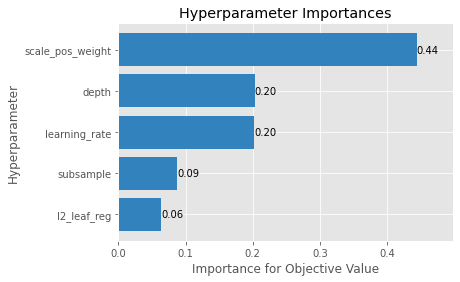

In [36]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study)

In [41]:
feat_importance = model.get_feature_importance(prettified=True)

print("Feature importances:", feat_importance)

Feature importances:            Feature Id  Importances
0       NumOfProducts       23.543
1                 Age       23.409
2             Balance       13.908
3   Geography_Germany        8.284
4     EstimatedSalary        7.584
5      IsActiveMember        7.381
6         CreditScore        7.216
7              Tenure        3.458
8         Gender_Male        1.622
9       Gender_Female        1.181
10    Geography_Spain        1.041
11   Geography_France        0.877
12          HasCrCard        0.496
